# Project Title
**Predicting Sovereign Credit Risk and Default Outcomes**

# Phase 1: Business Understanding

## Background
Sovereign credit risk is influenced by complex interdependencies of economic, fiscal, and institutional factors. Identifying early warning signals of sovereign default or credit rating changes is crucial for investors, policymakers, and analysts. Drawing insights from the S&P Early Warning Signs (EWS) article, this project aims to enhance understanding and prediction of sovereign credit risk.

## Goals/Objectives
1. **Primary Goal**:
   - Develop a data-driven approach to predict sovereign default risk and credit rating changes using macroeconomic, fiscal, and institutional indicators.

2. **Secondary Goals**:
   - Identify key drivers and early warning signals of credit rating changes, including sovereign defaults.
   - Explore patterns in sovereign financial and non-financial health, such as fiscal deficits, external liabilities, GDP dynamics, etc.
   - Implement a dual approach to classify countries into risk categories and predict specific risk scores or metrics.
   - Incorporate time-series modeling to capture trends and temporal patterns in sovereign risk metrics.
   - Provide actionable insights into macroeconomic factors that exacerbate default risks.

## Key Questions
1. What macroeconomic, fiscal, and institutional factors are most indicative of sovereign default or credit rating changes?
2. How do these factors evolve in the years leading up to a default?
3. Can countries be accurately classified into risk clusters or categories based on their profiles?
4. How can time-series trends (e.g., lagged indicators, rolling averages) enhance prediction and classification models?
5. What are the limitations of current predictors, and how can this analysis improve upon existing methods?

## Constraints

1. **Limited Dataset Size**:
   - The dataset consists of only 508 records, which may introduce challenges in building highly generalizable machine learning models. Limited data can affect:
     - Model performance and accuracy.
     - The ability to capture complex interactions between variables.
     - Robustness when splitting data into training, validation, and testing subsets.
   - **Potential Mitigation**: Use cross-validation, simpler models, or explore external datasets to expand the sample size.

2. **Sudden Shocks**:
   - The dataset provides robust economic, fiscal, and institutional metrics but does not fully capture sudden political or geopolitical shocks, which often play a critical role in sovereign credit events.

3. **Qualitative Policy Factors**:
   - While institutional and governance indicators proxy for policy credibility, the dataset lacks direct qualitative inputs, such as policy decisions or geopolitical motivations behind defaults.

4. **Cross-Time Comparability**:
   - Some metrics reflect slow-moving trends (e.g., governance, demographic factors) rather than immediate risk factors. Care must be taken to interpret these metrics in the context of sovereign credit dynamics over time.

### Additional Considerations
The limited size of the dataset emphasizes the importance of:
- Careful feature selection to focus on the most relevant predictors.
- Incorporating time-series features (e.g., lagged variables, rolling averages) to capture trends over time.
- Exploring external datasets, if feasible, to complement the analysis and enhance generalizability.

## Time-Series Integration
To enhance the analysis, time-series modeling will be incorporated:
1. **Prediction**:
   - Forecast metrics such as `Net External Liability (NEL_Score)`, 'debt-to-GDP', or 'inflation trends' using time-series models like ARIMA or VAR.
2. **Classification**:
   - Identify temporal patterns (e.g., rolling averages, lagged changes) in sovereign risk indicators that predict default likelihood or risk categories.
3. **Hybrid Approach**:
   - Use time-series models to extract trends or residuals for incorporation into machine learning classifiers (e.g., Random Forest, XGBoost).
4. **Feature Engineering**:
   - Engineer temporal features such as lagged variables, rolling averages, and volatility metrics to capture temporal dynamics without full-fledged time-series modeling.

## Expected Deliverables
1. A predictive model for sovereign default risk and credit rating changes.
2. A classification model for risk categories based on macroeconomic and fiscal indicators.
3. Visualizations and insights on key risk indicators, trends, and temporal dynamics.
4. Recommendations for policymakers and analysts to mitigate sovereign credit risks.

## Refinement from S&P EWS
The S&P EWS report highlights:
- **High-Risk Indicators**: Rising interest costs, exchange rate depreciation, and escalating external liabilities.
- **Broader Trends**: Weakening public finances and balance-of-payments pressures preceding defaults.
- **Institutional Factors**: Policy credibility, fiscal discipline, and central bank independence as key determinants of risk.

These insights will guide feature selection and modeling to ensure alignment with real-world sovereign credit challenges.


#2. Data Understanding

## Loading our dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/full_dataset.csv')
data.head()

Country  Year  current_account_balance_gdp  current_account_balance_usd  \
0  Angola  2010                        8.957                        7.506   
1  Angola  2011                       11.705                       13.085   
2  Angola  2015                       -8.841                      -10.273   
3  Angola  2016                       -3.051                       -3.085   
4  Angola  2017                       -0.519                       -0.633   

   gov_gross_debt_gdp  gov_net_lending_borrowing_gdp  \
0              37.163                          3.395   
1              29.558                          8.081   
2              57.093                         -2.917   
3              75.663                         -4.520   
4              69.323                         -6.586   

   gov_primary_net_lending_borrowing_gdp  gov_revenue_gdp  \
0                                  4.557           42.789   
1                                  8.983           45.483   
2                                 -1.136           24.134   
3                                 -1.678           17.523   
4                                 -2.963           17.516   

   gov_total_expenditure_gdp  gdp_ppp_share_world  ...  NEL_Risk_Cluster  \
0                     39.394                0.170  ...               8.0   
1                     37.402                0.170  ...               8.0   
2                     27.051                0.182  ...               4.0   
3                     22.043                0.176  ...               4.0   
4                     24.103                0.178  ...               4.0   

   NEL_Risk_Level  Mapped Sovereign  Sovereign  Foreign LT  Local LT  \
0             Low            Angola     Angola          B+        B+   
1             Low            Angola     Angola         BB-       BB-   
2             Low            Angola     Angola          B+        B+   
3             Low            Angola     Angola           B         B   
4             Low            Angola     Angola          B-        B-   

   Foreign Outlook  Local Outlook  Foreign ST  Local ST  
0           Stable         Stable           B         B  
1           Stable         Stable           B         B  
2         Negative       Negative           B         B  
3         Negative       Negative           B         B  
4           Stable         Stable           B         B  

[5 rows x 69 columns]

Next we summarize our dataset's contents. We have '508 records', '69 columns' and several different datatypes

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 69 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Country                                                                           508 non-null    object 
 1   Year                                                                              508 non-null    int64  
 2   current_account_balance_gdp                                                       508 non-null    float64
 3   current_account_balance_usd                                                       508 non-null    float64
 4   gov_gross_debt_gdp                                                                508 non-null    float64
 5   gov_net_lending_borrowing_gdp                                                     508 non-null    float64
 6   go

In [4]:
print(f'Our data has {data.duplicated().sum()} duplicates')

Our data has 0 duplicates


In [5]:
columns_to_drop = ['current_account_balance_usd','Current_Account_Deficit_Flag','NEL_Score', 'NEL_Risk_Level',
                   'NEL_Risk_Cluster','Mapped Sovereign','Sovereign','Low_Savings_Flag','Fiscal_Deficit_Flag']

data = data.drop(columns=columns_to_drop)

In [6]:
print(f'Our data now has {data.shape[0]} rows and {data.shape[1]} columns')

Our data now has 508 rows and 60 columns


## Column Descriptions and Data Types

## Dataset Overview
The dataset contains information relevant to sovereign credit risk, covering economic, demographic, governance, and environmental indicators. Below is a description of each column, grouped by subcategory, including its data type and interpretation.

### General Information
- **`Country`** *(object)*: Name of the country.
- **`Year`** *(int64)*: Year of observation.
- **Credit Ratings**:
  - **`Foreign LT`**, **`Local LT`** *(object)*: Long-term foreign and local credit ratings.
  - **`Foreign ST`**, **`Local ST`** *(object)*: Short-term foreign and local credit ratings.
  - **`Foreign Outlook`**, **`Local Outlook`** *(object)*: Credit rating outlooks (positive, negative, stable).

### Economic Indicators
- **`current_account_balance_gdp`** *(float64)*: Current account balance as a percentage of GDP.
- **`gov_gross_debt_gdp`** *(float64)*: Government gross debt as a percentage of GDP.
- **`gov_net_lending_borrowing_gdp`** *(float64)*: Net lending or borrowing by the government as a percentage of GDP.
- **`gov_primary_net_lending_borrowing_gdp`** *(float64)*: Primary net lending/borrowing by the government as a percentage of GDP.
- **`gov_revenue_gdp`** *(float64)*: Government revenue as a percentage of GDP.
- **`gov_total_expenditure_gdp`** *(float64)*: Government total expenditure as a percentage of GDP.
- **`gdp_ppp_share_world`** *(float64)*: Country’s GDP (PPP) share in the world economy.
- **`gdp_constant_prices_pct_change`** *(float64)*: Percentage change in GDP at constant prices.
- **`gdp_deflator`** *(float64)*: Implicit price deflator for GDP.
- **`gross_national_savings_gdp`** *(float64)*: Gross national savings as a percentage of GDP.
- **`inflation_avg_cpi`**, **`inflation_end_cpi`** *(float64)*: Average and end-of-period consumer price index (CPI) inflation.
- **`inflation_avg_cpi_pct_change`**, **`inflation_end_cpi_pct_change`** *(float64)*: Percentage change in CPI inflation.
- **`population_millions`** *(float64)*: Population size in millions.
- **`total_investment_gdp`** *(float64)*: Total investment as a percentage of GDP.
- **`gdp_per_capita_usd`** *(float64)*: GDP per capita in USD.

### Aggregated Subcategory Scores
These represent standardized mean scores for grouped indicators:
- **`Energy and Emissions`**: Metrics related to energy access, emissions, and carbon intensity.
- **`Natural Resources and Land Use`**: Indicators of land use, natural resource rents, and precipitation.
- **`Water and Agriculture`**: Agricultural value-added as a percentage of GDP.
- **`Health and Demographics`**: Birth rate, death rate, life expectancy, and survival rates.
- **`Employment and Labor`**: Labor force participation, employment in agriculture, and unemployment rates.
- **`Education and Connectivity`**: Access to mobile, telephone subscriptions, and urban population percentages.
- **`Government and Institutions`**: Governance percentile ranks (e.g., control of corruption, rule of law).
- **`Economic Governance`**: Credit to the private sector, FDI inflows, and merchandise trade as percentages of GDP.

### Columns Dropped
- **Flags Removed**:
  - **`Fiscal_Deficit_Flag`**, **`Low_Savings_Flag`**, **`Current_Account_Deficit_Flag`**: Simplified or redundant with other indicators.
- **Redundant Columns**:
  - **`current_account_balance_usd`**: Current account balance in USD, redundant with GDP percentage.
  - **`NEL_Score`**, **`NEL_Risk_Cluster`**, **'NEL_Risk_Level'**: Removed to avoid prescriptive bias in modeling.
  - **`Mapped Sovereign`**, **`Sovereign`**: Redundant columns mapping credit ratings.

### Notes
- Negative indicators (e.g., emissions, unemployment) were inverted for consistency.
- Standardization was applied to numeric columns before computing subcategory scores.


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding the structure, distribution, and key characteristics of the dataset. It helps identify patterns, relationships, and potential anomalies in the data. EDA also lays the foundation for subsequent steps, including feature engineering, modeling, and insights generation.

We will focus on leveraging **aggregation by economic groups, regions, and credit ratings** to make the data more interpretable and actionable. We will use various visualizations and statistical summaries to gain insights into sovereign credit risks and explore potential early warning signs of sovereign defaults.

## Objectives
1. **Understand the Data**:
   - Summarize the distributions of key indicators.
   - Identify trends, patterns, and relationships in the dataset.

2. **Leverage Aggregations**:
   - Analyze data by `economic_group`, `region`, and `credit ratings` to explore macro-level patterns.
   - Compare key indicators across these categories.

3. **Incorporate Contextual Insights**:
   - Utilize insights from the **Early Warning Signs of Sovereign Defaults (EWS)** report to highlight risk indicators (e.g., debt-to-GDP ratios, inflation, current account balances).

4. **Visualize Key Patterns**:
   - Use plots (e.g., histograms, boxplots, and time-series visualizations) to reveal hidden trends and relationships.

5. **Prepare for Modeling**:
   - Identify variables with significant importance for predicting sovereign credit risks.
   - Highlight areas requiring further feature engineering or transformation.

---

## Data Distribution by Economic Group and Region

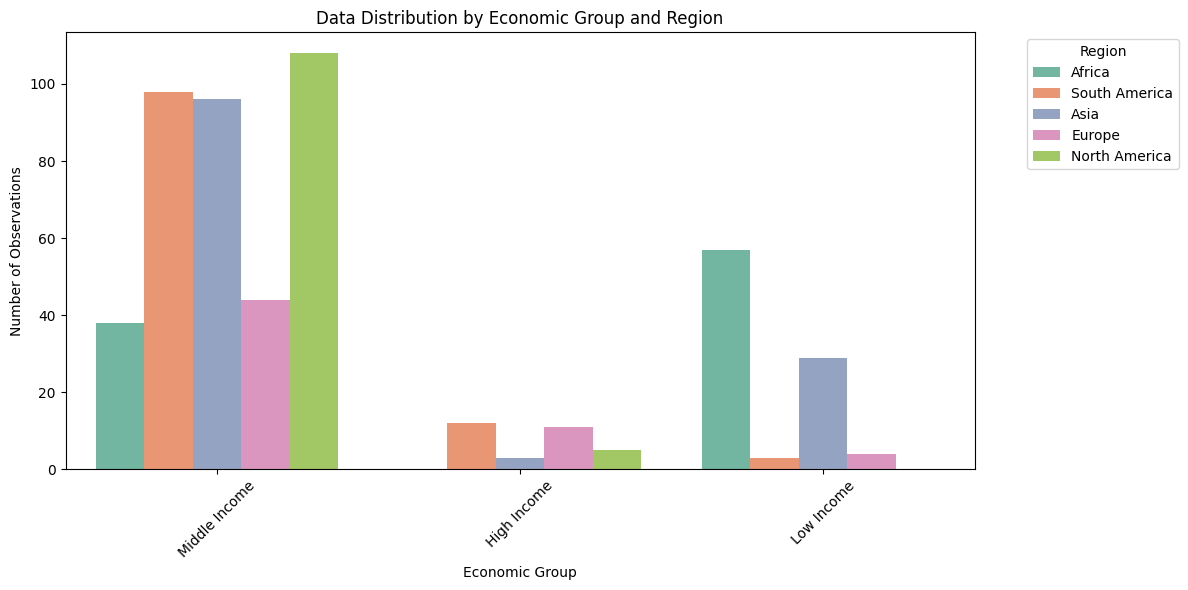

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot: Distribution by Economic Group and Region
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,
    x='economic_group',
    hue='region',
    palette="Set2"
)
plt.title("Data Distribution by Economic Group and Region")
plt.ylabel("Number of Observations")
plt.xlabel("Economic Group")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Key Insights:
1. **Economic Group Distribution**:
   - The dataset has a relatively balanced representation across `economic_group` categories: High Income, Middle Income, and Low Income.
   - Middle-income countries appear to dominate the dataset, reflecting their global prevalence.

2. **Regional Representation**:
   - Africa and Asia are heavily represented in the low-income and middle-income categories, consistent with their large populations of developing nations.
   - Europe is well-represented in the high-income category, as expected, due to its concentration of developed economies.
   - North America shows a strong presence in the middle and high income groups.
   - South America exhibits diversity, with representation across all three economic groups.

#### Observations:
- The dataset appears well-distributed across `economic_group` and `region`, supporting meaningful analysis across these dimensions.
- However, the dominance of middle-income groups may require stratification or normalization in some analyses to avoid bias.

#### Next Steps:
- Our understanding of data distribution will guide further analysis, ensuring balanced comparisons.
- We will proceed with analyzing key indicators (e.g., debt metrics, growth) grouped by economic group and region.


<ipython-input-8-7a7363fee00d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


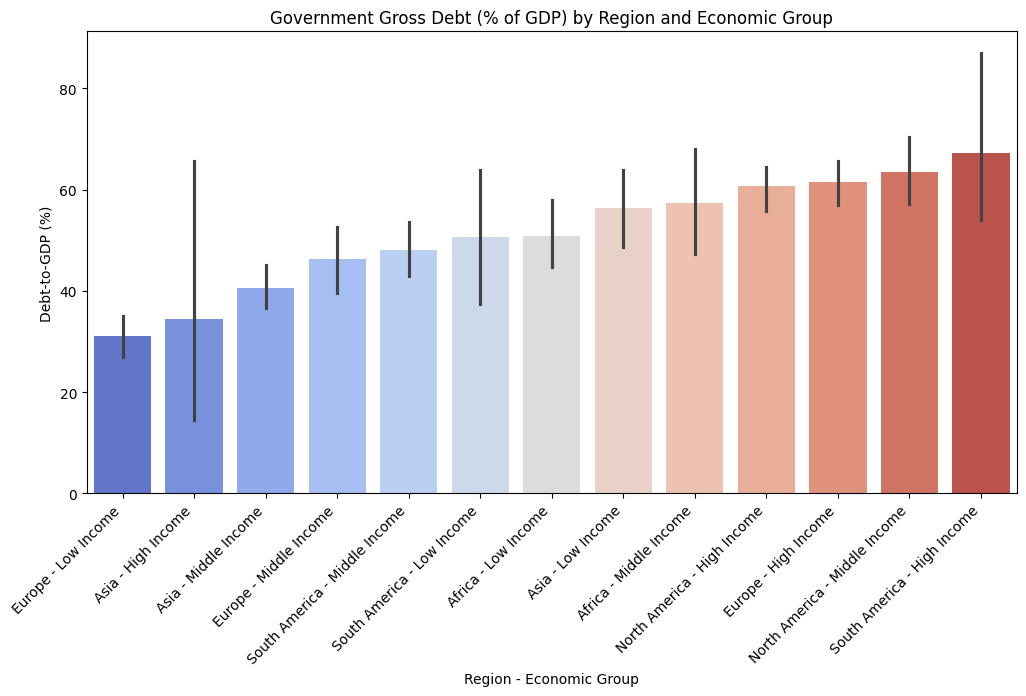

In [8]:
# Combine region and economic group into a single column for visualization
data['region_group'] = data['region'] + " - " + data['economic_group']

# Plot: Government Gross Debt (% of GDP) by Region and Economic Group
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data,
    x='region_group',
    y='gov_gross_debt_gdp',
    palette="coolwarm",
    order=data.groupby('region_group')['gov_gross_debt_gdp'].mean().sort_values().index
)
plt.title("Government Gross Debt (% of GDP) by Region and Economic Group")
plt.ylabel("Debt-to-GDP (%)")
plt.xlabel("Region - Economic Group")
plt.xticks(rotation=45, ha="right")
plt.show()


### Government Gross Debt (% of GDP) by Region and Economic Group

#### Key Insights:
1. **High-Income Economies**:
   - High-income groups in North America and Europe exhibit the highest debt-to-GDP ratios, exceeding 60%.
   - Europe’s strong presence in the high-income group aligns with its advanced economies that have substantial borrowing capacity.
   - North America’s high-income representation reflects smaller developed economies with relatively higher fiscal space.

2. **Low-Income Economies**:
   - Africa and Asia dominate the low-income group, with debt-to-GDP ratios averaging ~40-50%.
   - These levels reflect limited fiscal capacities and access to affordable borrowing, consistent with EWS observations that lower-income countries are constrained in their ability to sustain high debt levels during economic shocks.

3. **Middle-Income Economies**:
   - South America’s middle-income economies show relatively higher debt-to-GDP ratios (~50-60%), indicating vulnerability to external shocks such as currency depreciation or rising global interest rates.
   - Middle-income regions in Asia and Africa exhibit more moderate debt levels (~40-50%), suggesting a degree of fiscal prudence or borrowing limitations.

4. **Regional Comparisons**:
   - Africa’s broad representation across low- and middle-income groups aligns with its moderate debt-to-GDP levels, highlighting heterogeneity in fiscal capacity across the continent.
   - Europe’s dominance in the high-income group contributes to its relatively higher debt ratios, reflecting developed financial markets and access to cheaper capital.

#### Context from S&P EWS:
- The **Early Warning Signs (EWS)** article highlights the importance of debt metrics as precursors to sovereign defaults.
- **Key Risks Identified**:
  - High debt-to-GDP ratios combined with weak governance and fiscal management increase the likelihood of stress events.
  - Countries in the middle-income trap (e.g., parts of South America) face elevated risks when debt surpasses sustainable levels.

#### Observations:
- The analysis confirms that high-income regions can sustain higher debt levels, while low- and middle-income regions are more constrained, consistent with the EWS findings.
- Regional and economic group comparisons highlight areas where fiscal vulnerabilities may align with governance or economic growth challenges.

#### Next Steps:
- Further analysis of **fiscal balance** (`gov_net_lending_borrowing_gdp`) and **growth** (`gdp_constant_prices_pct_change`) can provide deeper insights into debt sustainability.
- Correlate governance indicators with debt metrics to identify potential early warning signs for specific regions or groups.


<ipython-input-9-afb218cbc25a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


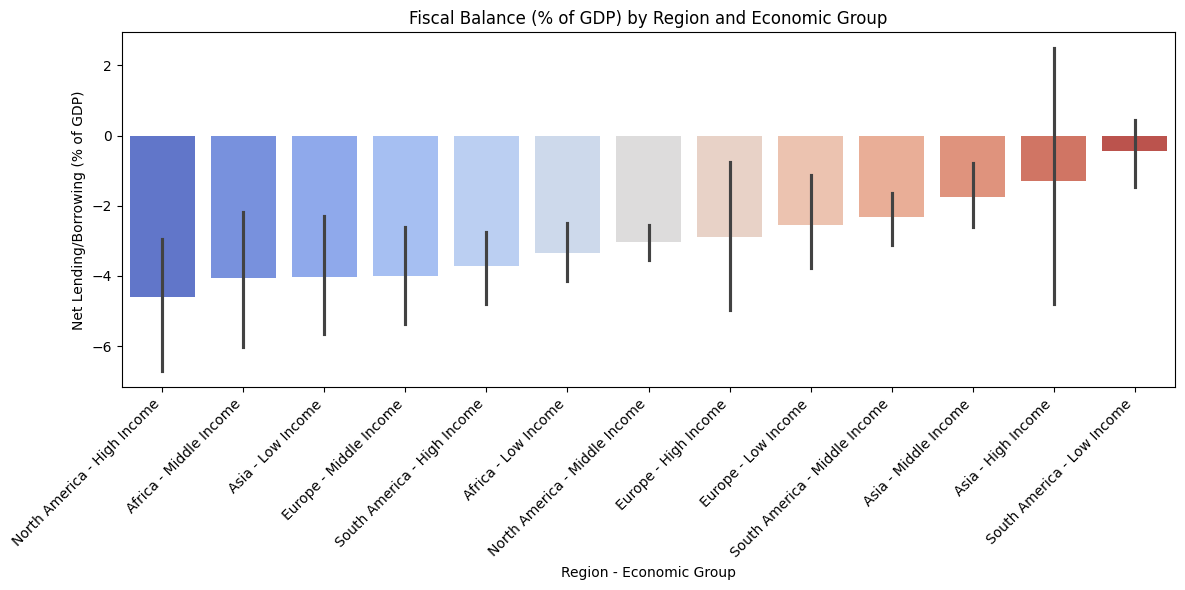

<ipython-input-9-afb218cbc25a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


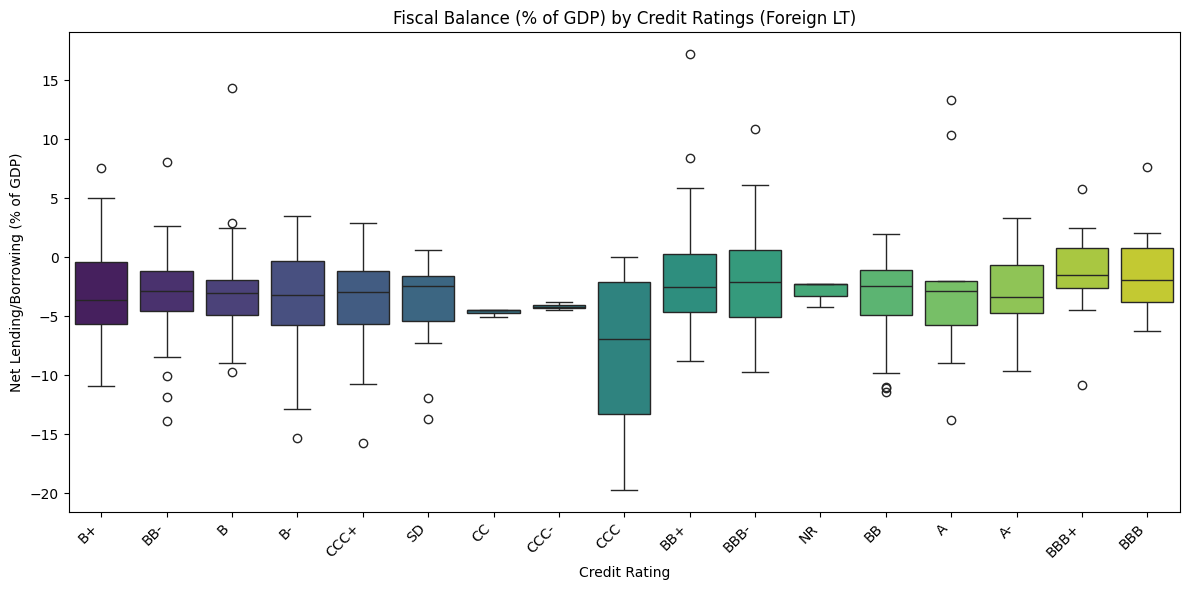

In [9]:
# Plot: Fiscal Balance by Region and Economic Group
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data,
    x='region_group',
    y='gov_net_lending_borrowing_gdp',
    palette="coolwarm",
    order=data.groupby('region_group')['gov_net_lending_borrowing_gdp'].mean().sort_values().index
)
plt.title("Fiscal Balance (% of GDP) by Region and Economic Group")
plt.ylabel("Net Lending/Borrowing (% of GDP)")
plt.xlabel("Region - Economic Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Boxplot: Fiscal Balance by Credit Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='Foreign LT',
    y='gov_net_lending_borrowing_gdp',
    palette="viridis"
)
plt.title("Fiscal Balance (% of GDP) by Credit Ratings (Foreign LT)")
plt.ylabel("Net Lending/Borrowing (% of GDP)")
plt.xlabel("Credit Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Fiscal Balance (% of GDP) by Region, Economic Group, and Credit Ratings

#### Key Insights: Region and Economic Group
1. **Deficit Trends Across Groups**:
   - All region-economic group combinations show consistent fiscal deficits, with `gov_net_lending_borrowing_gdp` ranging between -2% and -6% of GDP.
   - North America (High Income) and Europe (Middle Income) exhibit the largest deficits, reflecting their reliance on fiscal stimulus and social spending programs.
   - Africa (Middle and Low Income) and Asia (Low Income) display smaller deficits, likely constrained by fiscal limitations and access to credit markets.

2. **Surpluses in Specific Groups**:
   - Asia (High Income) and South America (Low Income) demonstrate near-zero or positive fiscal balances, suggesting stronger fiscal discipline or temporary fiscal surpluses.

3. **Variability Across Groups**:
   - The variability within Africa and Asia (Low Income) is notable, with wider ranges indicating diverse fiscal situations among countries in these groups.

#### Key Insights: Credit Ratings
1. **Correlation Between Fiscal Balance and Credit Ratings**:
   - Higher-rated sovereigns (e.g., A, A-) maintain smaller deficits, often less than -2% of GDP, reflecting better fiscal discipline and access to lower-cost borrowing.
   - Lower-rated sovereigns (e.g., CCC, CC, SD) show significantly larger deficits, with medians near or below -5% of GDP, aligning with increased risk of default as identified in the EWS article.

2. **Extreme Outliers in Lower Ratings**:
   - CCC and CC ratings show large negative outliers, with some deficits exceeding -15% of GDP, highlighting fiscal distress and limited borrowing capacity.
   - Sovereigns in these categories are most at risk of default during economic shocks, as highlighted by the EWS report.

3. **Stability at Middle Ratings**:
   - Sovereigns in the BB+ to BBB- range exhibit moderate deficits (~-2% to -4%), balancing fiscal pressures with adequate credit market access.

#### Context from the EWS Article:
- The **Early Warning Signs (EWS)** article underscores the importance of fiscal deficits as a leading indicator of sovereign risk:
  - Persistent deficits weaken a country's fiscal buffers, making it vulnerable to shocks such as rising global interest rates or commodity price fluctuations.
  - Large deficits in lower-rated countries exacerbate debt sustainability risks, increasing the likelihood of default.
- The observed trends align with EWS findings, where fiscal balance deterioration is often coupled with poor governance and limited policy responses.

#### Observations and Next Steps:
1. **Observations**:
   - The relationship between fiscal balance and credit ratings reinforces the need for sound fiscal management to maintain creditworthiness.
   - Regional variations, especially in low- and middle-income groups, point to structural differences in fiscal capacity and governance.

2. **Next Steps**:
   - Analyze **economic growth** (`gdp_constant_prices_pct_change`) across groups to understand how growth interacts with fiscal balance and debt.
   - Investigate governance indicators (`Government and Institutions`, `Economic Governance`) to explore their correlation with fiscal balance and credit ratings.


<ipython-input-10-ca17f8ed9298>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


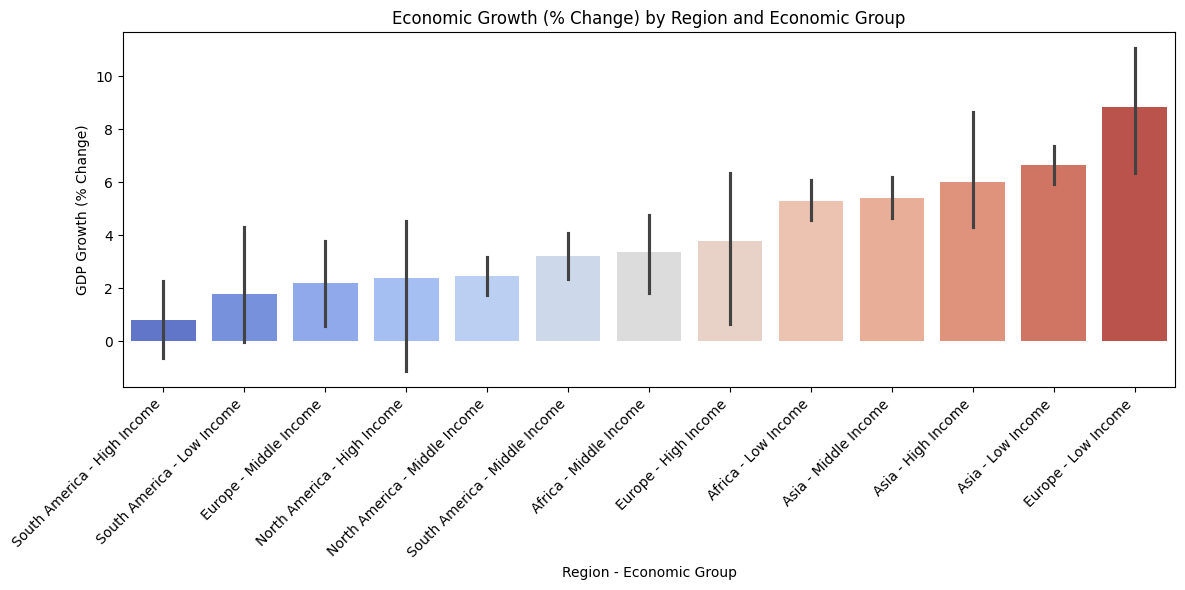

<ipython-input-10-ca17f8ed9298>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


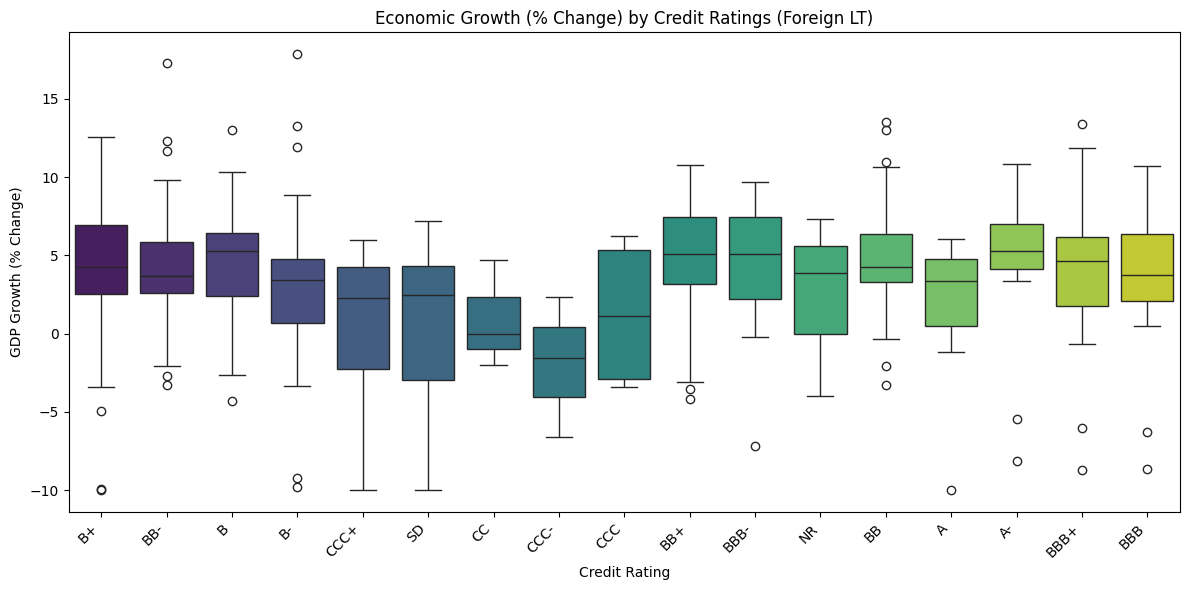

In [10]:
# Bar Plot: Economic Growth by Region and Economic Group
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data,
    x='region_group',
    y='gdp_constant_prices_pct_change',
    palette="coolwarm",
    order=data.groupby('region_group')['gdp_constant_prices_pct_change'].mean().sort_values().index
)
plt.title("Economic Growth (% Change) by Region and Economic Group")
plt.ylabel("GDP Growth (% Change)")
plt.xlabel("Region - Economic Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Box Plot: Economic Growth by Credit Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='Foreign LT',
    y='gdp_constant_prices_pct_change',
    palette="viridis"
)
plt.title("Economic Growth (% Change) by Credit Ratings (Foreign LT)")
plt.ylabel("GDP Growth (% Change)")
plt.xlabel("Credit Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Economic Growth (% Change) by Region, Economic Group, and Credit Ratings

#### Key Insights: Region and Economic Group
1. **High Growth Regions**:
   - **Asia (High Income)** and **Europe (Low Income)** demonstrate the highest GDP growth rates, averaging above 6% annually.
   - Asia's strong growth aligns with the region's emerging market economies and rapid industrialization.

2. **Low Growth Regions**:
   - **South America (High Income)** and **South America (Low Income)** show the weakest growth, with rates hovering near or below 2%.
   - Persistent low growth in South America highlights structural challenges, including high debt burdens and political instability.

3. **Economic Group Trends**:
   - Low-income regions (e.g., Africa and Asia) exhibit higher growth rates on average compared to middle- and high-income groups.
   - High-income regions (e.g., North America and Europe) show more moderate growth, reflecting mature economies with limited room for rapid expansion.

4. **Regional Variability**:
   - Africa and Asia demonstrate significant within-group variability, indicating diverse growth trajectories among countries in these regions.

#### Key Insights: Credit Ratings
1. **Positive Correlation with Ratings**:
   - Higher-rated countries (e.g., A, BBB+) exhibit relatively stable and moderate growth (~3-6%), suggesting a balance between economic expansion and fiscal discipline.
   - Lower-rated countries (e.g., CCC, CC) show wider variability, with some economies experiencing strong growth but others stagnating or contracting.

2. **Outliers in Lower Ratings**:
   - Countries with lower credit ratings (CCC, CC, SD) show the largest variability in growth, with some experiencing contractions exceeding -5% annually.
   - These patterns align with the **S&P EWS article**, which highlights low growth as a compounding factor for sovereign risk in lower-rated countries.

3. **Stability in Middle Ratings**:
   - Sovereigns in the BB to BBB- range exhibit consistent growth (~3-5%), indicating a degree of economic stability despite fiscal challenges.

#### Context from the EWS Article:
- The **Early Warning Signs (EWS)** article identifies economic growth as a critical buffer against sovereign defaults:
  - Sustained low growth erodes a country's ability to service debt, particularly in high-debt economies.
  - Growth shocks in lower-rated countries exacerbate vulnerabilities, increasing the likelihood of fiscal and economic crises.

#### Observations and Next Steps:
1. **Observations**:
   - Economic growth strongly correlates with creditworthiness, with higher-rated countries enjoying more stable growth patterns.
   - Low-income regions and countries with lower credit ratings are more vulnerable to growth volatility, increasing sovereign risk.

2. **Next Steps**:
   - Investigate **governance indicators** (`Government and Institutions`, `Economic Governance`) to explore their influence on growth and fiscal stability.
   - Analyze **inflation** (`inflation_avg_cpi_pct_change`) to assess its impact on economic growth and credit ratings.


<ipython-input-11-2c609137fa31>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


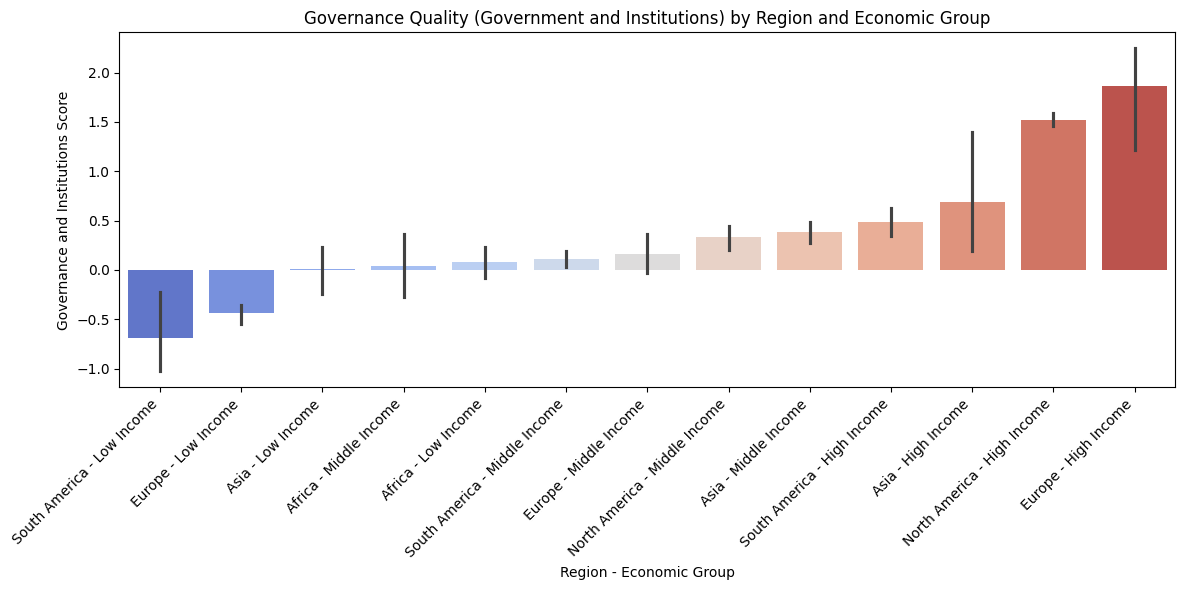

<ipython-input-11-2c609137fa31>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


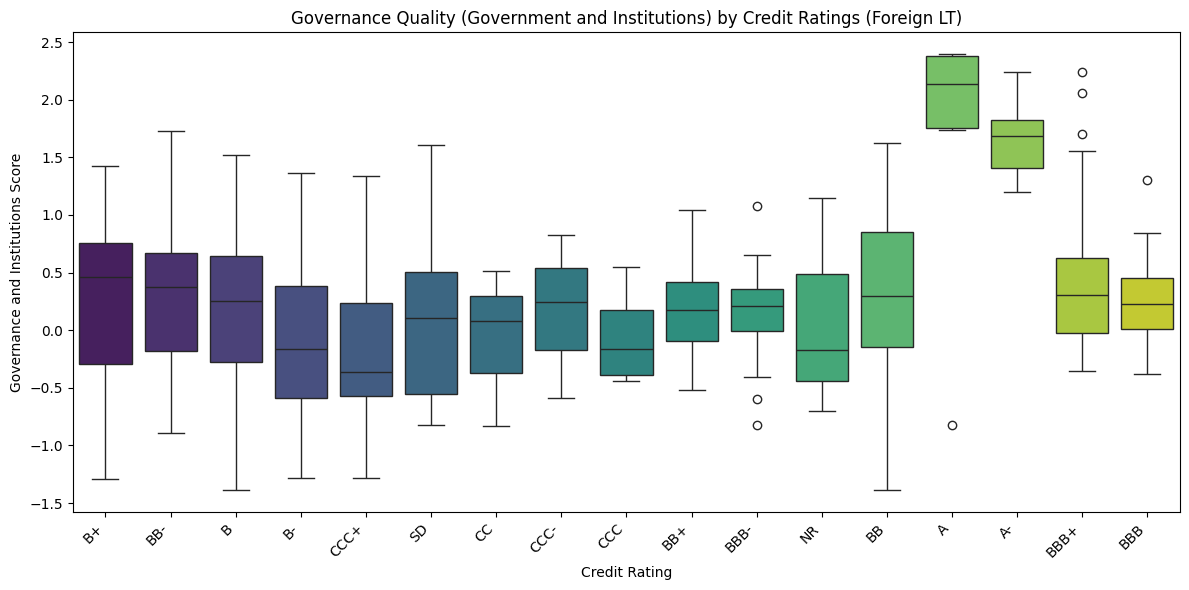

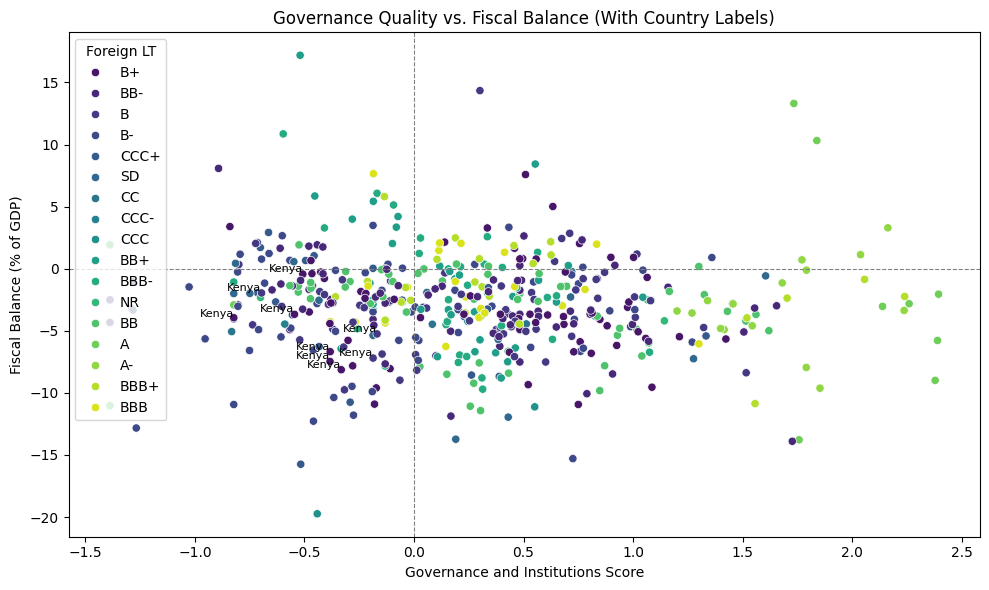

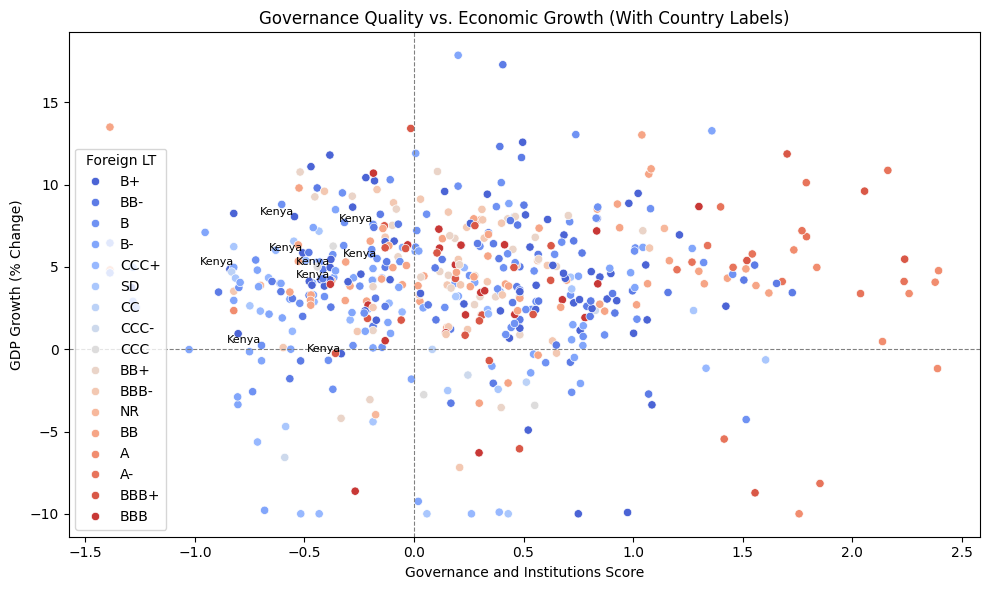

In [11]:
# Bar Plot: Governance and Institutions by Region and Economic Group
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data,
    x='region_group',
    y='Government and Institutions',
    palette="coolwarm",
    order=data.groupby('region_group')['Government and Institutions'].mean().sort_values().index
)
plt.title("Governance Quality (Government and Institutions) by Region and Economic Group")
plt.ylabel("Governance and Institutions Score")
plt.xlabel("Region - Economic Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Box Plot: Governance and Institutions by Credit Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='Foreign LT',
    y='Government and Institutions',
    palette="viridis"
)
plt.title("Governance Quality (Government and Institutions) by Credit Ratings (Foreign LT)")
plt.ylabel("Governance and Institutions Score")
plt.xlabel("Credit Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



# Selected countries for labeling
selected_countries = ['Kenya']

# Filter data for selected countries
label_data = data[data['Country'].isin(selected_countries)]

# Scatter Plot: Governance vs. Fiscal Balance with Labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='Government and Institutions',
    y='gov_net_lending_borrowing_gdp',
    hue='Foreign LT',
    palette="viridis",
    legend='full'
)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)

# Annotate selected countries
for i in range(label_data.shape[0]):
    plt.text(
        label_data['Government and Institutions'].iloc[i],
        label_data['gov_net_lending_borrowing_gdp'].iloc[i],
        label_data['Country'].iloc[i],
        fontsize=8,
        ha='right',
        va='bottom'
    )

plt.title("Governance Quality vs. Fiscal Balance (With Country Labels)")
plt.ylabel("Fiscal Balance (% of GDP)")
plt.xlabel("Governance and Institutions Score")
plt.tight_layout()
plt.show()

# Scatter Plot: Governance vs. Economic Growth with Labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='Government and Institutions',
    y='gdp_constant_prices_pct_change',
    hue='Foreign LT',
    palette="coolwarm",
    legend='full'
)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)

# Annotate selected countries
for i in range(label_data.shape[0]):
    plt.text(
        label_data['Government and Institutions'].iloc[i],
        label_data['gdp_constant_prices_pct_change'].iloc[i],
        label_data['Country'].iloc[i],
        fontsize=8,
        ha='right',
        va='bottom'
    )

plt.title("Governance Quality vs. Economic Growth (With Country Labels)")
plt.ylabel("GDP Growth (% Change)")
plt.xlabel("Governance and Institutions Score")
plt.tight_layout()
plt.show()


### Governance Quality and Its Impact on Economic Growth and Fiscal Balance

#### Methodology: Creation of Governance and Institutions Score
- The **Governance and Institutions** score is an aggregated metric derived from governance-related indicators obtained from the World Bank Development Indicators (https://databank.worldbank.org/source/world-development-indicators) including:
  - **Control of Corruption**: Evaluates perceptions of corruption in the public sector.
  - **Government Effectiveness**: Measures the quality of public services and policy implementation.
  - **Rule of Law**: Assesses the extent to which laws are fairly enforced and property rights are respected.
  - **Political Stability and Absence of Violence**: Captures the likelihood of politically motivated violence or instability.
- Each component was standardized to ensure comparability across countries and then averaged to compute the overall score.

#### Key Insights: Region and Economic Group
1. **Strong Governance in High-Income Economies**:
   - High-income regions, particularly Europe and North America, consistently achieve higher governance scores (>1.0), reflecting advanced institutional frameworks and effective governance.
   - Asia (High Income) also demonstrates robust governance, aligning with its stable economic systems and policies.

2. **Weak Governance in Low-Income Economies**:
   - Low-income regions (e.g., South America, Africa, Asia) exhibit negative governance scores, highlighting systemic governance challenges such as corruption and weak institutional capacity.
   - South America (Low Income) has the lowest governance scores, correlating with its fiscal and economic struggles.

3. **Moderate Governance in Middle-Income Economies**:
   - Middle-income economies across regions show mixed governance quality, reflecting transitional governance structures that may still face significant challenges.

#### Key Insights: Credit Ratings
1. **Governance Scores Correlate with Credit Ratings**:
   - Higher credit ratings (A, BBB+) are associated with strong governance scores (>1.0), reinforcing the importance of effective governance in maintaining sovereign creditworthiness.
   - Lower credit ratings (CCC, CC, SD) correspond to weaker governance scores (<0), aligning with higher sovereign risk and economic volatility.

2. **Outliers in Lower Ratings**:
   - Some low-rated sovereigns exhibit relatively high governance scores (e.g., NR and BB-), suggesting that governance alone does not fully determine creditworthiness and must be evaluated alongside economic and fiscal factors.

#### **Scatter Plot: Governance vs. Economic Growth**
1. **Positive Quadrant (Top-Right)**:
   - Countries with strong governance scores (>0) and high GDP growth (>0) predominantly belong to higher credit ratings such as A, BBB, and BB+.
   - These economies effectively leverage governance for sustainable economic expansion.

2. **Negative Governance, Positive Growth (Top-Left)**:
   - A few countries show economic growth despite weak governance (scores <0). These may indicate resource-driven or externally supported growth (e.g., commodity exports).

3. **Positive Governance, Negative Growth (Bottom-Right)**:
   - Limited occurrences, suggesting that governance alone may not prevent economic downturns, especially during external shocks or crises.

4. **Negative Quadrant (Bottom-Left)**:
   - Economies with weak governance and negative growth are more likely to face compounded challenges, as seen in lower-rated sovereigns like CCC and CC.


#### **Scatter Plot: Governance vs. Fiscal Balance**
1. **Positive Quadrant (Top-Right)**:
   - Countries with strong governance (>0) and fiscal surpluses (>0) represent effective fiscal management. These are often observed in high-income and high-credit-rated economies.

2. **Negative Governance, Positive Fiscal Balance (Top-Left)**:
   - A rare quadrant where countries with weak governance still manage fiscal surpluses, possibly due to extraordinary factors like natural resource revenue or fiscal austerity measures.

3. **Positive Governance, Negative Fiscal Balance (Bottom-Right)**:
   - Some countries with good governance still report fiscal deficits, possibly reflecting counter-cyclical spending or investment-focused fiscal strategies.

4. **Negative Quadrant (Bottom-Left)**:
   - Weak governance combined with fiscal deficits correlates with significant sovereign risks, as highlighted in the S&P EWS article. These countries may struggle to access affordable credit and manage crises.


#### **Key Observations**:
1. **Governance and Creditworthiness**:
   - The distribution of credit ratings along governance scores shows that higher governance aligns with better ratings (A, BBB+), supporting the premise that institutional strength is critical for creditworthiness.

2. **Outliers**:
   - Certain countries with moderate governance scores (0 to 1) still face low credit ratings (CCC, B). These cases suggest external economic pressures or unresolved fiscal challenges.


#### Context from the S&P EWS Article:
- The **Early Warning Signs (EWS)** article emphasizes governance as a critical determinant of sovereign risk:
  - Weak governance exacerbates fiscal imbalances and limits a country's ability to respond to economic shocks.
  - Governance quality influences investor confidence and access to international credit markets.

#### Observations and Next Steps:
1. **Observations**:
   - Governance quality is a crucial factor in explaining regional and group disparities in economic and fiscal performance.
   - Higher governance scores are strongly correlated with higher credit ratings and fiscal sustainability.

2. **Next Steps**:
   - Analyze **inflation trends** (`inflation_avg_cpi_pct_change`) to assess its impact on economic stability and sovereign risk.
   - Combine insights from governance, economic growth, and inflation to identify potential early warning signals for sovereign defaults.


<ipython-input-12-55243382c909>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


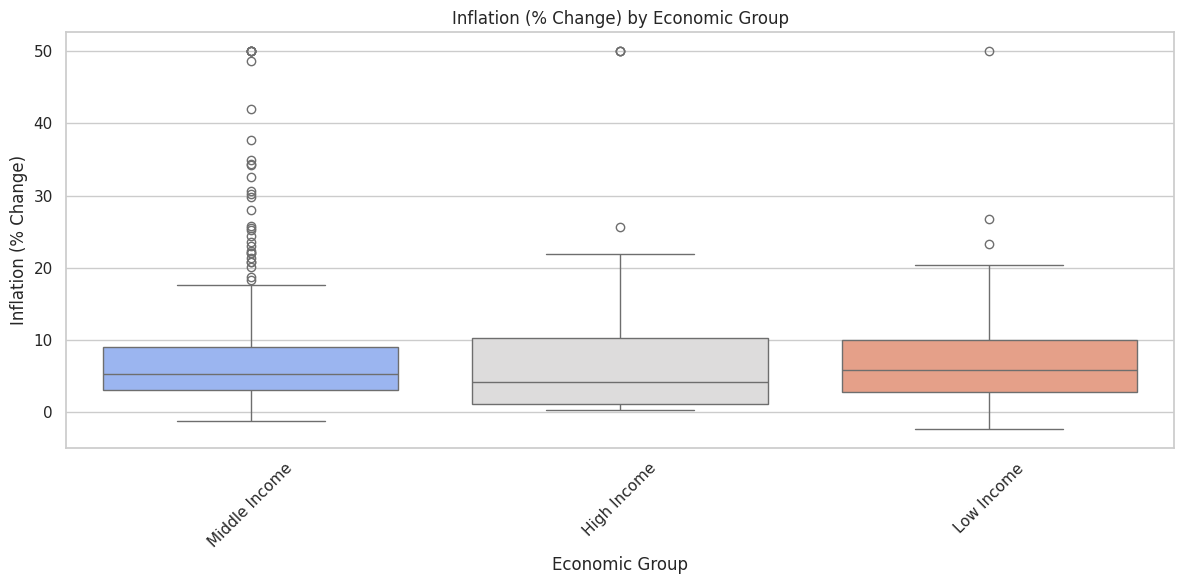

<ipython-input-12-55243382c909>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


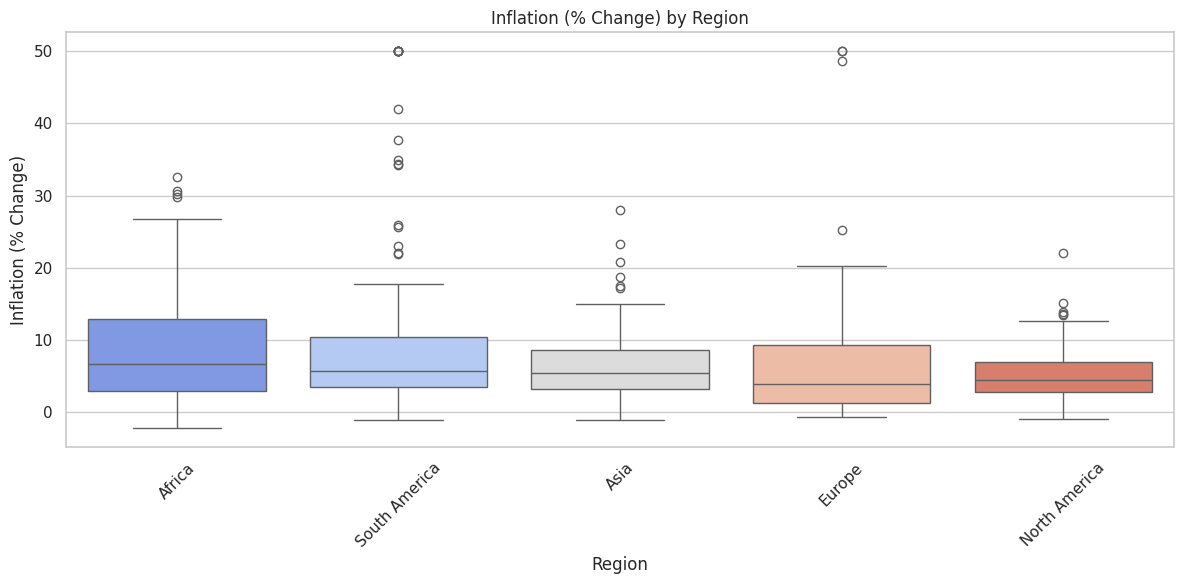

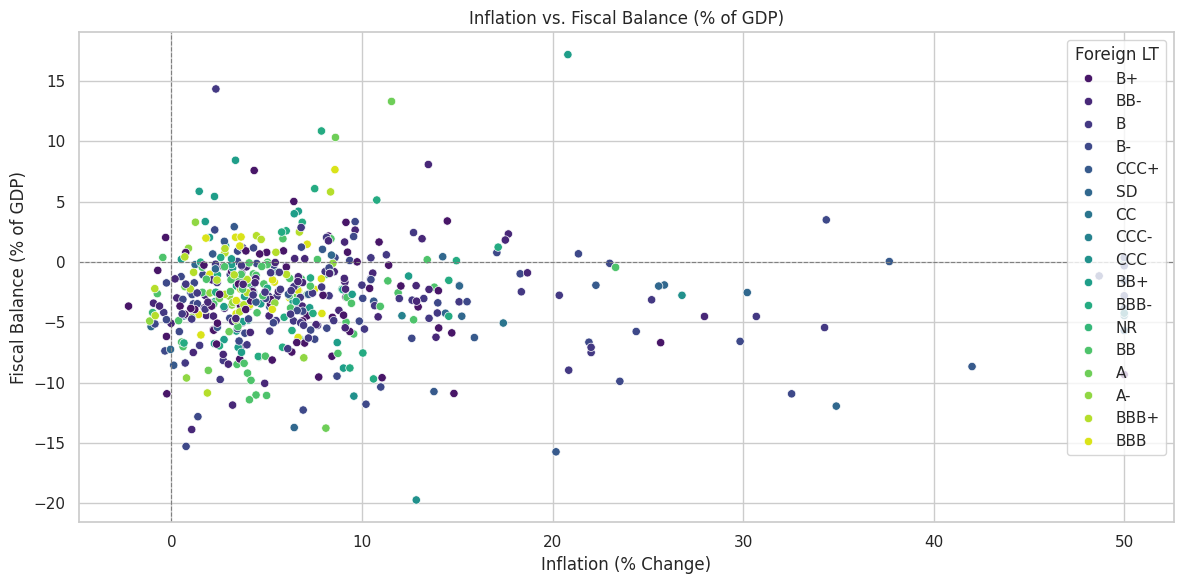

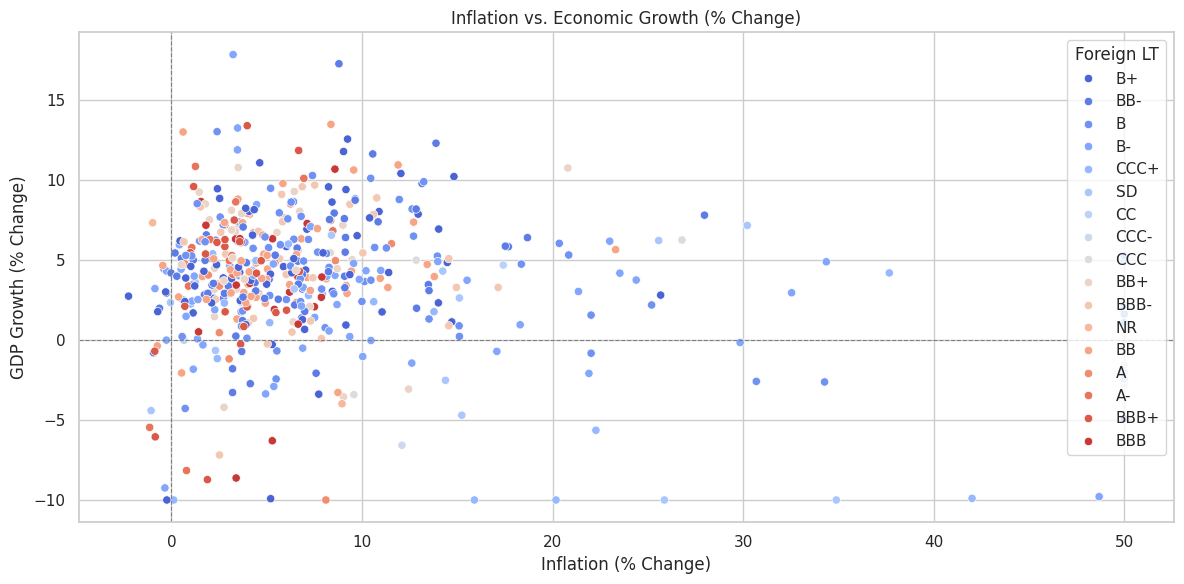

In [12]:
# Set up plot style
sns.set_theme(style="whitegrid")

# Box Plot: Inflation by Economic Group
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='economic_group',
    y='inflation_avg_cpi_pct_change',
    palette='coolwarm'
)
plt.title("Inflation (% Change) by Economic Group")
plt.ylabel("Inflation (% Change)")
plt.xlabel("Economic Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Plot: Inflation by Region
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='region',
    y='inflation_avg_cpi_pct_change',
    palette='coolwarm'
)
plt.title("Inflation (% Change) by Region")
plt.ylabel("Inflation (% Change)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter Plot: Inflation vs. Fiscal Balance
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='inflation_avg_cpi_pct_change',
    y='gov_net_lending_borrowing_gdp',
    hue='Foreign LT',
    palette="viridis",
    legend='full'
)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Inflation vs. Fiscal Balance (% of GDP)")
plt.ylabel("Fiscal Balance (% of GDP)")
plt.xlabel("Inflation (% Change)")
plt.tight_layout()
plt.show()

# Scatter Plot: Inflation vs. Economic Growth
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='inflation_avg_cpi_pct_change',
    y='gdp_constant_prices_pct_change',
    hue='Foreign LT',
    palette="coolwarm",
    legend='full'
)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Inflation vs. Economic Growth (% Change)")
plt.ylabel("GDP Growth (% Change)")
plt.xlabel("Inflation (% Change)")
plt.tight_layout()
plt.show()


### Inflation Trends and Their Impact on Economic Stability and Sovereign Risk

- Inflation is highlighted as a critical early warning signal. Persistent high inflation indicates macroeconomic instability, erodes investor confidence, and increases the likelihood of fiscal stress and sovereign defaults.

#### Key Insights: Inflation by Economic Group
1. **Low Inflation in High-Income Economies**:
   - High-income countries exhibit the lowest inflation rates, reflecting stable monetary policies, diversified economies, and strong institutional frameworks.
   - Median inflation rates are below 5%, with fewer outliers compared to other income groups.

2. **Moderate Inflation in Middle-Income Economies**:
   - Middle-income economies show a wider range of inflation rates, with higher medians and more outliers, reflecting uneven economic performance and vulnerability to external shocks.
   - The presence of extreme outliers (>20%) suggests instances of economic crises or mismanagement.

3. **Higher Inflation in Low-Income Economies**:
   - Low-income economies exhibit the highest inflation rates, reflecting structural weaknesses, supply-side constraints, and external vulnerabilities.
   - These economies often face greater exposure to commodity price fluctuations, currency devaluations, and political instability.

#### Key Insights: Inflation by Region
1. **Africa**:
   - Africa exhibits the highest inflation rates among regions, with several extreme outliers (e.g., >30%). These trends are driven by reliance on imported goods, currency depreciation, and commodity price shocks.

2. **South America**:
   - Inflation in South America is moderately high, with outliers reflecting episodes of hyperinflation or severe economic crises (e.g., Argentina).

3. **Asia and Europe**:
   - Asia and Europe demonstrate more stable inflation patterns, with lower medians and minimal extreme outliers, reflecting stronger monetary controls and institutional stability.

4. **North America**:
   - North America has the most stable inflation rates, consistent with robust monetary and fiscal policy frameworks.

#### Scatter Plot Analysis: Inflation vs. Fiscal Balance
- **Top Right Quadrant (High Inflation, Fiscal Surplus)**:
  - Rare cases where fiscal surpluses coexist with high inflation, potentially due to revenue windfalls or resource exports.
  
- **Bottom Right Quadrant (High Inflation, Fiscal Deficit)**:
  - Countries in this quadrant face the most significant sovereign risks. High inflation erodes purchasing power while fiscal deficits highlight unsustainable fiscal policies.

- **Top Left Quadrant (Low Inflation, Fiscal Surplus)**:
  - Reflects stable macroeconomic environments, commonly observed in advanced economies with strong fiscal and monetary policies.

- **Bottom Left Quadrant (Low Inflation, Fiscal Deficit)**:
  - Indicates fiscal stress despite stable inflation, suggesting structural fiscal challenges or counter-cyclical spending strategies.

#### Scatter Plot Analysis: Inflation vs. Economic Growth
- **Top Right Quadrant (High Inflation, High Growth)**:
  - Typically observed in emerging economies experiencing rapid development but facing risks of overheating.

- **Bottom Right Quadrant (High Inflation, Low Growth)**:
  - Indicates stagflation, where high inflation coincides with stagnant or contracting growth, a severe economic imbalance.

- **Top Left Quadrant (Low Inflation, High Growth)**:
  - Ideal scenario for sustained economic performance, commonly seen in stable, high-income economies.

- **Bottom Left Quadrant (Low Inflation, Low Growth)**:
  - Reflects deflationary pressures or recessionary environments, signaling the need for stimulative policies.

#### Key Insights from Inflation Analysis
1. **Inflation and Sovereign Risk**:
   - Persistent high inflation undermines fiscal sustainability, erodes investor confidence, and elevates sovereign risk.
   - Countries with high inflation are more likely to have lower credit ratings (e.g., B, CCC), as reflected in the scatter plots.

2. **Regional and Income Disparities**:
   - High inflation in low- and middle-income economies highlights structural challenges such as weak monetary controls and vulnerability to external shocks.

3. **Outliers**:
   - Outliers with extreme inflation rates often represent economies undergoing hyperinflation or economic crises, requiring immediate policy intervention.

#### **Context from the S&P EWS Article**:
- Inflation serves as an early warning signal in sovereign risk analysis:
  - Prolonged inflation undermines fiscal sustainability and weakens sovereign creditworthiness.
  - High inflation combined with fiscal deficits exacerbates macroeconomic vulnerabilities and increases default risk.

#### Observations and Next Steps
1. **Observations**:
   - Inflation trends provide critical insights into economic stability and sovereign risk.
   - Regions like Africa and South America require targeted inflation stabilization measures to mitigate sovereign risk.
   
2. **Next Steps**:
   - Examine the relationship between external positions (e.g., current account balance, balance of payments) and sovereign risk.
   - Incorporate temporal analysis to evaluate inflation volatility and its long-term impact on fiscal and economic stability.


<ipython-input-13-dd6921adb097>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


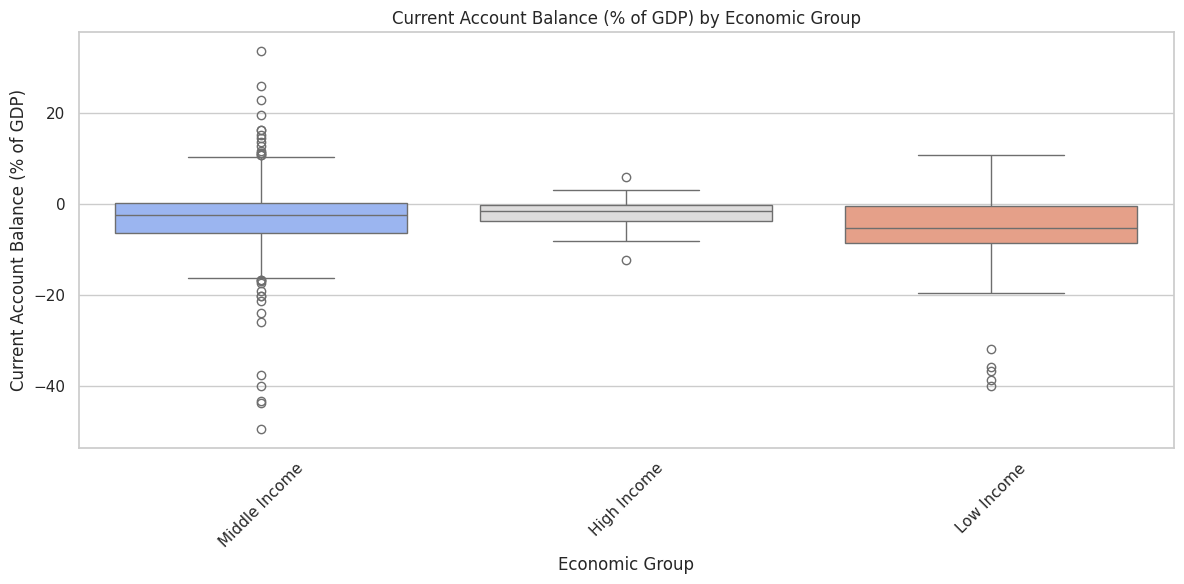

<ipython-input-13-dd6921adb097>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


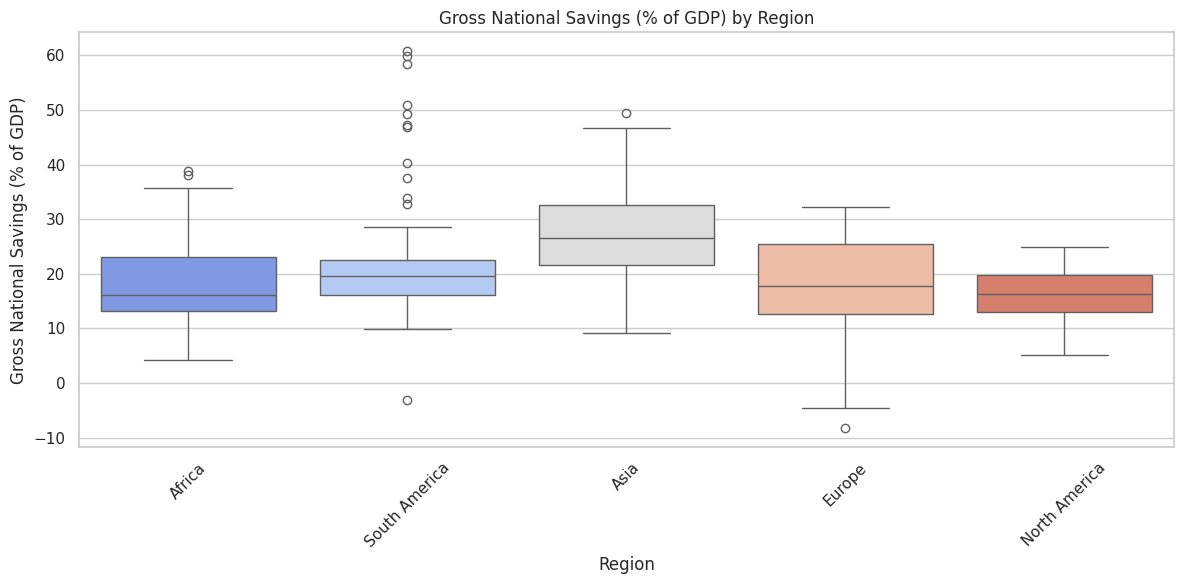

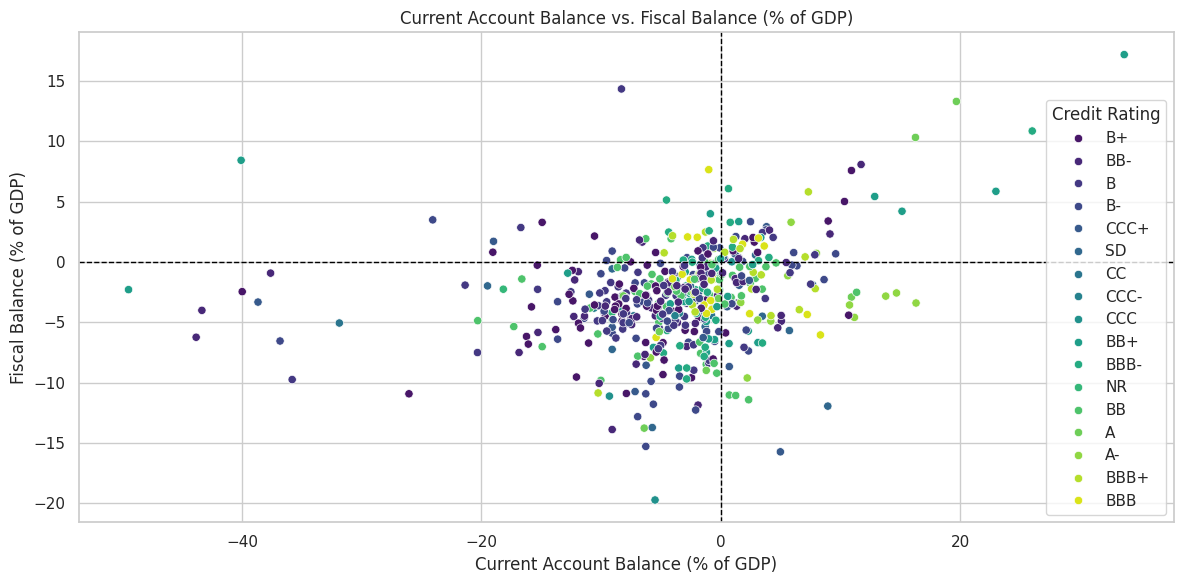

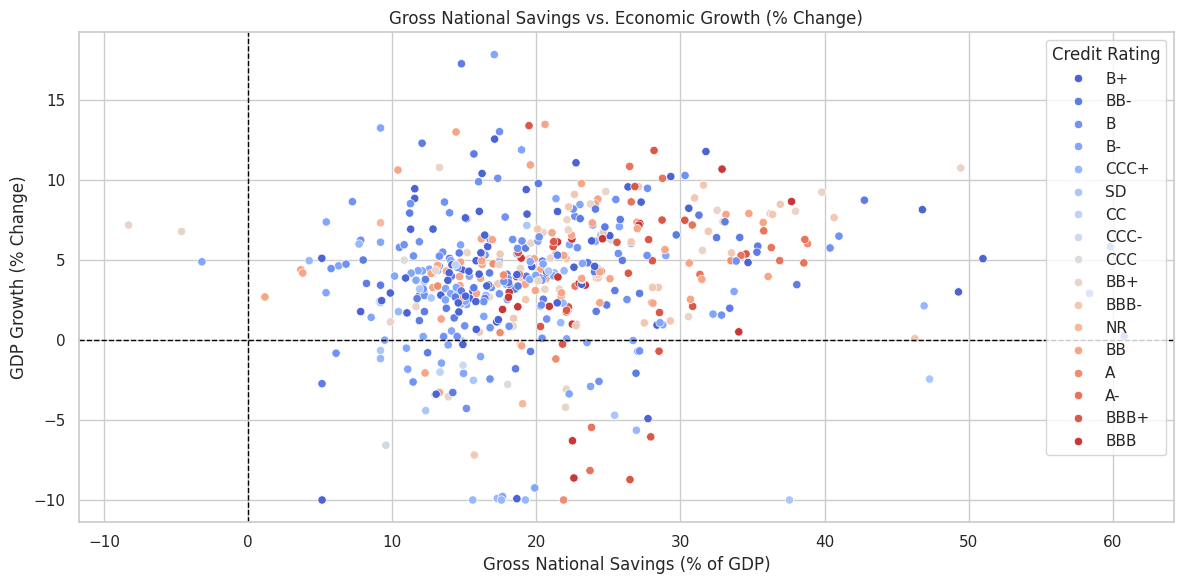

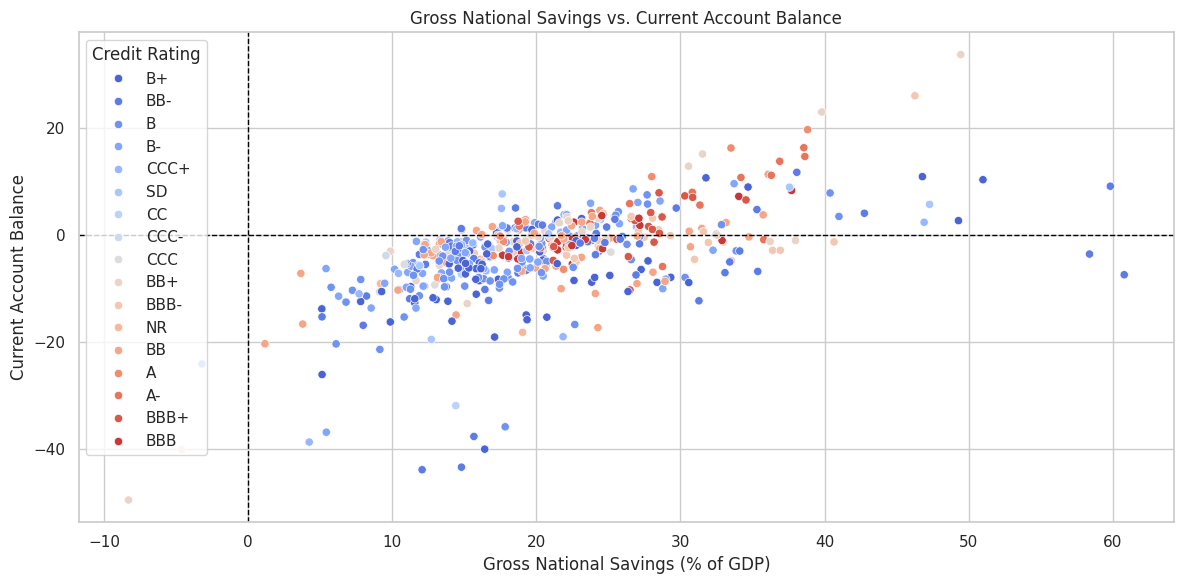

In [13]:
# Boxplot: Current Account Balance by Economic Group
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='economic_group',
    y='current_account_balance_gdp',
    palette='coolwarm'
)
plt.title('Current Account Balance (% of GDP) by Economic Group')
plt.ylabel('Current Account Balance (% of GDP)')
plt.xlabel('Economic Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot: Gross National Savings by Region
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='region',
    y='gross_national_savings_gdp',
    palette='coolwarm'
)
plt.title('Gross National Savings (% of GDP) by Region')
plt.ylabel('Gross National Savings (% of GDP)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter Plot: Current Account Balance vs. Fiscal Balance



plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='current_account_balance_gdp',
    y='gov_net_lending_borrowing_gdp',
    hue='Foreign LT',
    palette='viridis',
    legend='full'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at y=0
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add vertical line at x=0
plt.title('Current Account Balance vs. Fiscal Balance (% of GDP)')
plt.xlabel('Current Account Balance (% of GDP)')
plt.ylabel('Fiscal Balance (% of GDP)')
plt.legend(title='Credit Rating')
plt.tight_layout()
plt.show()

# Scatter Plot: Gross National Savings vs. GDP Growth
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='gross_national_savings_gdp',
    y='gdp_constant_prices_pct_change',
    hue='Foreign LT',
    palette='coolwarm',
    legend='full'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at y=0
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add vertical line at x=0
plt.title('Gross National Savings vs. Economic Growth (% Change)')
plt.xlabel('Gross National Savings (% of GDP)')
plt.ylabel('GDP Growth (% Change)')
plt.legend(title='Credit Rating')
plt.tight_layout()
plt.show()


# Scatter Plot: Gross National Savings vs. GDP Growth
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='gross_national_savings_gdp',
    y='current_account_balance_gdp',
    hue='Foreign LT',
    palette='coolwarm',
    legend='full'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at y=0
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add vertical line at x=0
plt.title('Gross National Savings vs. Current Account Balance')
plt.xlabel('Gross National Savings (% of GDP)')
plt.ylabel('Current Account Balance')
plt.legend(title='Credit Rating')
plt.tight_layout()
plt.show()




### External Positions and Sovereign Risk

#### **Key Indicators Analyzed**
The relationship between **Gross National Savings** and **Current Account Balance** serves as a key indicator of a country's external position, which directly influences its sovereign risk and credit ratings. These metrics highlight the balance between savings and external financing needs, which are critical for understanding economic resilience and sustainability.

#### **Box Plot Analysis**

1. **Gross National Savings (% of GDP) by Region**:
   - **Asia**: Displays the highest median savings rate across regions, with several outliers above 50% of GDP, reflecting robust domestic savings that support investment and limit reliance on external financing.
   - **Africa and South America**: Exhibit moderate savings rates with significant variability, indicating diverse economic conditions and capacity for external shocks.
   - **Europe and North America**: Moderate but stable savings rates align with developed economic systems and lower vulnerability to external shocks.

2. **Current Account Balance (% of GDP) by Economic Group**:
   - **Low-Income Economies**: Predominantly negative current account balances, reflecting reliance on external borrowing to finance deficits.
   - **Middle-Income Economies**: Wide range of current account positions, with some economies achieving positive balances through exports or fiscal prudence.
   - **High-Income Economies**: Tend to exhibit near-zero or positive balances, indicating balanced external positions and lower sovereign risk.

#### **Scatter Plot Insights**

1. **Gross National Savings vs. Current Account Balance**:
   - A positive correlation is observed, where higher gross savings often translate into stronger current account positions.
   - **Top-Right Quadrant (High Savings, Positive Balance)**:
     - Economies with high savings rates and current account surpluses are typically associated with high credit ratings (e.g., A, BBB+). These economies effectively manage external debt and ensure sustainable financing.
   - **Top-Left Quadrant (Low Savings, Positive Balance)**:
     - Economies with lower savings but positive current account balances may rely on temporary export booms or external support.
   - **Bottom-Left Quadrant (Low Savings, Negative Balance)**:
     - Reflects high external vulnerability, with countries often rated CCC or lower. These economies struggle to maintain economic stability under adverse conditions.
   - **Bottom-Right Quadrant (High Savings, Negative Balance)**:
     - Indicates economies with strong savings but trade deficits, potentially due to high import dependence or investment-driven growth.

2. **Gross National Savings vs. Economic Growth**:
   - Economies with higher savings rates generally cluster in the **positive economic growth quadrant**, supporting the idea that savings fuel productive investments.
   - Outliers with high savings but low growth may reflect inefficiencies in capital allocation or structural challenges.

3. **Current Account Balance vs. Fiscal Balance**:
   - Economies with strong current account and fiscal balances often achieve higher credit ratings, while those with dual deficits face greater sovereign risk.
   - The **EWS article** highlights the compounding effect of external and fiscal vulnerabilities on creditworthiness, emphasizing the importance of managing external positions effectively.

---

#### **Key Insights**
1. **Savings and Sovereign Risk**:
   - High gross savings rates bolster economic resilience by reducing dependency on external financing and supporting counter-cyclical measures during crises.
   - Positive current account balances further reduce sovereign risk by ensuring sustainable financing of deficits.

2. **Regional and Economic Group Disparities**:
   - High-income economies maintain stable external positions due to advanced fiscal systems and export competitiveness.
   - Low-income economies face significant external vulnerabilities, reflected in negative current account balances and limited fiscal space.

3. **Credit Ratings**:
   - Strong external positions (high savings and positive balances) correlate with higher credit ratings (e.g., A, BBB+), reinforcing the link between external sustainability and creditworthiness.

---

#### **Observations and Next Steps**
1. **Observations**:
   - External vulnerabilities are prominent in low-income economies, exacerbating sovereign risk.
   - Strengthening gross savings and managing current account deficits are critical to improving economic resilience and credit ratings.

2. **Next Steps**:
   - Examine **exports and imports trends** (`exports_goods_pct_change` and `imports_goods_pct_change`) to further assess trade dynamics and their impact on external sustainability.
   - Integrate fiscal, external, and economic growth insights to identify key early warning signals for sovereign risk.


<ipython-input-14-597c594edc5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


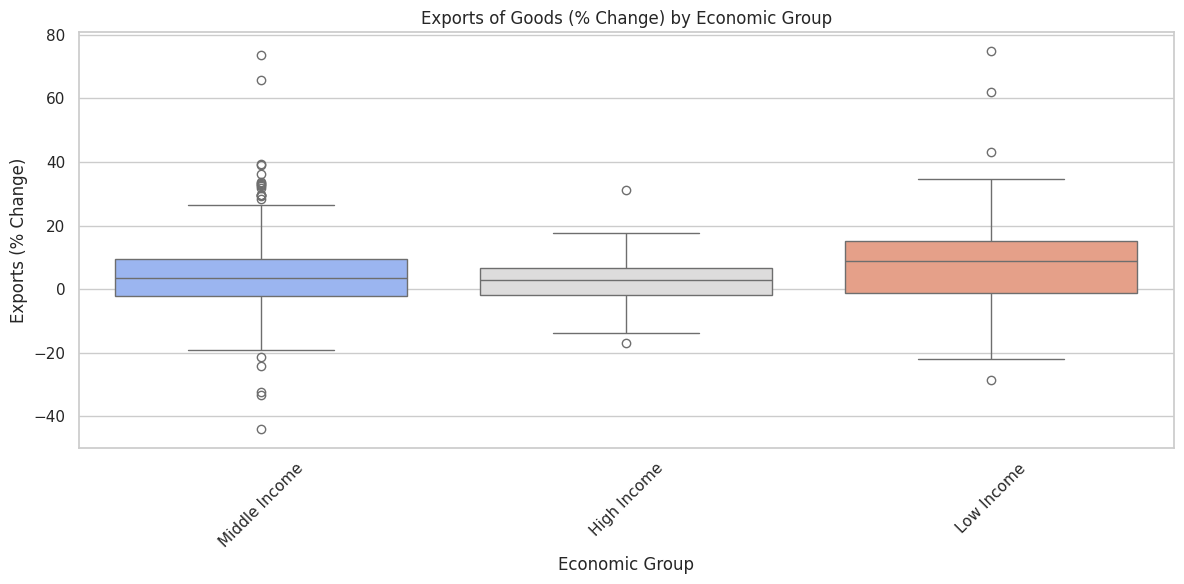

<ipython-input-14-597c594edc5d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


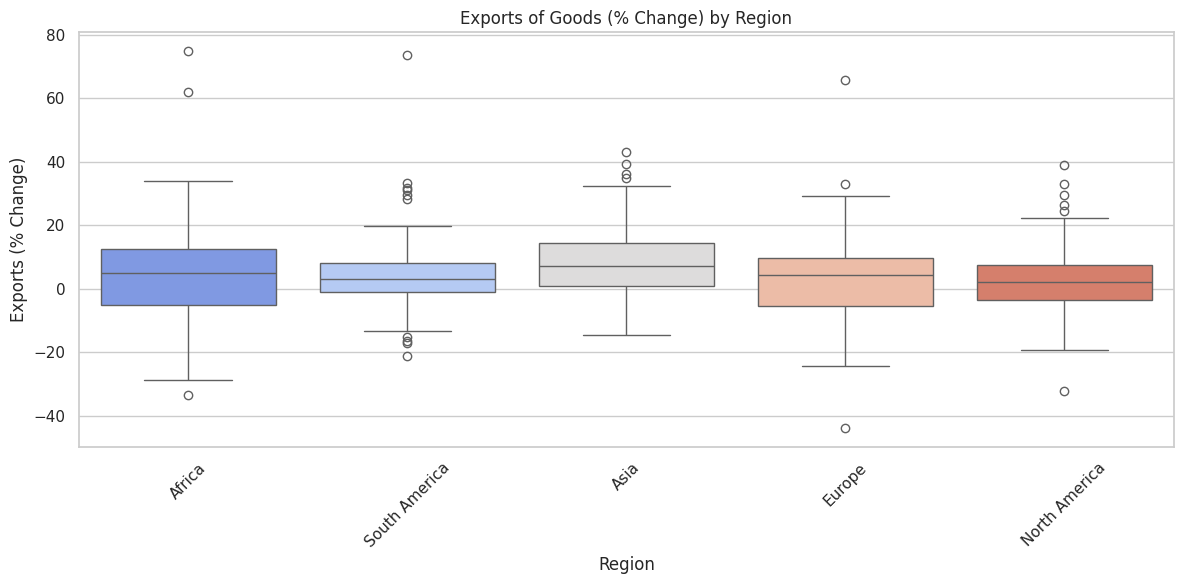

<ipython-input-14-597c594edc5d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


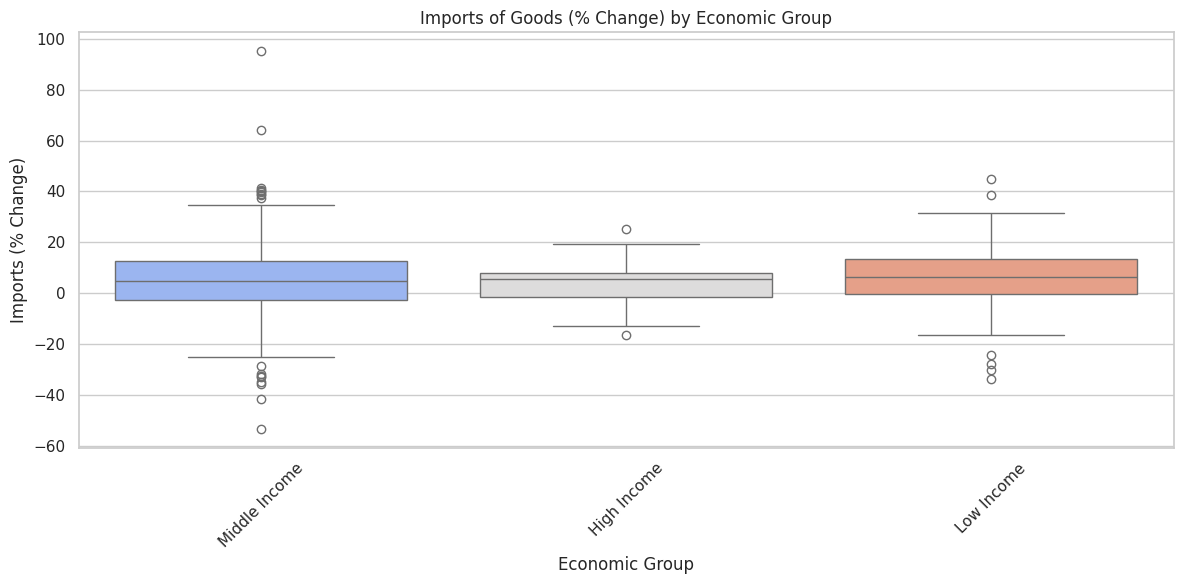

<ipython-input-14-597c594edc5d>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


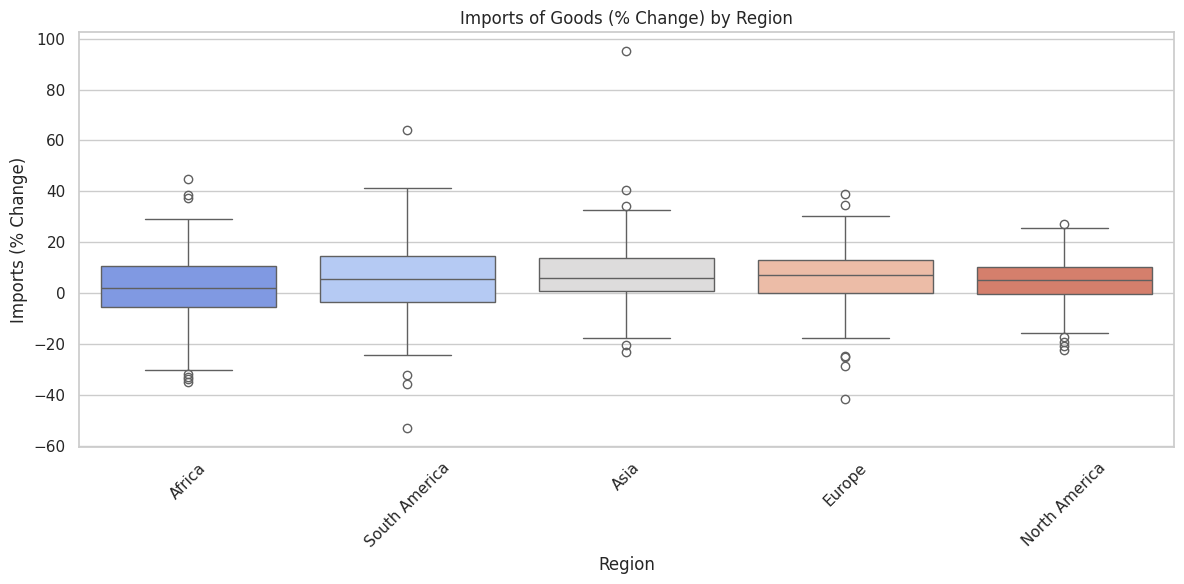

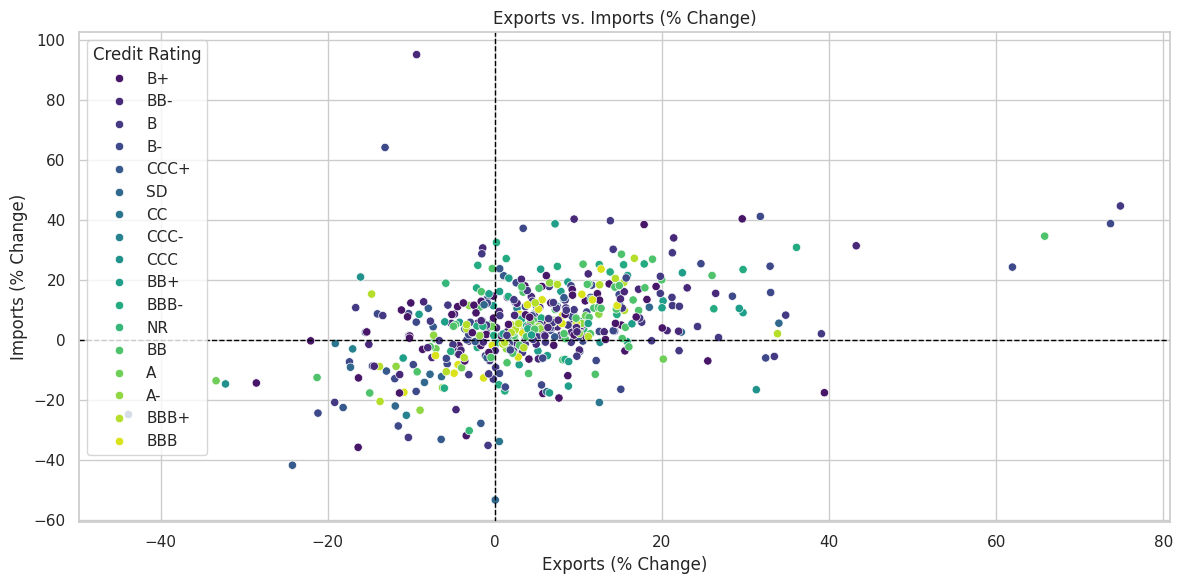

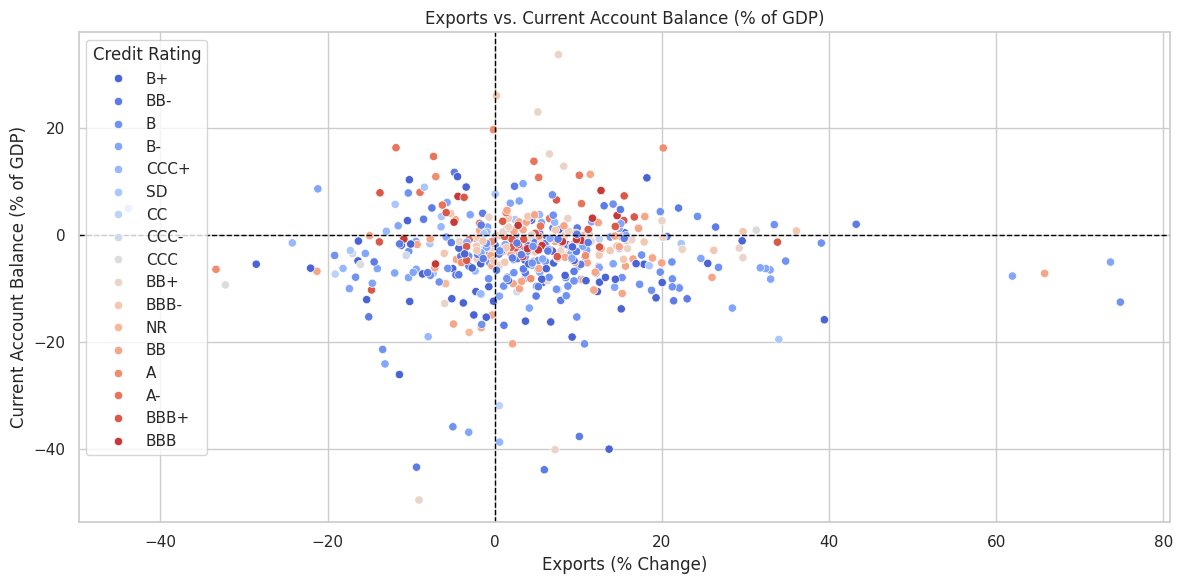

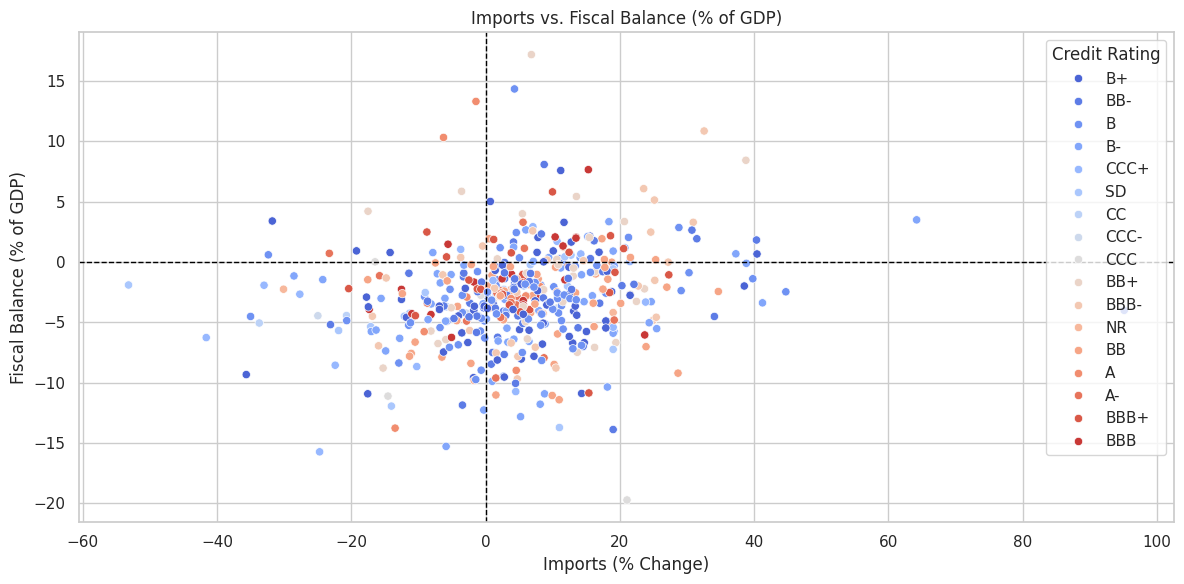

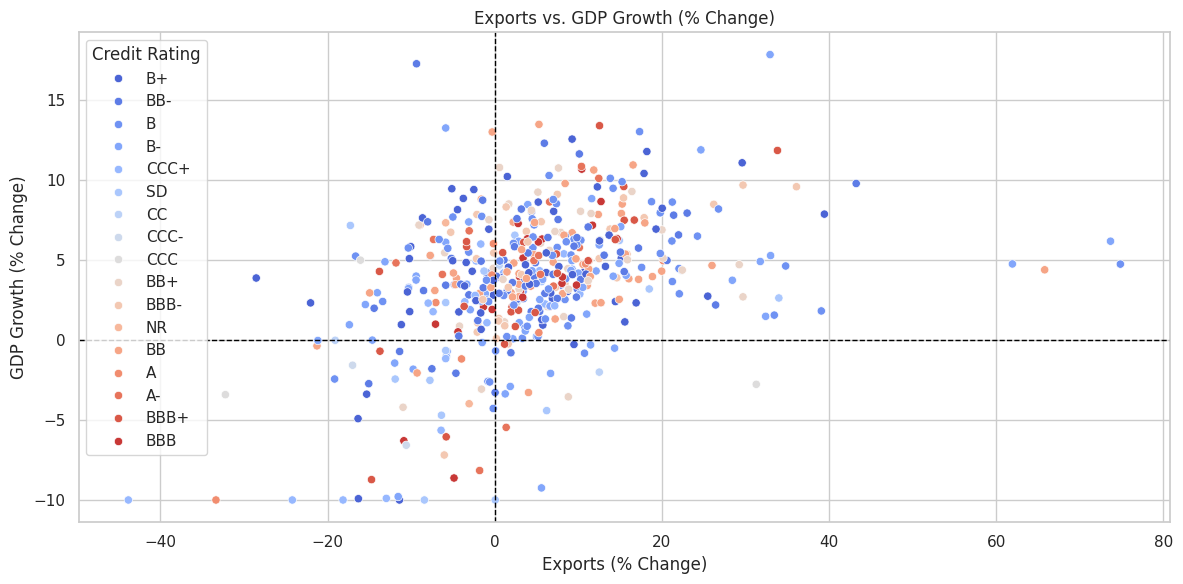

In [14]:
# Boxplot: Exports of Goods (% Change) by Economic Group
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='economic_group',
    y='exports_goods_pct_change',
    palette='coolwarm'
)
plt.title('Exports of Goods (% Change) by Economic Group')
plt.ylabel('Exports (% Change)')
plt.xlabel('Economic Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot: Exports of Goods (% Change) by Region
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='region',
    y='exports_goods_pct_change',
    palette='coolwarm'
)
plt.title('Exports of Goods (% Change) by Region')
plt.ylabel('Exports (% Change)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot: Imports of Goods (% Change) by Economic Group
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='economic_group',
    y='imports_goods_pct_change',
    palette='coolwarm'
)
plt.title('Imports of Goods (% Change) by Economic Group')
plt.ylabel('Imports (% Change)')
plt.xlabel('Economic Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot: Imports of Goods (% Change) by Region
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='region',
    y='imports_goods_pct_change',
    palette='coolwarm'
)
plt.title('Imports of Goods (% Change) by Region')
plt.ylabel('Imports (% Change)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter Plot: Exports vs. Imports (% Change)
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='exports_goods_pct_change',
    y='imports_goods_pct_change',
    hue='Foreign LT',
    palette='viridis',
    legend='full'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at y=0
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add vertical line at x=0
plt.title('Exports vs. Imports (% Change)')
plt.xlabel('Exports (% Change)')
plt.ylabel('Imports (% Change)')
plt.legend(title='Credit Rating')
plt.tight_layout()
plt.show()

# Scatter Plot: Exports vs. Current Account Balance
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='exports_goods_pct_change',
    y='current_account_balance_gdp',
    hue='Foreign LT',
    palette='coolwarm',
    legend='full'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title('Exports vs. Current Account Balance (% of GDP)')
plt.xlabel('Exports (% Change)')
plt.ylabel('Current Account Balance (% of GDP)')
plt.legend(title='Credit Rating')
plt.tight_layout()
plt.show()

# Scatter Plot: Imports vs. Fiscal Balance
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='imports_goods_pct_change',
    y='gov_net_lending_borrowing_gdp',
    hue='Foreign LT',
    palette='coolwarm',
    legend='full'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title('Imports vs. Fiscal Balance (% of GDP)')
plt.xlabel('Imports (% Change)')
plt.ylabel('Fiscal Balance (% of GDP)')
plt.legend(title='Credit Rating')
plt.tight_layout()
plt.show()

# Scatter Plot: Trade Metrics vs. GDP Growth
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='exports_goods_pct_change',
    y='gdp_constant_prices_pct_change',
    hue='Foreign LT',
    palette='coolwarm',
    legend='full'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title('Exports vs. GDP Growth (% Change)')
plt.xlabel('Exports (% Change)')
plt.ylabel('GDP Growth (% Change)')
plt.legend(title='Credit Rating')
plt.tight_layout()
plt.show()



### External Trade Analysis: Exports and Imports Impact on Sovereign Risk

#### **Key Insights from Boxplots: Exports of Goods (% Change)**

1. **Exports by Economic Group**:
   - **High-Income Countries**:
     - Exhibit relatively stable export growth with lower variability. This reflects established and diversified trade systems.
   - **Middle-Income Countries**:
     - Moderate export growth but higher variability compared to high-income countries. This indicates vulnerability to external trade shocks.
   - **Low-Income Countries**:
     - Show the highest variability in exports, highlighting economic reliance on limited export goods or commodities.

2. **Exports by Region**:
   - **Africa and South America**:
     - Significant variability in export growth suggests dependency on volatile commodity prices (e.g., minerals, oil).
   - **Europe and Asia**:
     - Consistent export growth aligns with industrialization and integration into global value chains.
   - **North America**:
     - Moderately stable export growth due to advanced trade networks and diversified economic structures.

---

#### **Key Insights from Boxplots: Imports of Goods (% Change)**

1. **Imports by Economic Group**:
   - **High-Income Countries**:
     - Lower variability in imports reflects predictable consumption and investment patterns.
   - **Middle-Income & Low Income Countries**:
     - Variability driven by transitional industrialization and infrastructure development or indicative of reliance on external capital and goods, exposing these economies to trade shocks.

2. **Imports by Region**:
   - **Africa and South America**:
     - Imports show high variability, highlighting trade imbalances and dependence on external financing.
   - **Asia**:
     - Relatively stable import growth due to growing industrial sectors and improved trade agreements.
   - **Europe**:
     - Consistent import trends, aligned with strong intra-regional trade and economic stability.
   - **North America**:
     - Moderate variability reflecting controlled import dependency.

---

#### **Key Scatter Plot Insights**

1. **Exports vs. Imports (% Change)**:
   - Positive correlation in most regions and economic groups reflects balanced trade patterns.
   - Outliers with extreme import or export growth indicate potential trade shocks or economic transitions.

2. **Exports vs. Current Account Balance (% of GDP)**:
   - Stronger exports generally correspond to improved current account balances and result in better credit ratings.
   - Countries with lower credit ratings (e.g., B or CCC) often show negative balances, indicating trade deficits and reliance on external financing.

3. **Imports vs. Fiscal Balance (% of GDP)**:
   - Advanced economies (A, BBB ratings) manage fiscal deficits more effectively despite import reliance as reflexted with clustering around the 0% of GDP fiscal balance line compared to lower rated sovereigns.

4. **Trade Metrics vs. GDP Growth (% Change)**:
   - Positive export growth aligns with higher GDP growth, emphasizing the role of trade in economic performance as reflected in the top right quadrant.
   - Negative export growth correlates with a wider variablitity  of GDP growth, often observed in lower-rated economies top and bottom left quadrants.

---

#### Context from the S&P EWS Article:
- **Trade Dynamics and Sovereign Risk**:
  - External trade imbalances exacerbate fiscal and current account deficits, limiting economic flexibility.
  - Diversified exports and controlled imports are critical for sustaining creditworthiness and economic stability.
  - Countries reliant on commodity exports face greater vulnerabilities to global market fluctuations.

  #### Next Steps

1. **Examine Debt Sustainability Indicators**:
   - Analyze government debt-to-GDP ratios, interest expense as a percentage of GDP, and external debt metrics.
   - Explore the relationship between these debt indicators and sovereign credit ratings, emphasizing fiscal risks.

2. **Temporal Analysis**:
   - Investigate trends over time for key variables such as fiscal balance, current account balance, GDP growth, and inflation.
   - Assess temporal patterns in sovereign credit rating changes and identify early warning signals.



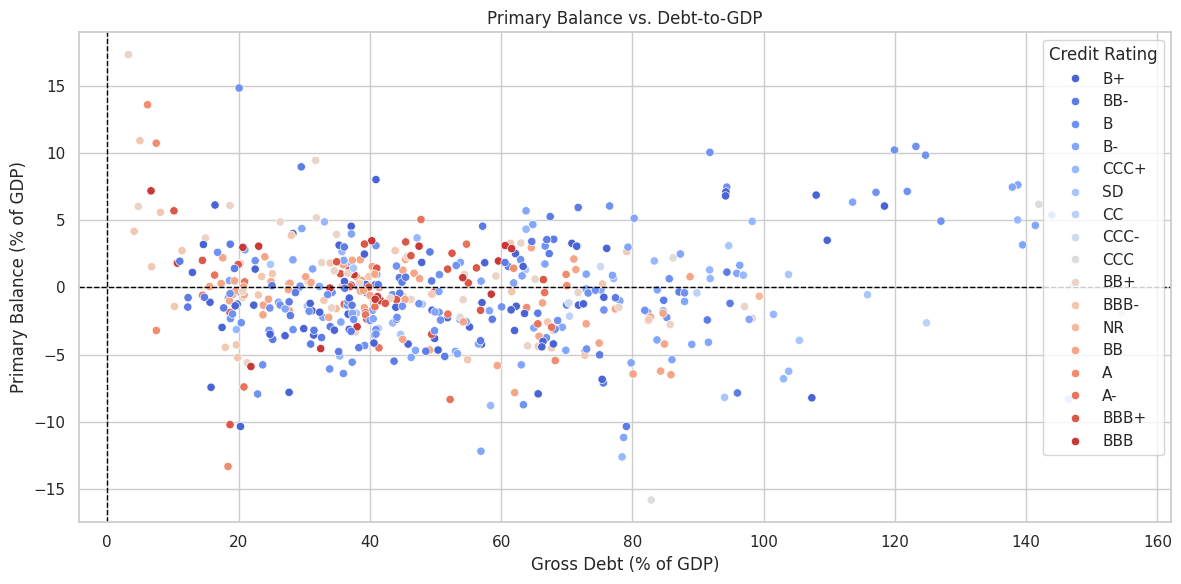

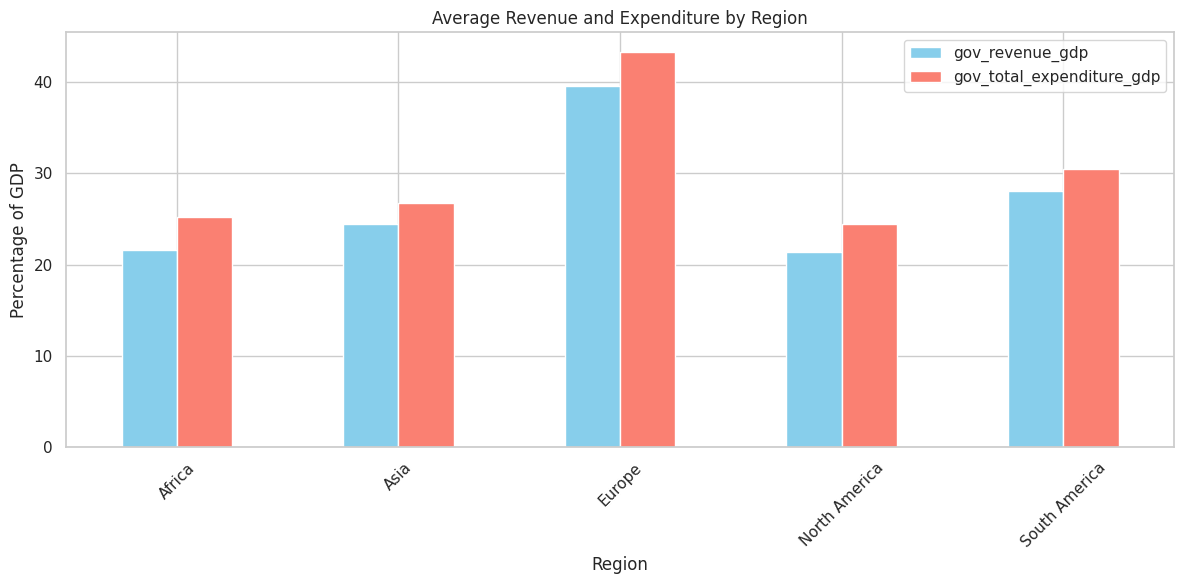

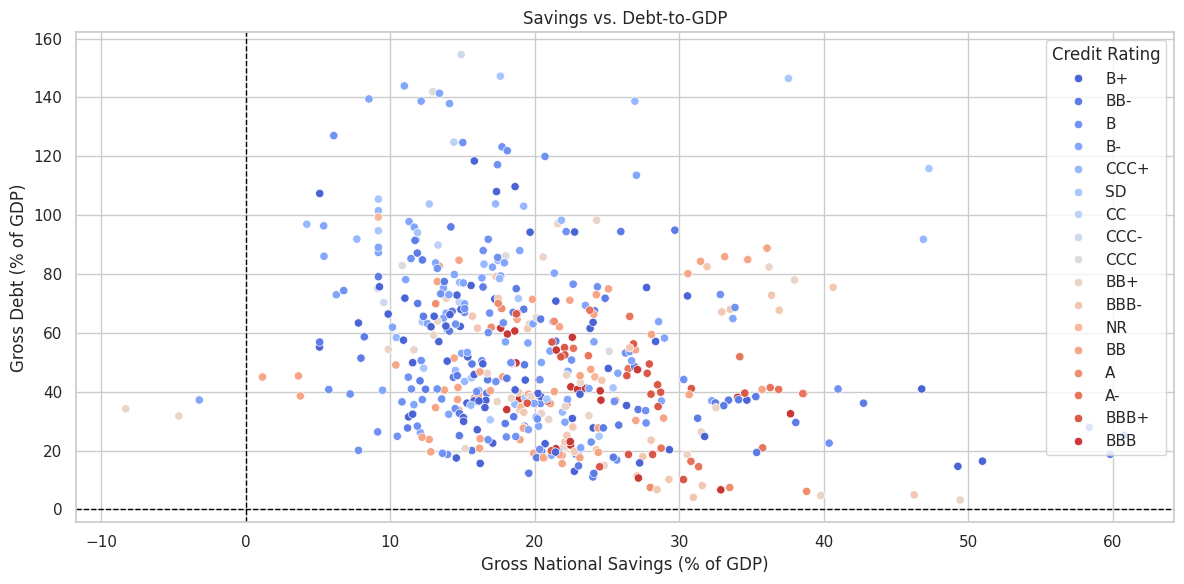

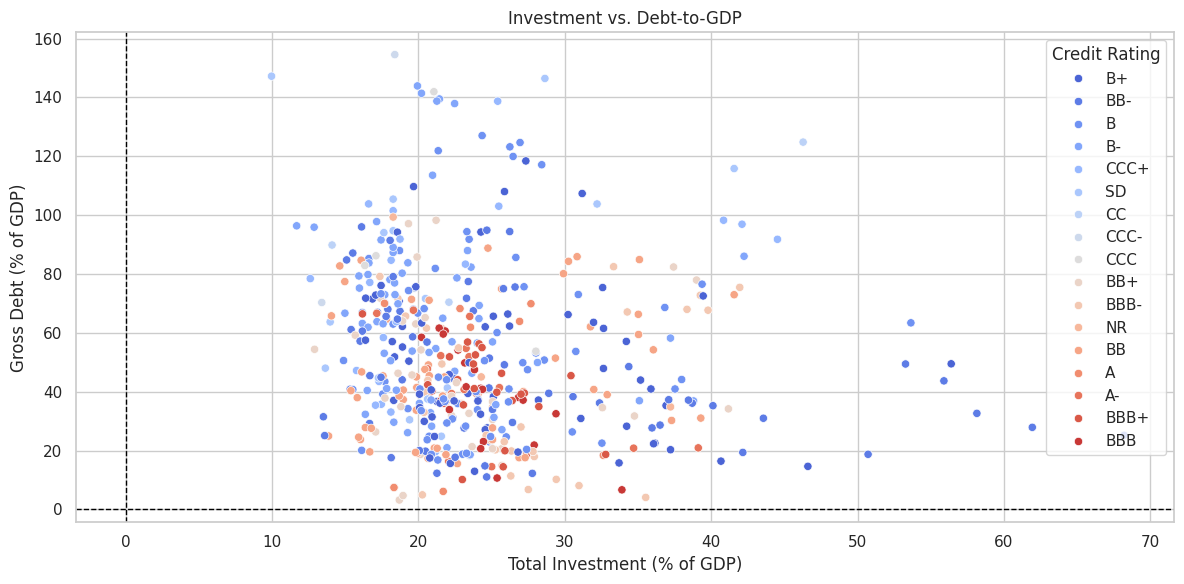

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter Plot: Primary Balance vs. Debt-to-GDP
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='gov_gross_debt_gdp',
    y='gov_primary_net_lending_borrowing_gdp',
    hue='Foreign LT',
    palette='coolwarm',
    legend='full'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line at x=0
plt.title('Primary Balance vs. Debt-to-GDP')
plt.xlabel('Gross Debt (% of GDP)')
plt.ylabel('Primary Balance (% of GDP)')
plt.legend(title='Credit Rating')
plt.tight_layout()
plt.show()

# 2. Bar Plot: Revenue and Expenditure by Region
grouped_data = data.groupby('region')[['gov_revenue_gdp', 'gov_total_expenditure_gdp']].mean().reset_index()
grouped_data.plot(
    x='region',
    kind='bar',
    figsize=(12, 6),
    color=['skyblue', 'salmon'],
    title='Average Revenue and Expenditure by Region'
)
plt.ylabel('Percentage of GDP')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Scatter Plot: Savings vs. Debt-to-GDP
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='gross_national_savings_gdp',
    y='gov_gross_debt_gdp',
    hue='Foreign LT',
    palette='coolwarm',
    legend='full'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line at x=0
plt.title('Savings vs. Debt-to-GDP')
plt.xlabel('Gross National Savings (% of GDP)')
plt.ylabel('Gross Debt (% of GDP)')
plt.legend(title='Credit Rating')
plt.tight_layout()
plt.show()


# 4. Scatter Plot: Investment vs. Debt-to-GDP
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='total_investment_gdp',
    y='gov_gross_debt_gdp',
    hue='Foreign LT',
    palette='coolwarm',
    legend='full'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line at x=0
plt.title('Investment vs. Debt-to-GDP')
plt.xlabel('Total Investment (% of GDP)')
plt.ylabel('Gross Debt (% of GDP)')
plt.legend(title='Credit Rating')
plt.tight_layout()
plt.show()


### Debt Sustainability Analysis and Key Insights

#### **Primary Balance vs. Gross Debt**
- The scatter plot reveals a weak but notable negative correlation between the primary balance (% of GDP) and gross debt levels (% of GDP).
  - **Countries with Surpluses**: Economies maintaining primary surpluses (positive primary balance) generally exhibit lower gross debt-to-GDP ratios, particularly among highly rated sovereigns (e.g., A or BBB-rated).
  - **High Debt Levels**: Sovereigns with debt-to-GDP ratios exceeding 100% are predominantly associated with negative primary balances, often corresponding to credit ratings in the CCC or lower range.
- **Key Context from the EWS Article**:
  - Fiscal mismanagement and sustained deficits exacerbate sovereign risk, leading to downgrades and limited fiscal flexibility. The results align with this, showing weak fiscal positions in highly indebted countries.

#### **Average Revenue and Expenditure by Region**
- The bar chart illustrates significant regional disparities in revenue and expenditure:
  - **Europe**: Achieves the highest government revenue and expenditure as a share of GDP, reflecting robust tax collection systems and extensive welfare states.
  - **Africa and South America**: Both regions report lower revenues relative to expenditures, highlighting fiscal imbalances and limited capacity to mobilize domestic resources.
- **Key Context from the EWS Article**:
  - Revenue shortfalls coupled with persistent fiscal deficits lead to a reliance on debt financing, increasing sovereign risk exposure.

#### **Savings vs. Debt-to-GDP**
- The scatter plot demonstrates that countries with higher gross national savings tend to have lower debt-to-GDP ratios:
  - **Higher-Rated Countries**: Clusted in the bottom center and towards the right reflecting high national savings and lower debt levels
  - **Lower Rated Economies**: Disproportionately clustered in the left quadrants, with low savings and elevated debt ratios.
- **Key Context from the EWS Article**:
  - The results emphasize the critical role of savings in funding investment and mitigating reliance on external borrowing, which can lead to adverse credit outcomes.

#### **Total Investment vs. Debt-to-GDP**
- The scatter plot suggests a weak relationship between total investment (% of GDP) and debt-to-GDP ratios:
  - Economies with high levels of investment (e.g., >30% of GDP) span across varying debt levels, indicating that the source and efficiency of investments are more crucial than their absolute levels.
  - Lower-rated sovereigns exhibit higher debt levels even with moderate investments, suggesting inefficient capital utilization or reliance on debt-financed growth.
- **Key Context from the EWS Article**:
  - Investments driven by borrowing rather than savings or revenue generation can lead to unsustainable debt dynamics, particularly for countries with weak fiscal institutions.

#### **Next Steps**
1. **Temporal Analysis**:
   - Investigate the evolution of key debt sustainability indicators, such as **gross debt-to-GDP**, **primary balance**, and **revenue/expenditure ratios** over time.
   - Perform comparisons across economic groups and regions to assess long-term fiscal trends and emerging vulnerabilities.

2. **Credit Rating Transitions**:
   - Analyze how changes in fiscal and debt indicators correlate with transitions between credit rating categories over time.
   - Focus on sovereigns experiencing upgrades or downgrades to identify key drivers and patterns.


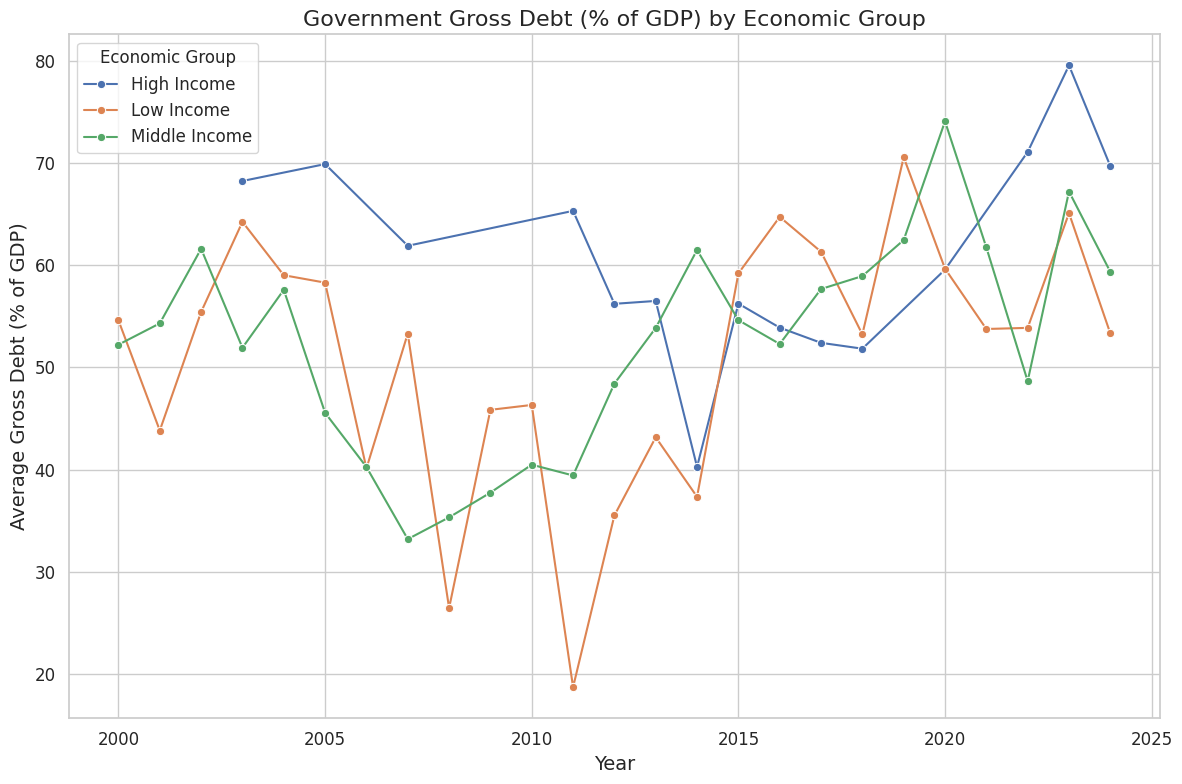

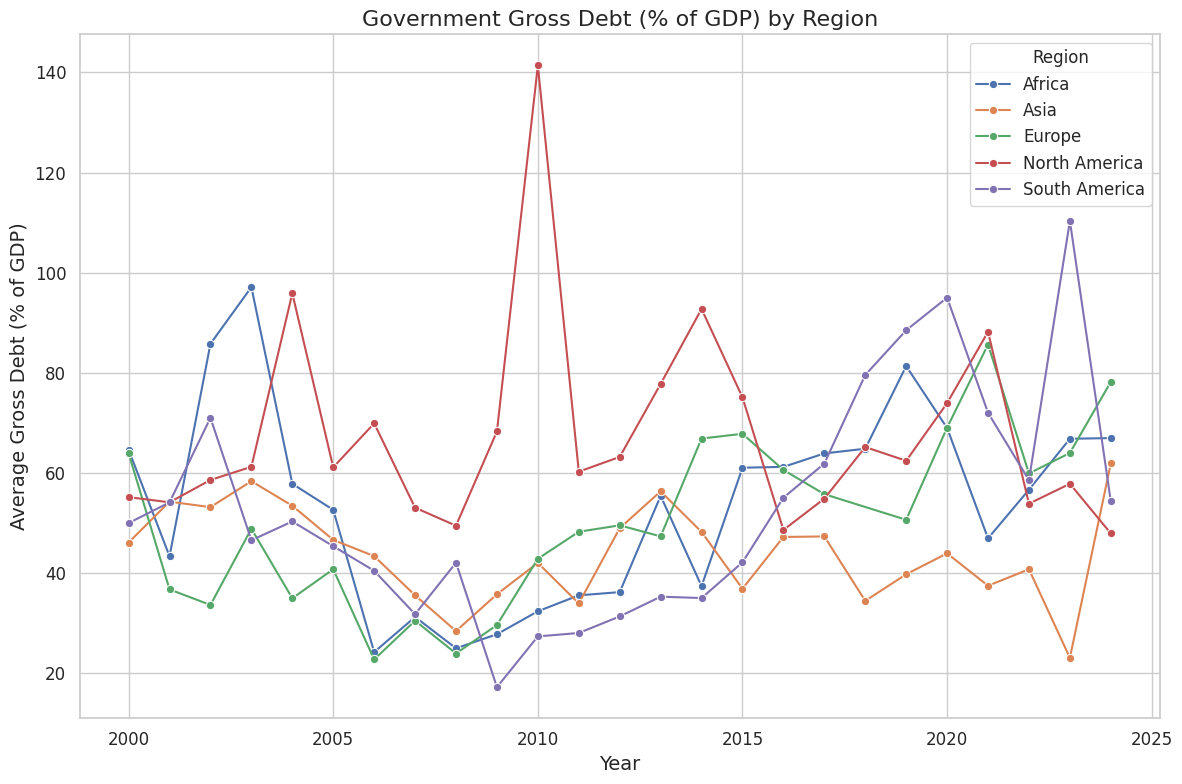

In [16]:
# Aggregate data by economic group and year
grouped_data = data.groupby(['economic_group', 'Year']).agg(
    avg_gross_debt_gdp=('gov_gross_debt_gdp', 'mean')
).reset_index()

# Set the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create the time-series plot
sns.lineplot(
    data=grouped_data,
    x='Year',
    y='avg_gross_debt_gdp',
    hue='economic_group',
    marker='o'
)

# Add titles and labels
plt.title('Government Gross Debt (% of GDP) by Economic Group', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Gross Debt (% of GDP)', fontsize=14)
plt.legend(title='Economic Group', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Aggregate data by region and year
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
grouped_data = data.groupby(['region', 'Year']).agg(
    avg_gross_debt_gdp=('gov_gross_debt_gdp', 'mean')
).reset_index()

sns.lineplot(
    data=grouped_data,
    x='Year',
    y='avg_gross_debt_gdp',
    hue='region',
    marker='o'
)

# Add titles and labels
plt.title('Government Gross Debt (% of GDP) by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Gross Debt (% of GDP)', fontsize=14)
plt.legend(title='Region', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



### Temporal Trends in Government Gross Debt (% of GDP) by Economic Group and Region

#### Key Observations

1. **High-Income Economies**:
   - Maintain consistently high debt-to-GDP ratios, peaking around 70% during some periods.
   - The relative stability reflects strong borrowing capacity, advanced financial systems, and access to affordable credit markets.

2. **Middle-Income Economies**:
   - Show significant variability, with debt-to-GDP ratios ranging from 30% to 70%.
   - Peaks in debt ratios during specific years may indicate external shocks or fiscal pressures.
   - The debt accumulation post-global financial crisis was supported by improved credit ratings, access to international capital markets, and favorable borrowing conditions, as highlighted in post-crisis studies ([World Bank](https://blogs.worldbank.org/en/opendata/observation-external-debt-interest-payments-after-global-crises)).

3. **Low-Income Economies**:
   - Generally exhibit lower debt-to-GDP ratios, often below 50%.
   - Significant declines in the early 2000s align with debt relief programs such as the Heavily Indebted Poor Countries (HIPC) Initiative and the Multilateral Debt Relief Initiative (MDRI) ([IMF](https://www.imf.org/en/About/Factsheets/Sheets/2023/Debt-relief-under-the-heavily-indebted-poor-countries-initiative-HIPC)).

4. **Regional Analysis**:
   - **Africa**:
     - Displays moderate debt-to-GDP ratios, generally below 60%, but with some peaks indicating fiscal stress during specific periods (e.g., post-global financial crisis).
   - **Asia**:
     - Shows consistent and relatively low debt levels, reflecting strong fiscal prudence in many economies.
   - **Europe**:
     - Maintains stable and relatively high debt ratios (~60-80%) due to mature financial markets and access to low-cost borrowing.
   - **North America**:
     - Exhibits sharp peaks during periods of economic stress (e.g., global financial crisis), reflecting reliance on fiscal stimulus and social spending programs.
   - **South America**:
     - Displays the highest variability in debt ratios, with notable spikes exceeding 100%, indicating vulnerability to external shocks and fiscal mismanagement.

#### Context from the EWS Article

- **Debt Vulnerabilities**:
  - High debt-to-GDP ratios, coupled with weak governance and fiscal mismanagement, increase the likelihood of sovereign risk events.
  - Middle-income economies are particularly vulnerable to external conditions, often leading to rapid debt accumulation when access to international credit markets improves.

- **High-Income Stability**:
  - Developed economies can sustain higher debt levels due to robust institutional frameworks and low-cost financing.

- **Low-Income Constraints**:
  - Limited fiscal capacity and reliance on concessional financing make low-income economies susceptible to external shocks, with temporary relief provided through debt forgiveness in the early 2000s.

#### Next Steps

1. **Move to GDP Growth Trends**:
   - Analyze GDP growth rates (`gdp_constant_prices_pct_change`) over time to assess how economic resilience interacts with debt dynamics.
   - Group by `economic_group` and `region` to identify disparities and vulnerabilities.

2. **Feature Engineering Potential**:
   - Consider creating lagged variables for `gov_gross_debt_gdp` to capture delayed effects on economic growth or credit ratings.
   - Explore debt growth rates or debt-to-GDP volatility as potential features for predictive modeling.


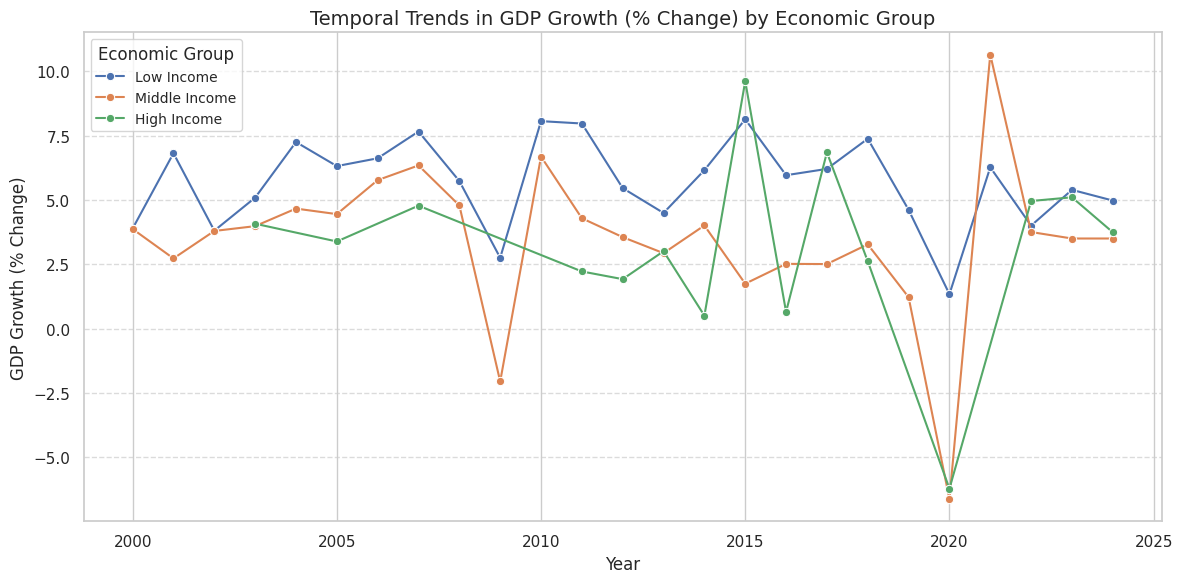

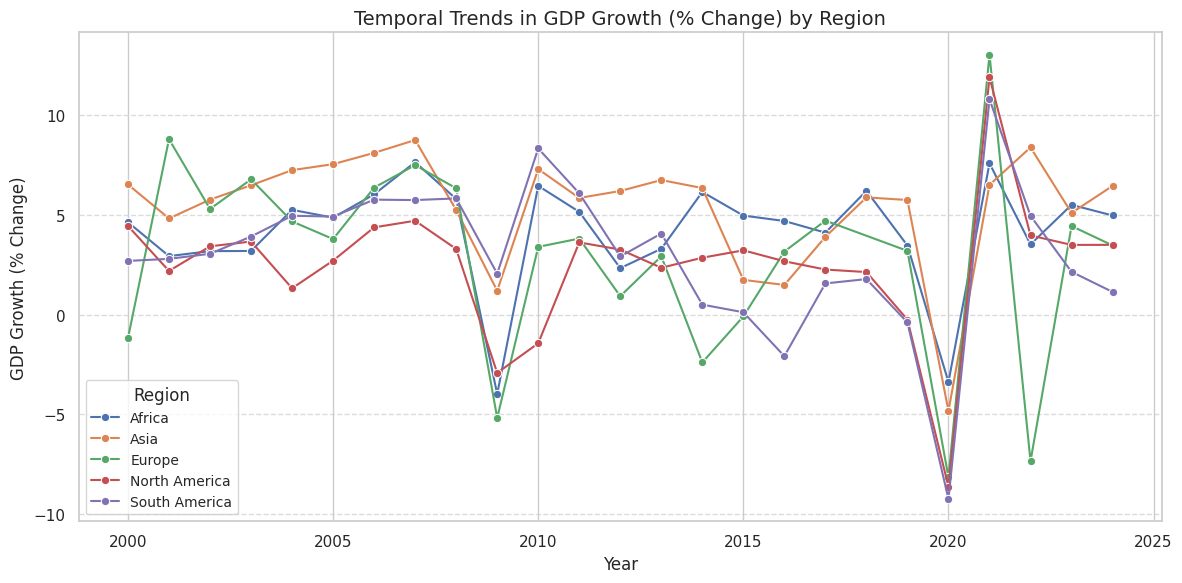

In [17]:
# Grouping and aggregating data by Year and Economic Group
gdp_growth_trend = data.groupby(['Year', 'economic_group'])['gdp_constant_prices_pct_change'].median().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_growth_trend, x='Year', y='gdp_constant_prices_pct_change', hue='economic_group', marker='o')

# Adding title and labels
plt.title('Temporal Trends in GDP Growth (% Change) by Economic Group', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Growth (% Change)', fontsize=12)
plt.legend(title='Economic Group', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


gdp_growth_trend = data.groupby(['Year', 'region'])['gdp_constant_prices_pct_change'].median().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_growth_trend, x='Year', y='gdp_constant_prices_pct_change', hue='region', marker='o')

# Adding title and labels
plt.title('Temporal Trends in GDP Growth (% Change) by Region', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Growth (% Change)', fontsize=12)
plt.legend(title='Region', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

### Temporal Trends in GDP Growth (% Change) by Economic Group and Region

#### Key Observations

1. **Low-Income Economies**:
   - Show the highest median GDP growth rates, averaging around 5-7% in most years.
   - The consistent growth reflects industrialization and development efforts, though these economies are more vulnerable to external shocks, as seen during global crises (e.g., 2008 financial crisis and 2020 COVID-19 pandemic).
   

2. **Middle-Income Economies**:
   - Exhibit moderate growth, averaging around 3-5%, with greater volatility during crises.
   - The sharp dip in 2009 aligns with the global financial crisis, and the rapid rebound post-crisis reflects increased access to credit markets and fiscal stimulus measures.
   - Growth spikes in 2020-2021 may indicate a recovery from the pandemic, supported by increased fiscal spending and global liquidity.
   

3. **High-Income Economies**:
   - Maintain relatively stable growth, averaging 2-3%, with significant contractions during global crises (e.g., 2009 and 2020).
   - The strong rebound post-crisis highlights their resilience and access to advanced fiscal and monetary tools.
   

4. **Regional Analysis**:
   - **Asia**: Consistently leads in GDP growth across all income groups, reflecting its role as a global growth driver.
   - **Africa**: Demonstrates consistent growth in low-income economies, but middle-income African countries show moderate volatility.
   - **South America**: Experiences significant growth contractions during crises, with slow recoveries, reflecting deeper structural vulnerabilities.
   - **Europe and North America**: Exhibit more stable growth patterns overall, but severe contractions during crises highlight their sensitivity to global shocks.

#### Context from the EWS Article

- **Economic Growth as a Buffer**:
  - Sustained growth supports debt repayment, reduces sovereign risk, and fosters resilience to shocks.
  - The EWS article highlights that low growth exacerbates fiscal stress, particularly in high-debt economies, increasing the likelihood of default.

- **Crisis Vulnerability**:
  - Sharp growth contractions in middle- and high-income economies during crises reflect their integration into global financial systems.
  - The rapid post-crisis recovery, especially in middle-income economies, aligns with the increased credit rating coverage and favorable borrowing conditions noted in the EWS report.

#### Next Steps

1. **Move to Inflation Trends**:
   - Analyze inflation rates (`inflation_avg_cpi_pct_change`) over time to assess macroeconomic stability and its interaction with GDP growth.
   - Group by `economic_group` or `region` to identify disparities in inflation dynamics.

2. **Feature Engineering Potential**:
   - Create lagged GDP growth variables to explore their predictive power for credit rating changes or fiscal stress.
   - Investigate GDP growth volatility (e.g., standard deviation over rolling windows) as an indicator of economic resilience.


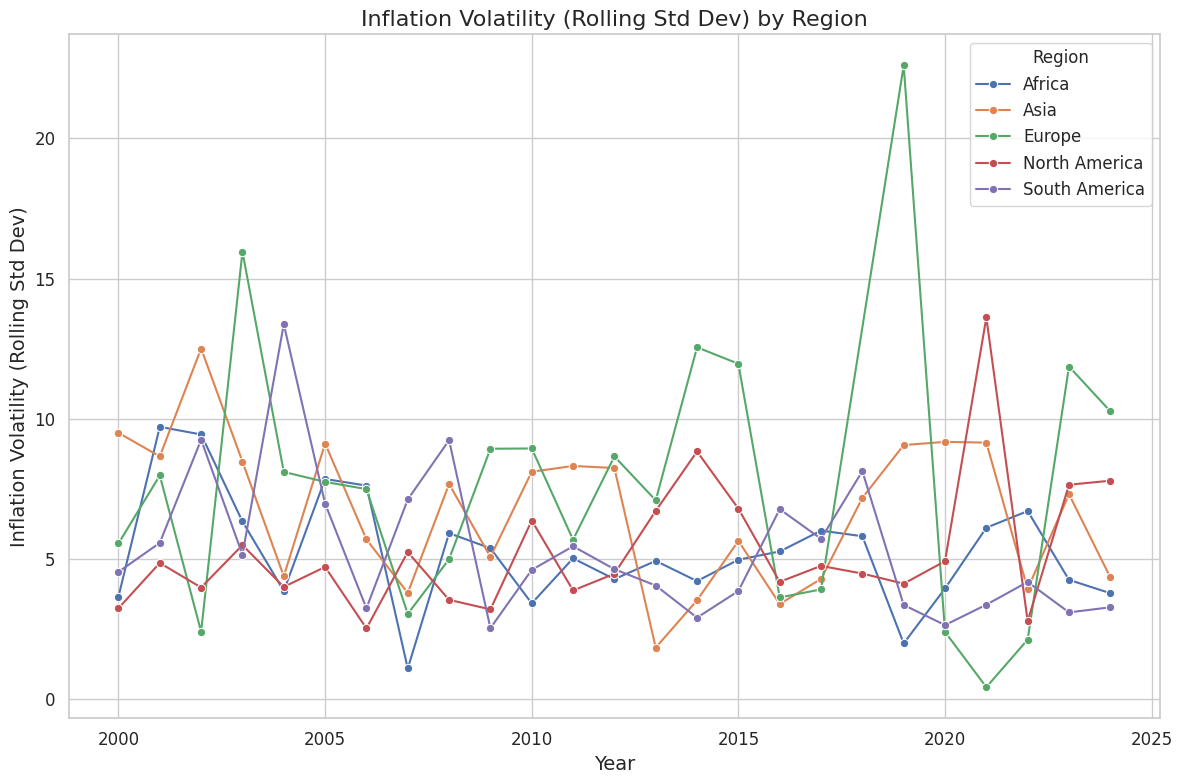

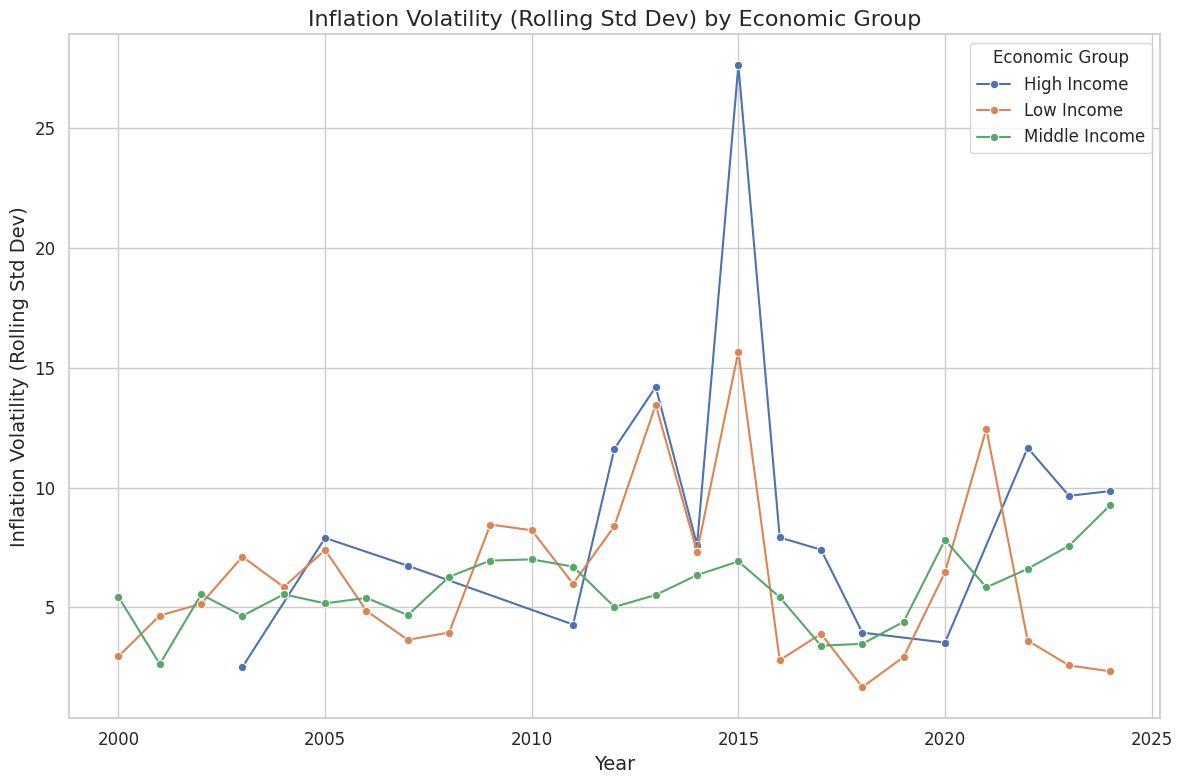

In [18]:
# Calculate rolling standard deviation for inflation volatility
def calculate_inflation_volatility(df, group_col, rolling_window=3):
    # Sort by group and year
    df = df.sort_values(by=[group_col, 'Year'])

    # Calculate rolling standard deviation
    df['inflation_volatility'] = (
        df.groupby(group_col)['inflation_avg_cpi_pct_change']
        .rolling(window=rolling_window, min_periods=1)
        .std()
        .reset_index(drop=True)
    )
    return df

# Apply to region
region_inflation_volatility = calculate_inflation_volatility(data, group_col='region')

# Apply to economic group
econ_group_inflation_volatility = calculate_inflation_volatility(data, group_col='economic_group')


# Aggregate volatility by region and year
volatility_by_region = region_inflation_volatility.groupby(['region', 'Year']).agg(
    avg_volatility=('inflation_volatility', 'mean')
).reset_index()

# Plot inflation volatility by region
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

sns.lineplot(
    data=volatility_by_region,
    x='Year',
    y='avg_volatility',
    hue='region',
    marker='o'
)

plt.title('Inflation Volatility (Rolling Std Dev) by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Inflation Volatility (Rolling Std Dev)', fontsize=14)
plt.legend(title='Region', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


# Aggregate volatility by economic group and year
volatility_by_econ_group = econ_group_inflation_volatility.groupby(['economic_group', 'Year']).agg(
    avg_volatility=('inflation_volatility', 'mean')
).reset_index()

# Plot inflation volatility by economic group
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

sns.lineplot(
    data=volatility_by_econ_group,
    x='Year',
    y='avg_volatility',
    hue='economic_group',
    marker='o'
)

plt.title('Inflation Volatility (Rolling Std Dev) by Economic Group', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Inflation Volatility (Rolling Std Dev)', fontsize=14)
plt.legend(title='Economic Group', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### Inflation Volatility (Rolling Std Dev) by Region and Economic Group

#### Key Observations

1. **Regional Trends**:
   - **Africa**:
     - Shows moderate inflation volatility, with periodic spikes reflecting economic instability and reliance on volatile commodity prices.
     - The 2020-2021 period saw a reduction in volatility, potentially due to stabilizing global commodity prices post-pandemic with a subsequent increase in 2022 following an energy crisis triggered by the Russia war in Ukraine.
   - **Asia**:
     - Consistently exhibits the lowest inflation volatility across regions, reflecting strong monetary policy frameworks in many Asian economies.
     - Volatility remains relatively stable even during global crises, underscoring robust economic management.
   - **Europe**:
     - Demonstrates significant spikes in volatility, notably in 2015 and 2020, driven by fiscal responses to regional debt crises and the COVID-19 pandemic and to a lesser extent the energy cost driven inflation in 2022..
     - Post-crisis stability reflects the influence of advanced monetary and fiscal institutions.
   - **North America**:
     - Shows low volatility overall, with minor spikes during crises, reflecting advanced fiscal and monetary policy tools.
   - **South America**:
     - Experiences the highest inflation volatility among regions, driven by structural weaknesses, political instability, and commodity dependence.
     - Significant spikes in 2008 and 2020 reflect susceptibility to external shocks.

2. **Economic Group Trends**:
  - **High-Income Economies**:
    - Contrary to expectations, **High-Income Economies** show significant spikes in inflation volatility, particularly around 2015 and 2020.
    - The spike in 2015 could be linked to global economic instability or specific regional factors affecting advanced economies.
    - Inflation volatility increases again post-2020.

  - **Middle-Income Economies**:
    - **Middle-Income Economies** exhibit relatively lower inflation volatility than high-income economies during most periods, challenging assumptions about their exposure to external shocks.
    - There is a noticeable spike in 2020, likely driven by pandemic-related disruptions, though it is less pronounced compared to high-income economies.
    - Periodic variability reflects uneven monetary controls but less dramatic swings than previously expected.

 - **Low-Income Economies**:
    - **Low-Income Economies** display more consistent inflation volatility across the years, with occasional spikes.
    - Notable increases occur around 2008 (global financial crisis), 2015, and post 2020 (pandemic effects and commodity price fluctuations).
    - While these economies are generally more vulnerable to external shocks, the volatility appears less dramatic compared to high-income economies in the recent past.

#### Context from the EWS Article

- **Macroeconomic Stability and Sovereign Risk**:
  - High inflation volatility increases macroeconomic instability, erodes fiscal space, and reduces investor confidence, as emphasized in the EWS article.
  - The unexpected inflation volatility in **High-Income Economies** highlights that even advanced economies are not immune to inflation shocks, especially during crises.

- **Policy Frameworks**:
  - The observed volatility suggests that **High-Income Economies** faced unique pressures in 2015 and 2020, potentially linked to energy price shocks, geopolitical instability, or monetary responses.
  - **Middle-Income Economies** demonstrate more stable inflation trends than previously assumed, which could reflect strengthening policy frameworks in some regions.

#### Next Steps

1. **Correlate Volatility with Sovereign Risk**:
   - Analyze the relationship between inflation volatility and sovereign credit ratings or default probabilities.
   - Focus on identifying thresholds of volatility that significantly increase the risk of fiscal crises.

2. **Feature Engineering Potential**:
   - Use inflation volatility as a predictive feature in modeling sovereign risk.
   - Explore lagged volatility measures and their interactions with fiscal metrics (e.g., debt-to-GDP ratios) for enhanced predictive insights.


ROC AUC Score: 0.54


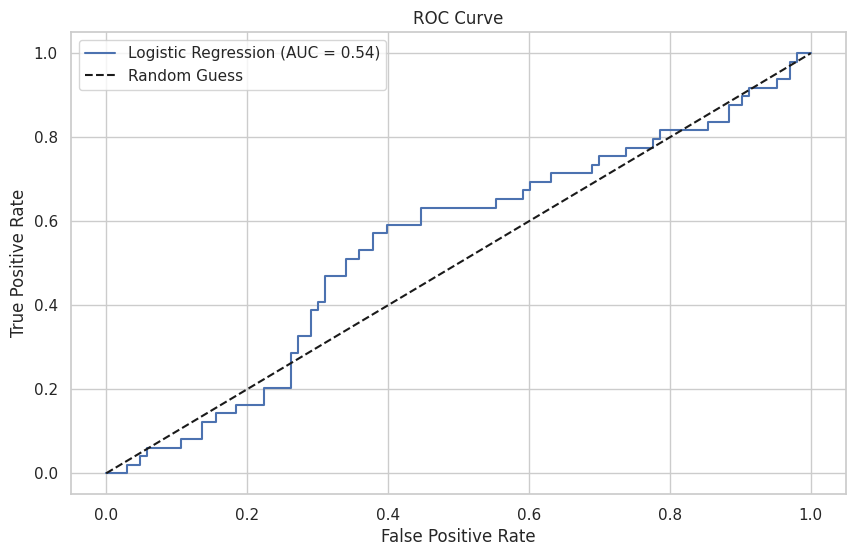

   Threshold       FPR       TPR
0        inf  0.000000  0.000000
1   0.503111  0.009709  0.000000
2   0.502952  0.029126  0.000000
3   0.502905  0.029126  0.020408
4   0.502545  0.048544  0.020408
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       103
           1       0.33      0.27      0.29        49

    accuracy                           0.59       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.56      0.59      0.57       152



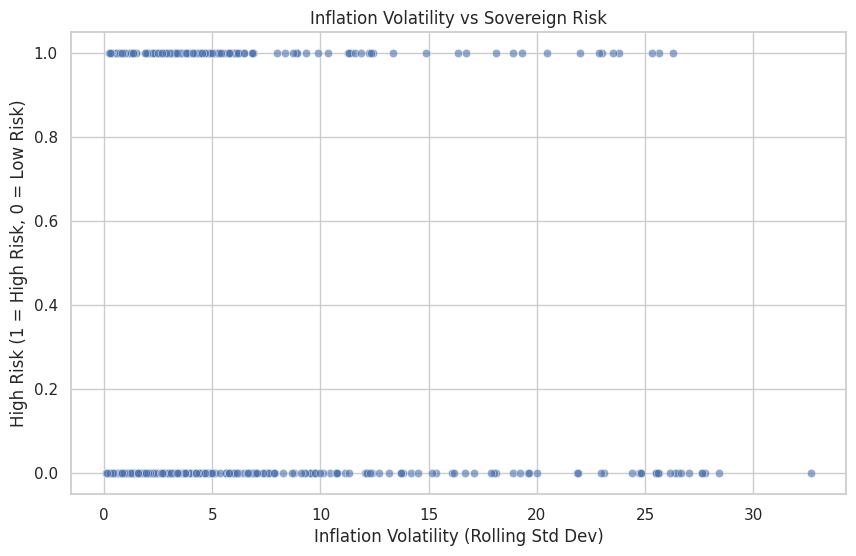

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# Define high-risk credit rating threshold
def categorize_risk(row, threshold="BB"):
    """
    Categorize sovereign risk into high and low based on credit ratings.
    Assumes ratings are ordered (AAA > AA > BB > B > CCC).
    """
    high_risk_ratings = ["CCC", "CC", "SD", "D", "B", "BB-"]
    return 1 if row in high_risk_ratings else 0

# Add a binary risk column based on credit ratings
data['high_risk'] = data['Foreign LT'].apply(categorize_risk)

# Merge inflation volatility data with risk levels
volatility_risk_data = econ_group_inflation_volatility.merge(
    data[['Country', 'Year', 'high_risk']],
    on=['Country', 'Year'],
    how='left'
)

# Drop rows with missing values (if any)
volatility_risk_data = volatility_risk_data.dropna()

# Split the data into features (X) and target (y)
X = volatility_risk_data[['inflation_volatility']]
y = volatility_risk_data['high_risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(class_weight = 'balanced', random_state = 42)
log_reg.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {auc:.2f}")

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Threshold analysis: identify critical volatility levels
threshold_df = pd.DataFrame({'Threshold': thresholds, 'FPR': fpr, 'TPR': tpr})
print(threshold_df.sort_values(by='Threshold', ascending=False).head())

# Classification report
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# Correlation heatmap for visualization
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=volatility_risk_data, x='inflation_volatility', y='high_risk', alpha=0.6)
plt.title('Inflation Volatility vs Sovereign Risk')
plt.xlabel('Inflation Volatility (Rolling Std Dev)')
plt.ylabel('High Risk (1 = High Risk, 0 = Low Risk)')
plt.show()


### Inflation Volatility (Rolling Std Dev) and Sovereign Risk

#### Key Observations

1. **Predictive Analysis**:
   - The ROC Curve suggests limited predictive power of inflation volatility for sovereign risk, with an AUC score of 0.54, indicating performance slightly above random guessing.
   - Classification results highlight a higher ability to identify low-risk sovereigns but limited capability for high-risk identification.

2. **Threshold Analysis**:
   - Analysis of thresholds suggests that inflation volatility alone does not provide clear separation between high-risk and low-risk sovereigns.
   - Elevated volatility levels above 20% are observed sporadically, but not consistently aligned with high-risk sovereigns.

3. **Scatter Plot Observations**:
   - Sovereign risks are spread across varying levels of inflation volatility, with clusters of both high- and low-risk cases at moderate volatility levels.
   - The dispersion indicates that additional factors likely mediate the relationship between inflation volatility and sovereign risk.

#### Next Steps

1. **Temporal Analysis of Current Account Balance**:
   - Explore patterns in current account balance (as % of GDP) by region and economic group over time to evaluate external sustainability and its role in sovereign risk.

2. **Temporal Trends in Government Net Lending/Borrowing**:
   - Analyze trends in government fiscal balance (net lending/borrowing) by region and economic group to assess fiscal sustainability and its temporal link to risk levels.


<ipython-input-20-27dfb5db8178>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  economic_group_trends = data.groupby(['Year', 'economic_group']).apply(


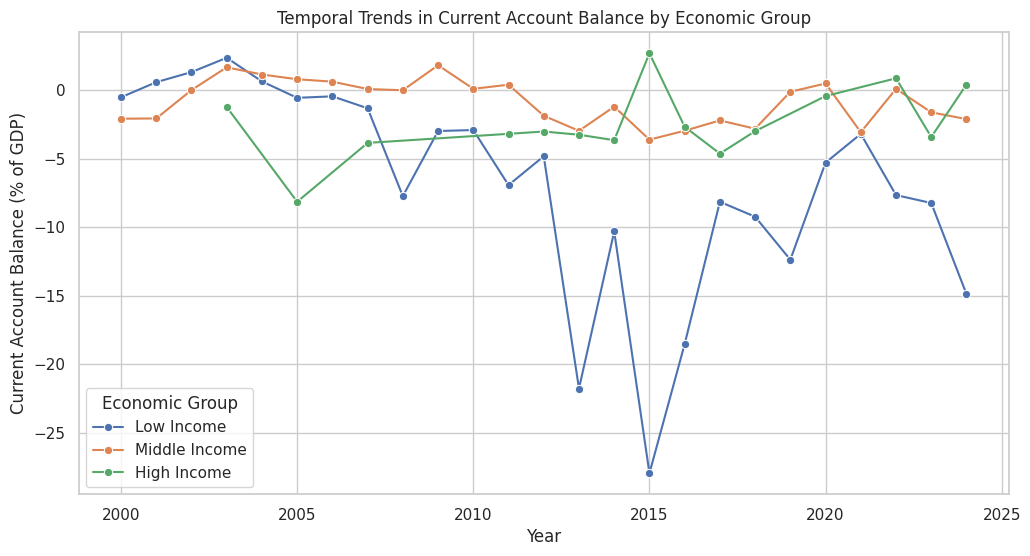

<ipython-input-20-27dfb5db8178>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  region_trends = data.groupby(['Year', 'region']).apply(


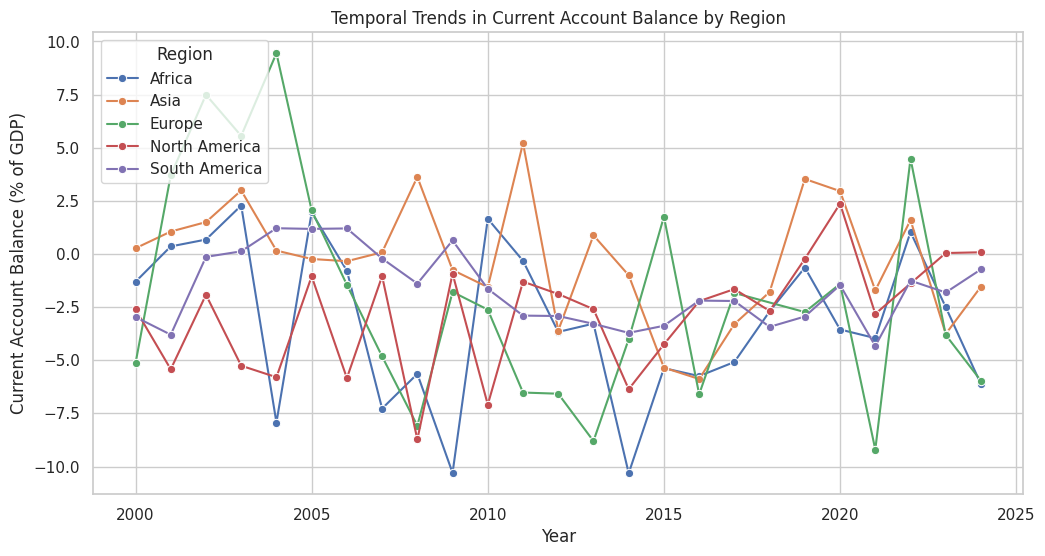

In [20]:
# Set up visualization style
sns.set_style("whitegrid")

# Group by Economic Group

economic_group_trends = data.groupby(['Year', 'economic_group']).apply(
    lambda x: pd.Series({
        'weighted_mean_current_account_balance_gdp': np.average(x['current_account_balance_gdp'], weights=x['gdp_current_ppp'])
    })
).reset_index()


# Plot Current Account Balance Trends by Economic Group
plt.figure(figsize=(12, 6))
sns.lineplot(data=economic_group_trends, x='Year', y='weighted_mean_current_account_balance_gdp', hue='economic_group', marker='o')
plt.title('Temporal Trends in Current Account Balance by Economic Group')
plt.xlabel('Year')
plt.ylabel('Current Account Balance (% of GDP)')
plt.legend(title='Economic Group')
plt.show()

# Group by Region
region_trends = data.groupby(['Year', 'region']).apply(
    lambda x: pd.Series({
        'weighted_mean_current_account_balance_gdp': np.average(x['current_account_balance_gdp'], weights=x['gdp_current_ppp'])
    })
).reset_index()

# Plot Current Account Balance Trends by Region
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_trends, x='Year', y='weighted_mean_current_account_balance_gdp', hue='region', marker='o')
plt.title('Temporal Trends in Current Account Balance by Region')
plt.xlabel('Year')
plt.ylabel('Current Account Balance (% of GDP)')
plt.legend(title='Region', loc='upper left')
plt.show()



### Temporal Trends in Current Account Balance (% of GDP)

#### Key Observations

1. **Trends by Economic Group**:
   - **Low-Income Economies**:
     - Persistent current account deficits observed across the period, with significant dips during global financial crises (e.g., 2008–2009) and around 2015.
     - Countries with large-scale resource investments, such as Mozambique, heavily skew these deficits due to significant imports related to oil and gas projects.
   - **Middle-Income Economies**:
     - Moderate deficits, with some periods of near balance, indicating a more stable external position compared to low-income economies.
     - Improvements seen in the early 2000s align with favorable global economic conditions and capital inflows, though deficits re-emerged post-2010.
   - **High-Income Economies**:
     - Current account balances remained near zero or in slight deficit throughout the period, reflecting greater access to external borrowing.
     

2. **Trends by Region**:
   - **Africa**:
     - Current account deficits are volatile reflecting commodity led export economies combined with economies experiencing imports related to large infrastructure projects.
     - Structural challenges in export diversification and reliance on commodity prices exacerbate the regional volatility.
   - **Asia**:
     - Strong and consistent surpluses observed throughout the period, reflecting robust export growth and effective trade policies.
     - Asia demonstrates the most stable current account balances among all regions.
   - **Europe**:
     - Moderate surpluses or near-balance positions, with occasional deficits driven by regional crises (e.g., Eurozone crisis in 2011–2013).
   - **North America**:
     - Persistent deficits throughout the period, with some stabilization in recent years due to improved trade balances.
   - **South America**:
     - Consistent but mild negative balances, reflecting reliance on imports and vulnerabilities to global commodity cycles.
     - Spikes in deficits during 2008–2009 and 2015 highlight the region’s exposure to external shocks.

#### Next Steps

1. **Analyze Trends in Fiscal Balance**:
   - Investigate temporal trends in government net lending/borrowing (% of GDP) to assess the interplay between fiscal and external positions, controlling for skewed observations from resource-driven economies.


<ipython-input-21-bdbb343df75f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fiscal_trends = data.groupby(['Year', 'economic_group']).apply(
<ipython-input-21-bdbb343df75f>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_trends = data.groupby(['Year', 'region']).apply(


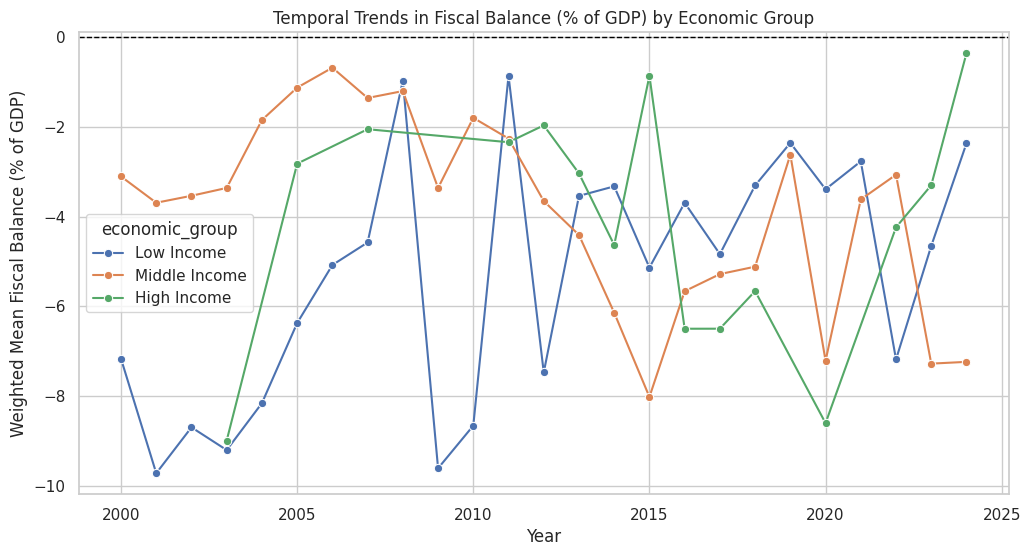

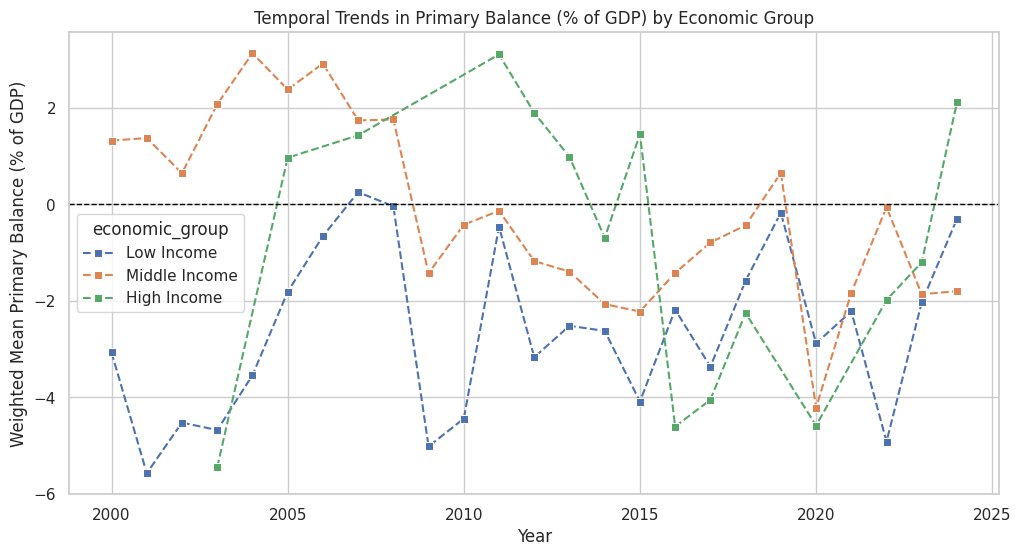

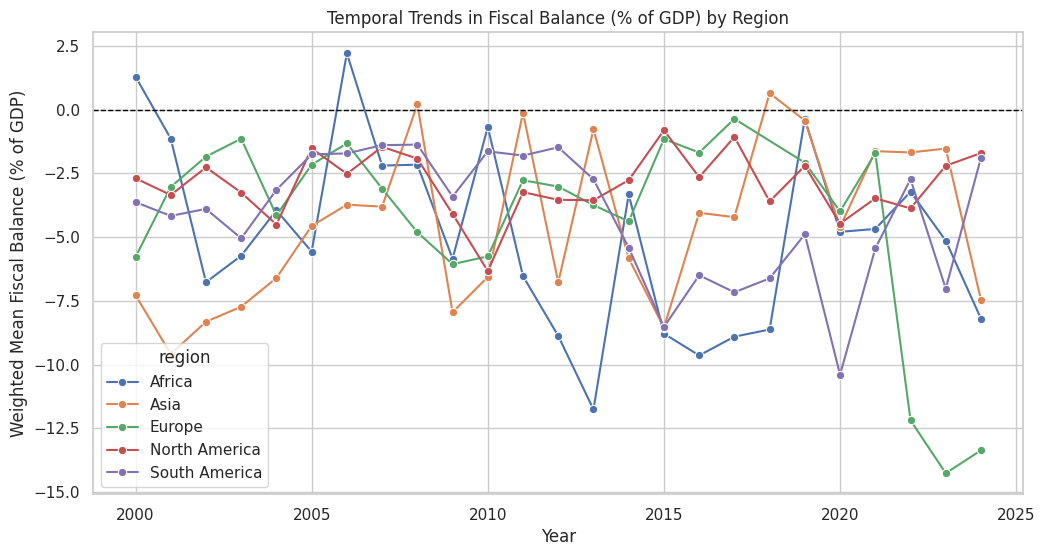

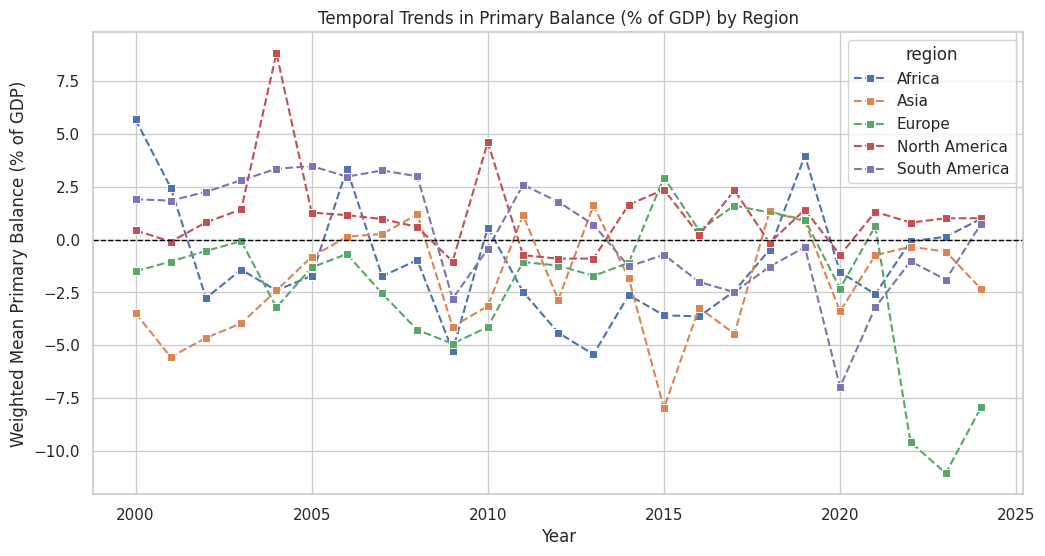

In [21]:
# Weighted mean fiscal and primary balance by economic group
fiscal_trends = data.groupby(['Year', 'economic_group']).apply(
    lambda x: pd.Series({
        'weighted_mean_fiscal_balance': np.average(x['gov_net_lending_borrowing_gdp'], weights=x['gdp_current_ppp']),
        'weighted_mean_primary_balance': np.average(x['gov_primary_net_lending_borrowing_gdp'], weights=x['gdp_current_ppp'])
    })
).reset_index()

# Weighted mean fiscal and primary balance by region
regional_trends = data.groupby(['Year', 'region']).apply(
    lambda x: pd.Series({
        'weighted_mean_fiscal_balance': np.average(x['gov_net_lending_borrowing_gdp'], weights=x['gdp_current_ppp']),
        'weighted_mean_primary_balance': np.average(x['gov_primary_net_lending_borrowing_gdp'], weights=x['gdp_current_ppp'])
    })
).reset_index()

# Plot for fiscal balance trends by economic group
plt.figure(figsize=(12, 6))
sns.lineplot(data=fiscal_trends, x='Year', y='weighted_mean_fiscal_balance', hue='economic_group', marker='o')
plt.title('Temporal Trends in Fiscal Balance (% of GDP) by Economic Group')
plt.ylabel('Weighted Mean Fiscal Balance (% of GDP)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

# Plot for primary balance trends by economic group (different style)
plt.figure(figsize=(12, 6))
sns.lineplot(data=fiscal_trends, x='Year', y='weighted_mean_primary_balance', hue='economic_group', linestyle='--', marker='s')
plt.title('Temporal Trends in Primary Balance (% of GDP) by Economic Group')
plt.ylabel('Weighted Mean Primary Balance (% of GDP)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

# Plot for fiscal balance trends by region
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_trends, x='Year', y='weighted_mean_fiscal_balance', hue='region', marker='o')
plt.title('Temporal Trends in Fiscal Balance (% of GDP) by Region')
plt.ylabel('Weighted Mean Fiscal Balance (% of GDP)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

# Plot for primary balance trends by region (different style)
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_trends, x='Year', y='weighted_mean_primary_balance', hue='region', linestyle='--', marker='s')
plt.title('Temporal Trends in Primary Balance (% of GDP) by Region')
plt.ylabel('Weighted Mean Primary Balance (% of GDP)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()


### Temporal Trends in Fiscal and Primary Balances (% of GDP)

#### Key Observations

1. **Trends by Economic Group**:
   - **Fiscal Balance**:
     - **Low-Income Economies**: Persistent deficits, with significant dips during global financial crises (e.g., 2008–2009) and recovery attempts in the mid-2010s.
     - **Middle-Income Economies**: Moderate deficits, with increased volatility post-2008, reflecting challenges in balancing fiscal policies.
     - **High-Income Economies**: different deficit regimes with occasional surpluses, and stable and deep deficits, indicating stronger fiscal capacity and some susceptibility to external shocks.
   - **Primary Balance**:
     - **Low-Income Economies**: Primary balances show relatively smaller deficits compared to fiscal balances, highlighting the burden of interest payments on debt.
     - - **Middle-Income Economies**: The gap between fiscal and primary balances is wider compared to **High-Income Economies** and becomes more pronounced during periods of higher global interest rates (e.g., post-2008), reflecting the growing cost of debt servicing.

     - **High-Income Economies**: Near-zero primary balances with smaller differences from fiscal balances, demonstrating their ability to manage interest payments effectively.

2. **Trends by Region**:
   - **Fiscal Balance**:
     - **Africa**: Persistent deficits, with large dips around global crises and resource-related shocks (e.g., 2013, 2020).
     - **Asia**: Moderate deficits with occasional improvements, reflecting more stable fiscal policies.
     - **Europe**: Moderate fluctuations with marked deterioration after 2022 due to the Russia -kraine War
     - **North America**: Consistent deficits, but less volatile than other regions
     - **South America**: Persistent deficits which worsened after 2013 with recovery in recent years.
   - **Primary Balance**:
     - **Africa and South America**: The gap between fiscal and primary balances is pronounced, reflecting higher interest payment burdens on debt.
     - **Asia and Europe**: Smaller differences between fiscal and primary balances, indicating more efficient debt servicing.
     - **North America**: Similar patterns to fiscal balance trends, but with smaller deficits in primary balances due to lower interest rates.

3. **Effect of Interest Rates**:
   - The difference between fiscal and primary balances reflects the burden of **interest payments**:
     - **Low-Income Economies** bear a heavier debt servicing burden due to higher interest rates and lower fiscal capacity.
     - **High-Income Economies** manage interest payments more effectively, reflected in smaller gaps between fiscal and primary balances.
   - Periods of high global interest rates (e.g., post-2008) exacerbate the differences, particularly for middle- and low-income economies.



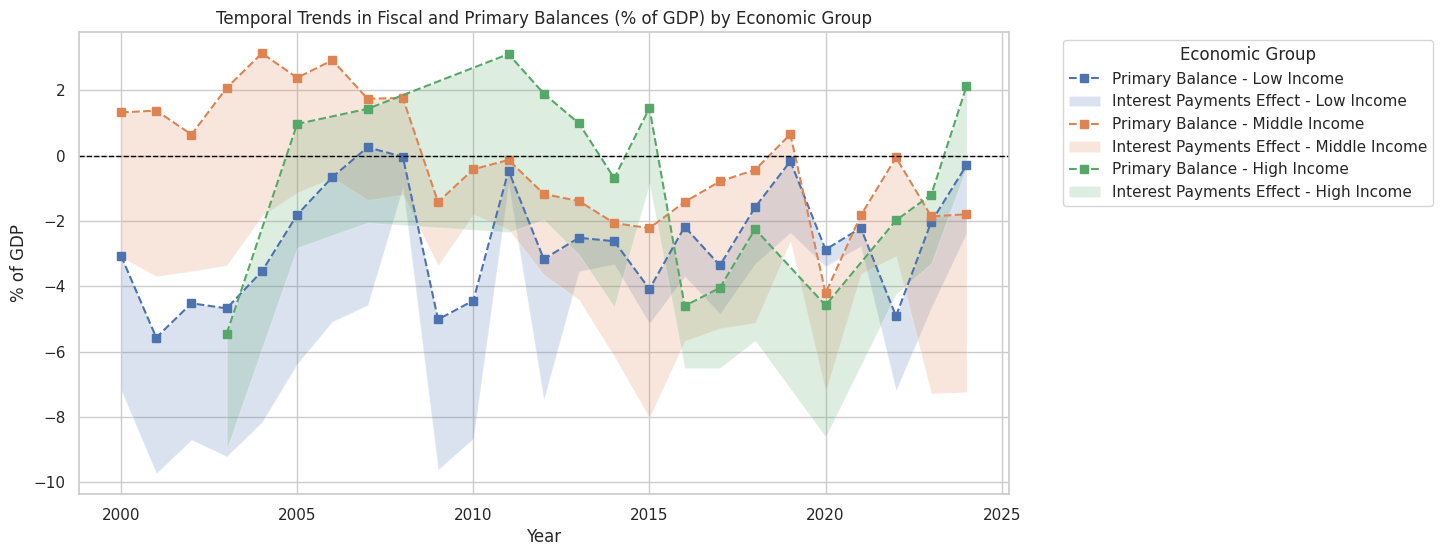

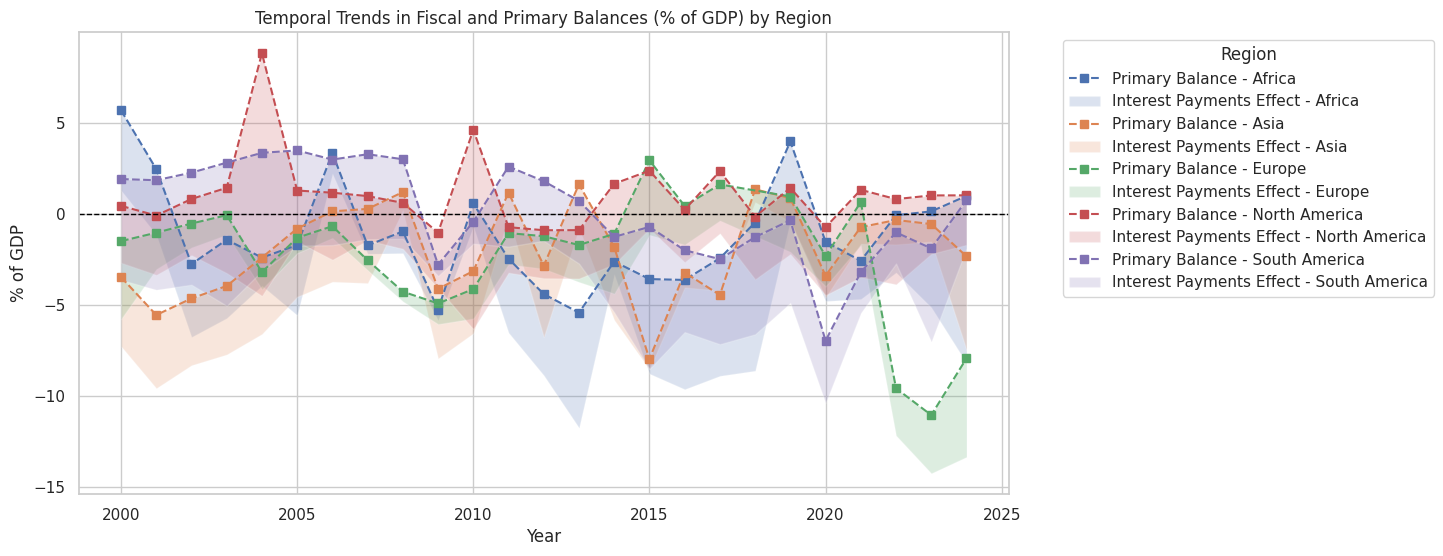

In [22]:
# Combined plot for fiscal and primary balances by economic group with shadow overlay
plt.figure(figsize=(12, 6))
for group in fiscal_trends['economic_group'].unique():
    group_data = fiscal_trends[fiscal_trends['economic_group'] == group]
    plt.plot(group_data['Year'], group_data['weighted_mean_primary_balance'], label=f'Primary Balance - {group}', linestyle='--', marker='s')
    plt.fill_between(group_data['Year'],
                     group_data['weighted_mean_primary_balance'],
                     group_data['weighted_mean_fiscal_balance'],
                     alpha=0.2, label=f'Interest Payments Effect - {group}')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temporal Trends in Fiscal and Primary Balances (% of GDP) by Economic Group')
plt.ylabel('% of GDP')
plt.xlabel('Year')
plt.legend(title='Economic Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Combined plot for fiscal and primary balances by region with shadow overlay
plt.figure(figsize=(12, 6))
for region in regional_trends['region'].unique():
    region_data = regional_trends[regional_trends['region'] == region]
    plt.plot(region_data['Year'], region_data['weighted_mean_primary_balance'], label=f'Primary Balance - {region}', linestyle='--', marker='s')
    plt.fill_between(region_data['Year'],
                     region_data['weighted_mean_primary_balance'],
                     region_data['weighted_mean_fiscal_balance'],
                     alpha=0.2, label=f'Interest Payments Effect - {region}')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temporal Trends in Fiscal and Primary Balances (% of GDP) by Region')
plt.ylabel('% of GDP')
plt.xlabel('Year')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Temporal Trends in Fiscal and Primary Balances (% of GDP)

#### Key Observations

1. **Economic Group Trends**:
   - **Low-Income Economies**:
     - Primary balances consistently show smaller deficits compared to fiscal balances, highlighting the heavy burden of **interest payments** on public debt.
     - The shaded area representing interest payment effects widens  during periods of global economic shocks but is generally narrower than other economic groups signaling a lower commercial share of total debt.
   - **Middle-Income Economies**:
     - Interest payments contribute moderately to fiscal deficits, with the gap between fiscal and primary balances narrowing during certain periods (2008, 2019 to 2020) probably in line with global interest rate spreads showing a larger commercial share of debt compared to low income countries.
    
   - **High-Income Economies**:
     - The gap between fiscal and primary balances varies widely but shows primary surpluses in certain periods (2005 to 2015).
     - Variability in interest rate effect could signal susceptibility to global interest rates due to a larger share of commercial debt.

2. **Regional Trends**:
   - **Africa**:
     - The widening gap between fiscal and primary balances during periods of economic stress highlights the disproportionate impact of **interest payments** on fiscal sustainability in low-income and resource-dependent economies.
   - **Asia**:
     - Asia demonstrates the smallest differences between fiscal and primary balances, showcasing efficient fiscal management and access to lower-cost borrowing.
     - The stability of primary balances reflects robust macroeconomic policies.
   - **Europe**:
     - Similar to Asia, Europe maintains a narrow gap between fiscal and primary balances, with only minor fluctuations during global crises.
     - The region’s fiscal resilience is evident in smaller deficits and consistent debt servicing capabilities.
   - **North America**:
     - The relatively stable difference between fiscal and primary balances reflects the region's ability to manage interest rate changes.
   - **South America**:
     - South America exhibits pronounced volatility in fiscal and primary balances, with the interest payments effect peaking during global financial disruptions signaling a larger share of commercial debt. (e.g., 2008 and 2020).

3. **Effects of Interest Rates**:
    - The shaded areas in the plots, representing the interest payments effect, clearly show:
    - Global interest rate trends amplify existing vulnerabilities, particularly in regions with higher debt levels, less favourable debt composition, and weaker economic institutions (e.g., Africa and South America).


Index(['Country', 'Year', 'current_account_balance_gdp', 'gov_gross_debt_gdp',
       'gov_net_lending_borrowing_gdp',
       'gov_primary_net_lending_borrowing_gdp', 'gov_revenue_gdp',
       'gov_total_expenditure_gdp', 'gdp_ppp_share_world',
       'gdp_constant_prices_pct_change', 'gdp_current_ppp', 'gdp_current_usd',
       'gdp_deflator', 'gross_national_savings_gdp',
       'implied_ppp_conversion_rate', 'inflation_avg_cpi',
       'inflation_avg_cpi_pct_change', 'inflation_end_cpi',
       'inflation_end_cpi_pct_change', 'population_millions',
       'total_investment_gdp', 'imports_goods_pct_change',
       'exports_goods_pct_change', 'exports_goods_services_pct_change',
       'imports_goods_services_pct_change', 'region', 'gdp_per_capita_usd',
       'economic_group', 'Adjusted_savings:_energy_depletion_(%_of_GNI)',
       'Age_dependency_ratio_(%_of_working-age_population)',
       'Current_health_expenditure_(%_of_GDP)',
       'Industry_(including_construction),_value_add

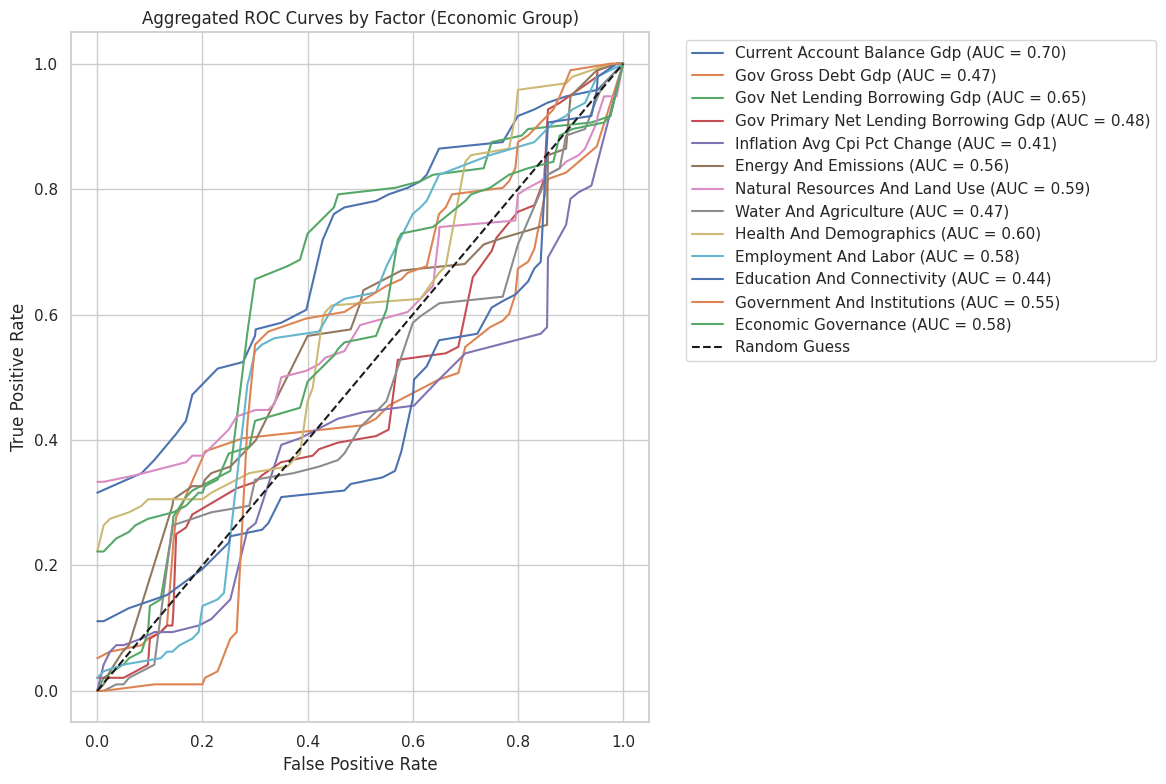

In [28]:
# Define high-risk credit rating threshold
def categorize_risk(row, threshold="BB"):
    """
    Categorize sovereign risk into high and low based on credit ratings.
    Assumes ratings are ordered (AAA > AA > BB > B > CCC).
    """
    high_risk_ratings = ["CCC", "CC", "SD", "D", "B", "BB-"]
    return 1 if row in high_risk_ratings else 0

# Add a binary risk column based on credit ratings
data['high_risk'] = data['Foreign LT'].apply(categorize_risk)

# Define the factors to analyze
factors_to_analyze = [
    'current_account_balance_gdp',
    'gov_gross_debt_gdp',
    'gov_net_lending_borrowing_gdp',
    'gov_primary_net_lending_borrowing_gdp',
    'inflation_avg_cpi_pct_change',
    'Energy and Emissions',
    'Natural Resources and Land Use',
    'Water and Agriculture',
    'Health and Demographics',
    'Employment and Labor',
    'Education and Connectivity',
    'Government and Institutions',
    'Economic Governance'
]

# Function to calculate rolling volatility for a factor
def calculate_volatility(df, group_col, feature_col, rolling_window=3):
    """
    Calculate rolling standard deviation (volatility) for a specific feature grouped by a column.
    """
    df = df.sort_values(by=[group_col, 'Year'])
    volatility_col = f"{feature_col}_volatility"
    df[volatility_col] = (
        df.groupby(group_col)[feature_col]
        .rolling(window=rolling_window, min_periods=1)
        .std()
        .reset_index(drop=True)
    )
    return df

# Calculate volatility for all factors
for factor in factors_to_analyze:
    data = calculate_volatility(data, group_col='economic_group', feature_col=factor)
    data = calculate_volatility(data, group_col='region', feature_col=factor)

import numpy as np

# Function to aggregate ROC curves by factor
def aggregate_roc_by_factor(data, factors_to_analyze, group_col, random_state=42):
    aggregated_roc = {}

    for factor in factors_to_analyze:
        # Use volatility column
        volatility_col = f"{factor}_volatility"
        roc_points = []

        # Loop through unique groups
        for group in data[group_col].unique():
            subset = data[data[group_col] == group][['Year', volatility_col, 'high_risk']].dropna()

            if not subset.empty:
                X = subset[[volatility_col]]
                y = subset['high_risk']
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

                # Train logistic regression model
                log_reg = LogisticRegression(class_weight='balanced', random_state=random_state)
                log_reg.fit(X_train, y_train)
                y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

                # Compute ROC curve
                fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
                roc_points.append((fpr, tpr))

        # Aggregate FPR/TPR across groups
        if roc_points:
            all_fpr = np.unique(np.concatenate([fpr for fpr, tpr in roc_points]))
            mean_tpr = np.zeros_like(all_fpr)
            for fpr, tpr in roc_points:
                mean_tpr += np.interp(all_fpr, fpr, tpr)
            mean_tpr /= len(roc_points)
            auc_score = np.trapz(mean_tpr, all_fpr)  # Approximate AUC
            aggregated_roc[factor] = (all_fpr, mean_tpr, auc_score)

    return aggregated_roc

# Aggregate ROC by factor for `economic_group`
roc_results = aggregate_roc_by_factor(data, factors_to_analyze, group_col='economic_group')

# Plot aggregated ROC curves
plt.figure(figsize=(12, 8))
for factor, (fpr, tpr, auc) in roc_results.items():
    plt.plot(fpr, tpr, label=f'{factor.replace("_", " ").title()} (AUC = {auc:.2f})')

# Add random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Aggregated ROC Curves by Factor (Economic Group)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


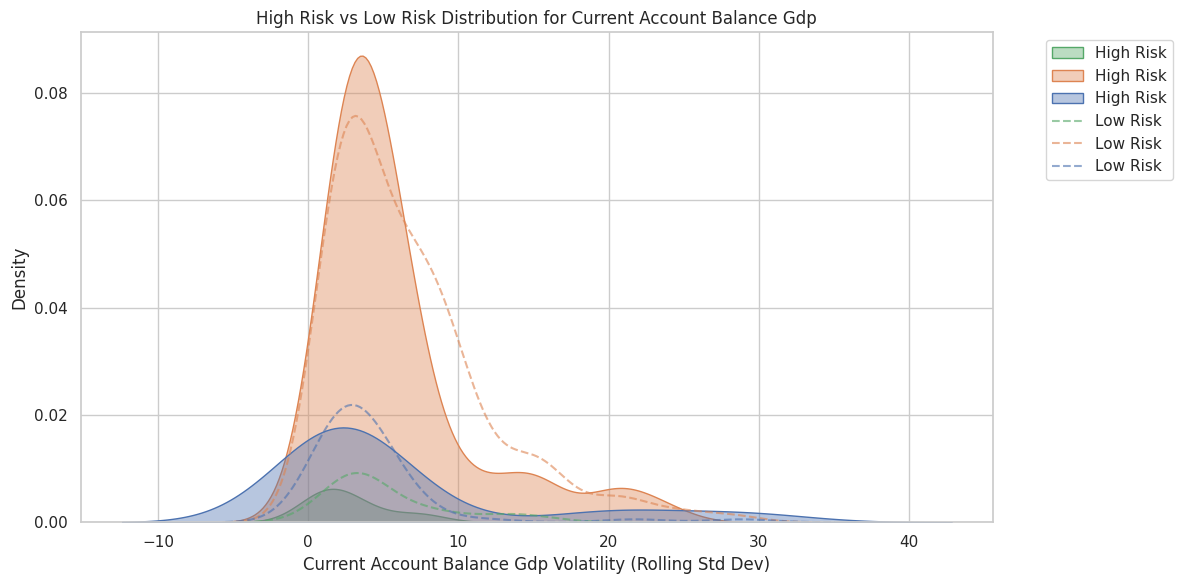

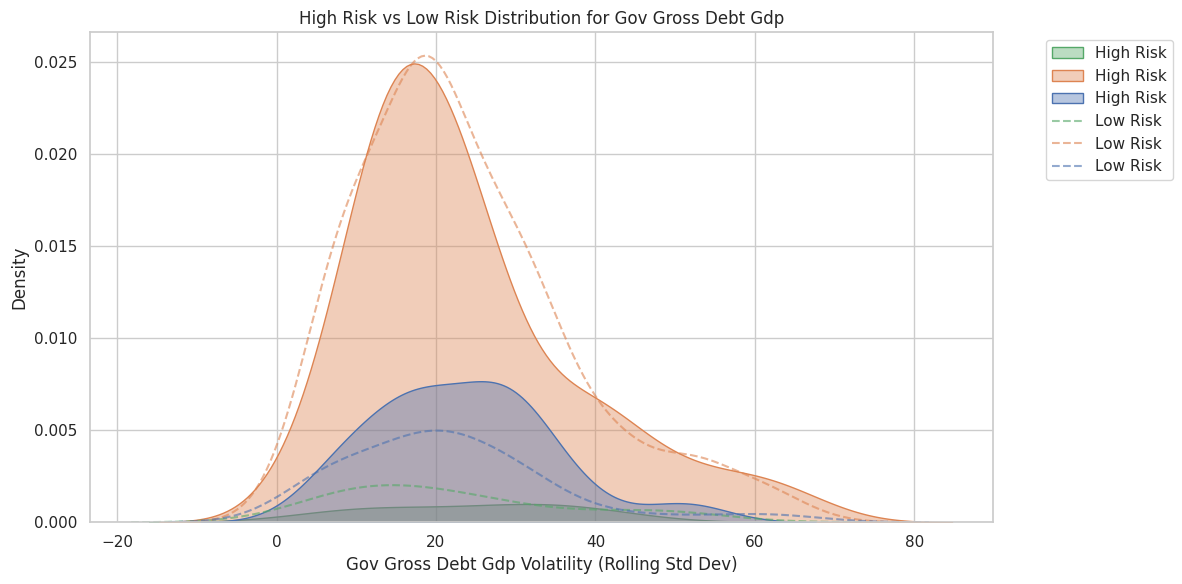

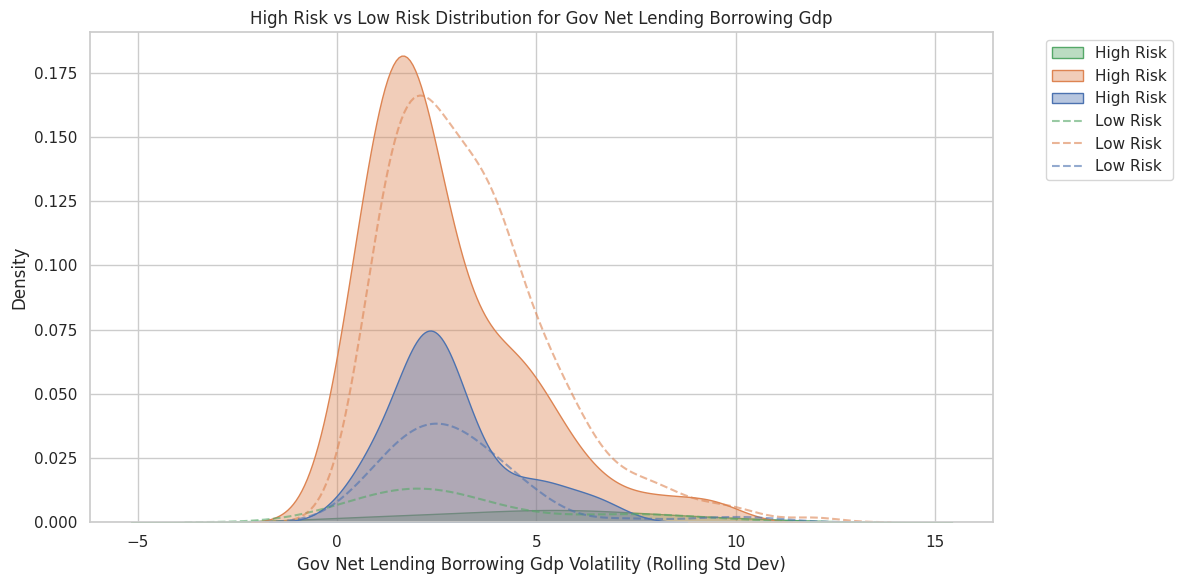

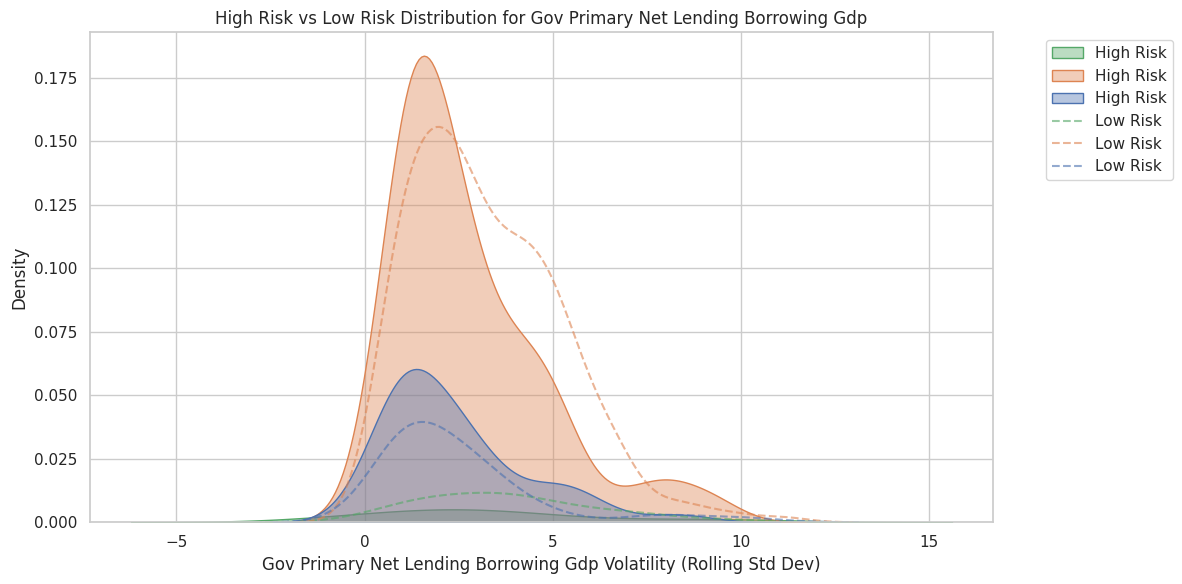

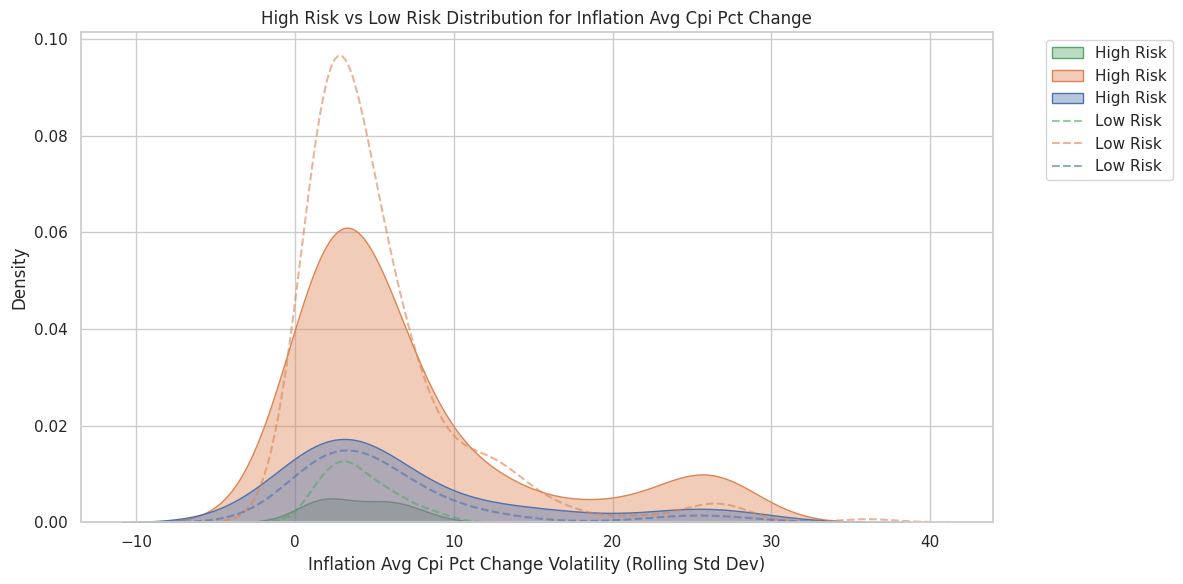

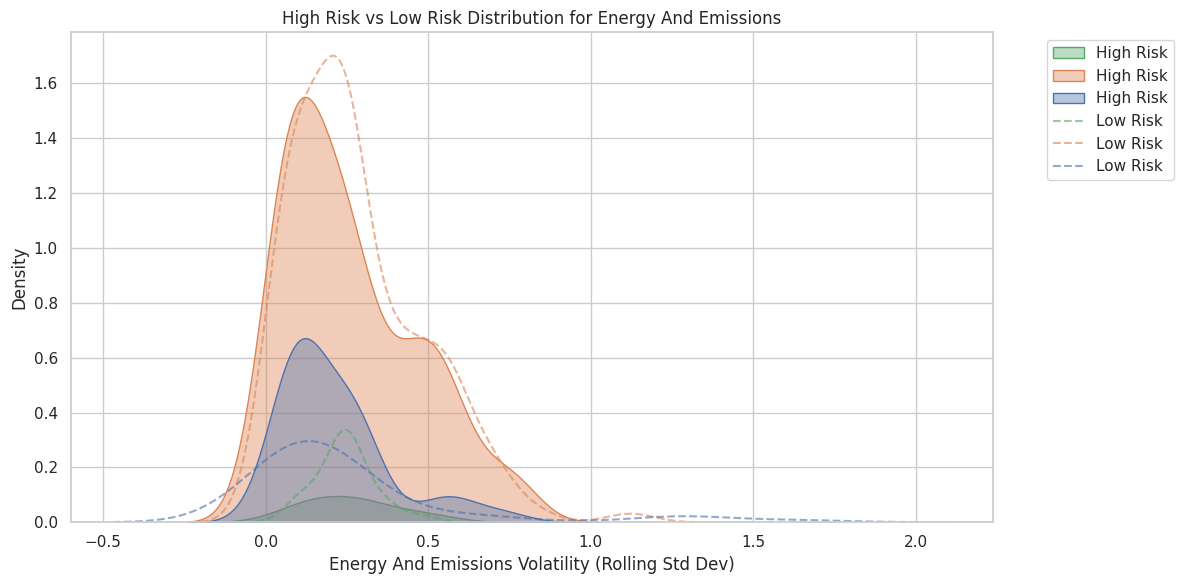

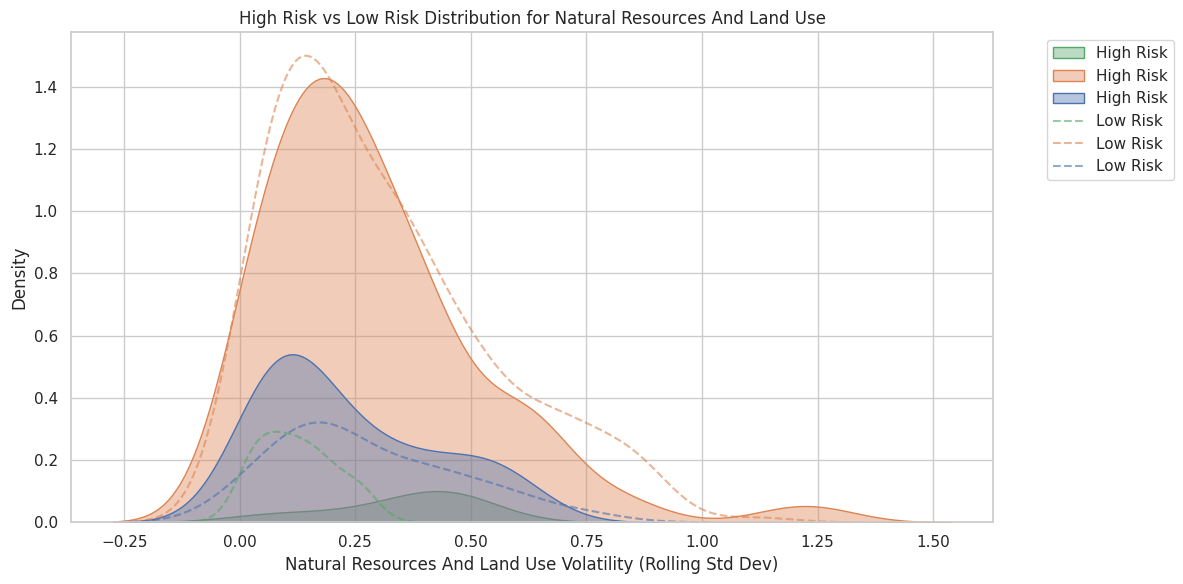

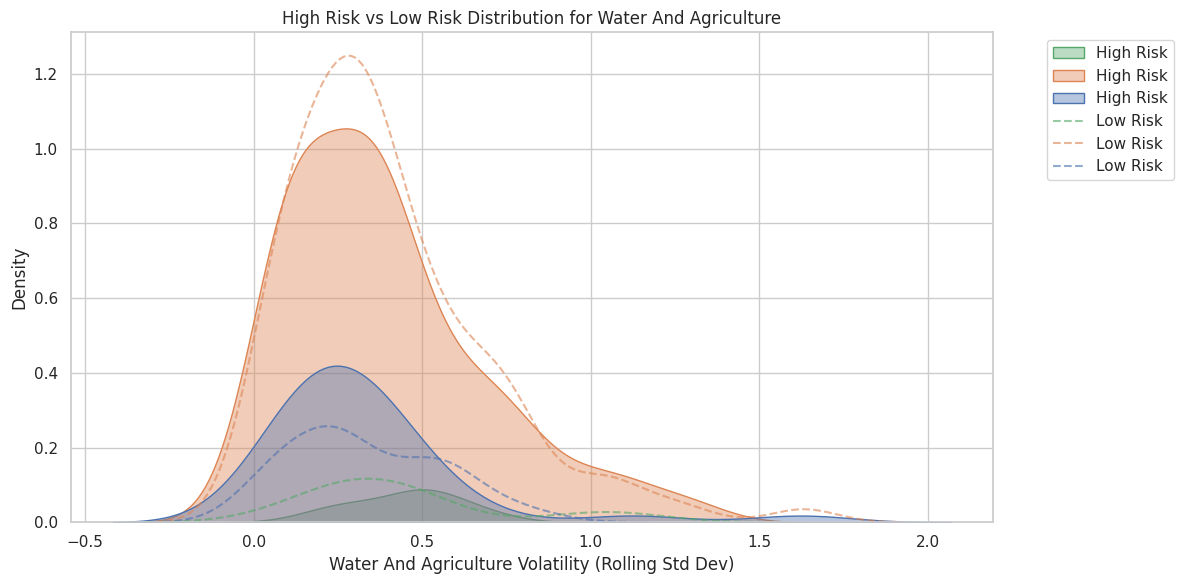

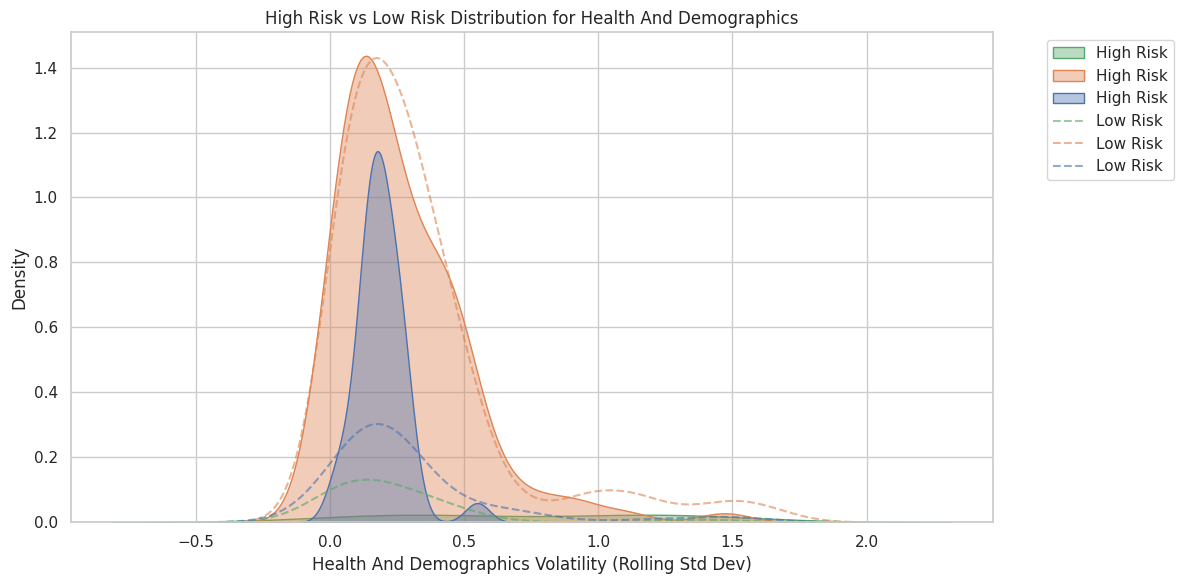

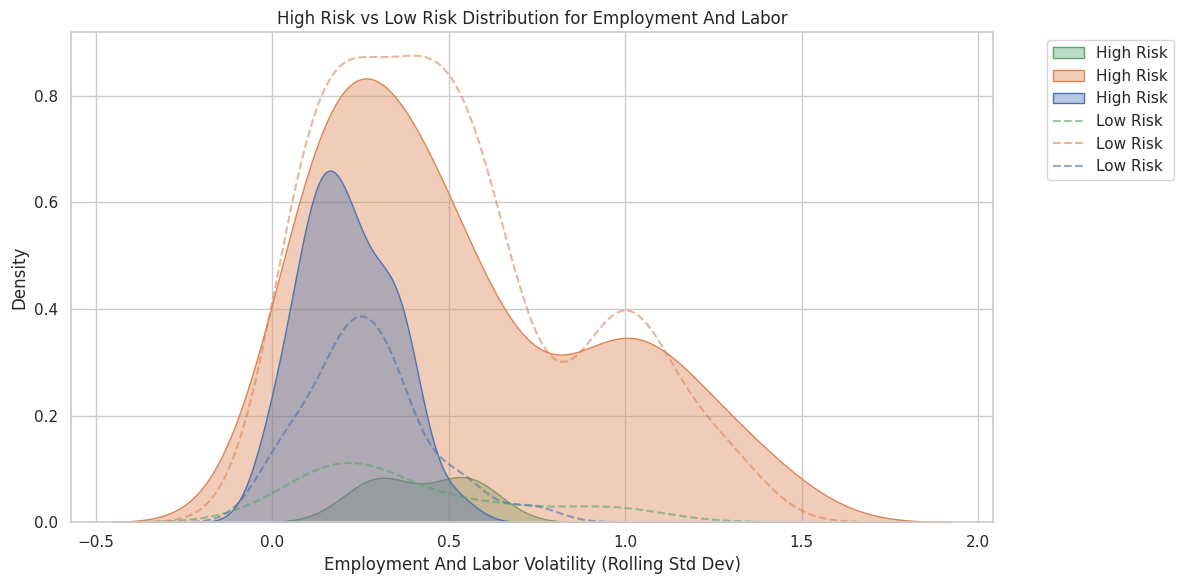

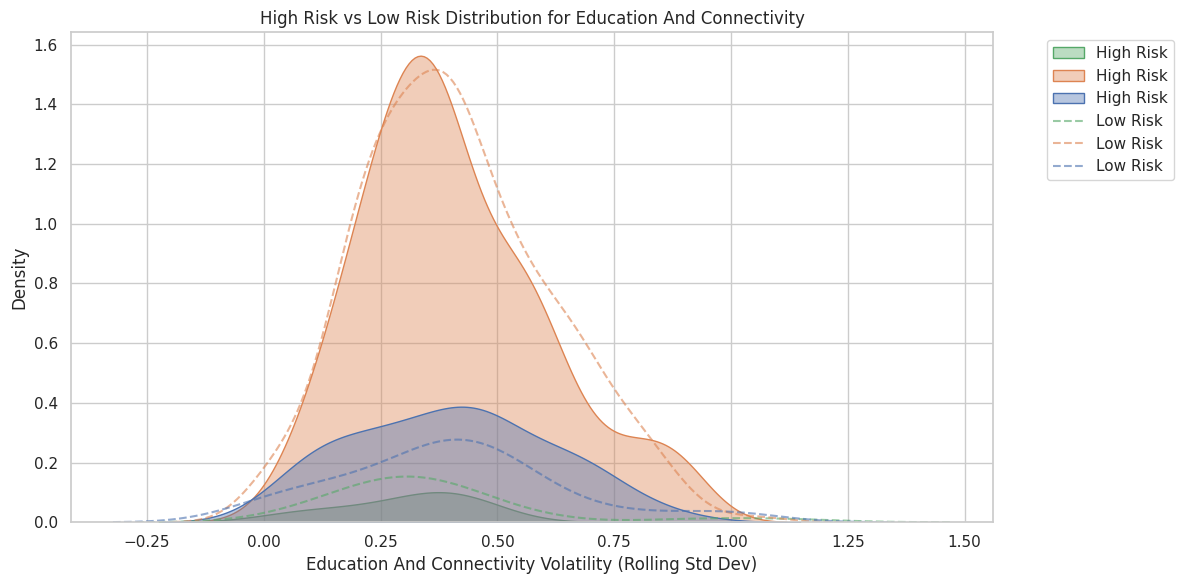

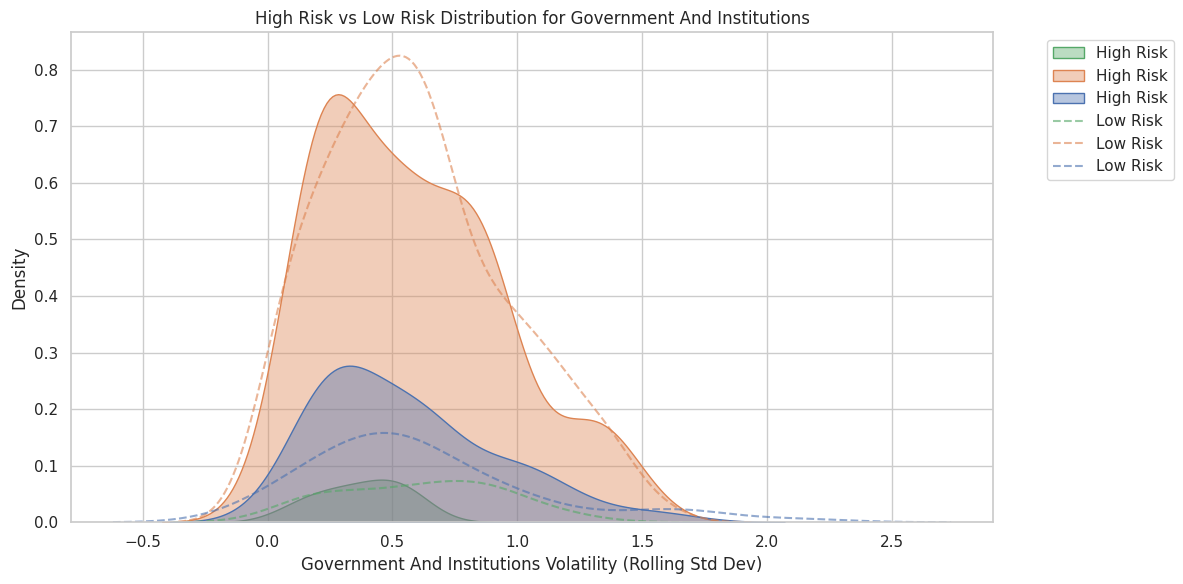

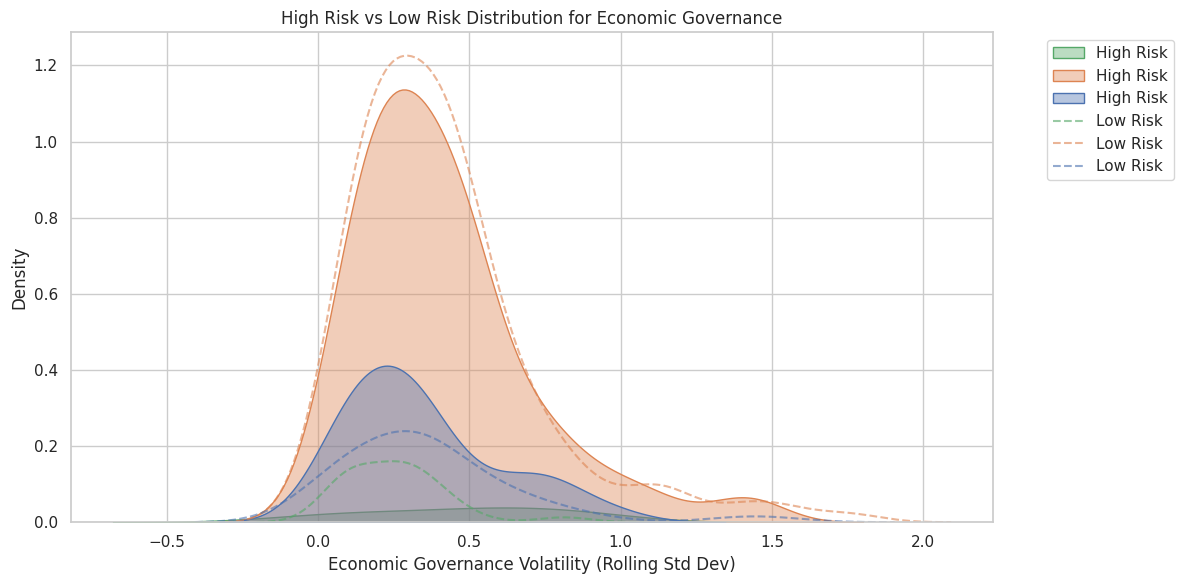

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot high-risk vs. low-risk distribution for each factor
def plot_risk_distributions(data, factors_to_analyze, group_col='economic_group'):
    """
    Plot high-risk vs. low-risk distributions for each factor's volatility.
    """
    for factor in factors_to_analyze:
        volatility_col = f"{factor}_volatility"

        # Check if the volatility column exists
        if volatility_col not in data.columns:
            print(f"Volatility column for {factor} not found, skipping.")
            continue

        plt.figure(figsize=(12, 6))

        # Distribution plot
        sns.kdeplot(
            data=data[data['high_risk'] == 1], x=volatility_col, hue=group_col, fill=True, alpha=0.4,
            label='High Risk'
        )
        sns.kdeplot(
            data=data[data['high_risk'] == 0], x=volatility_col, hue=group_col, linestyle="--", alpha=0.6,
            label='Low Risk'
        )

        plt.title(f"High Risk vs Low Risk Distribution for {factor.replace('_', ' ').title()}")
        plt.xlabel(f"{factor.replace('_', ' ').title()} Volatility (Rolling Std Dev)")
        plt.ylabel("Density")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


# Call the function to generate plots for the selected factors
plot_risk_distributions(data, factors_to_analyze)

